# Telecom Churn using PCA and comparing between models using GLM, Logistic Regression, Tree Model and Random Forest

This project was done as part of the Master's in Data Science course from Liverpool John Moores University.

**Problem Statement** In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

In [1]:
#importing requisite libraries 

import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Warnings suppressed
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Loading the data

data = pd.read_csv("C:\\Users\\hp\\Downloads\\telecom_churn_data.csv")

In [3]:
#Setting option to view max number of columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 230)

data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
#describe on all even the categorical columns

data.describe(include = 'all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

In [5]:
#info to check dtypes of columns

data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
#columns in the dataframe

col = list(data.columns)

In [7]:
col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [8]:
#checking nulls, unique values and value counts in the dataframe

for i in col:
    print("Name of the column:\n", i)
    print("Values in the column\n", data[i].value_counts(dropna = False))
    print('Unique Rows in the column:', data[i].nunique())
    print("NaN value count in the column", data[i].isnull().sum())
    print('&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&')

Name of the column:
 mobile_number
Values in the column
 7000817664    1
7000976629    1
7002050035    1
7001523698    1
7001005553    1
             ..
7000235587    1
7000332934    1
7001906012    1
7000024403    1
7000549537    1
Name: mobile_number, Length: 99999, dtype: int64
Unique Rows in the column: 99999
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 circle_id
Values in the column
 109    99999
Name: circle_id, dtype: int64
Unique Rows in the column: 1
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 loc_og_t2o_mou
Values in the column
 0.0    98981
NaN     1018
Name: loc_og_t2o_mou, dtype: int64
Unique Rows in the column: 1
NaN value count in the column 1018
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 std_og_t2o_mou
Values in the column
 0.0    98981
NaN     1018
Name: std_og_

NaN value count in the column 5378
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 roam_ic_mou_9
Values in the column
 0.00      79116
NaN        7745
1.01         60
0.03         34
1.03         33
          ...  
18.09         1
157.43        1
201.06        1
15.49         1
62.28         1
Name: roam_ic_mou_9, Length: 4828, dtype: int64
Unique Rows in the column: 4827
NaN value count in the column 7745
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 roam_og_mou_6
Values in the column
 0.00      76664
NaN        3937
0.21         73
1.01         42
0.33         37
          ...  
185.94        1
10.78         1
21.20         1
467.84        1
225.64        1
Name: roam_og_mou_6, Length: 8039, dtype: int64
Unique Rows in the column: 8038
NaN value count in the column 3937
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 roam_og_mou_7
Values in the colu

Values in the column
 0.00      52535
NaN        3859
0.33         63
0.36         63
0.31         62
          ...  
151.36        1
634.43        1
852.78        1
387.19        1
339.26        1
Name: std_og_t2t_mou_7, Length: 18568, dtype: int64
Unique Rows in the column: 18567
NaN value count in the column 3859
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 std_og_t2t_mou_8
Values in the column
 0.00       52113
NaN         5378
0.31          74
0.50          64
0.56          61
           ...  
1911.14        1
22.40          1
196.99         1
166.21         1
919.98         1
Name: std_og_t2t_mou_8, Length: 18292, dtype: int64
Unique Rows in the column: 18291
NaN value count in the column 5378
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 std_og_t2t_mou_9
Values in the column
 0.00      51977
NaN        7745
0.51         62
0.48         60
0.58         58
          ...  
108.61        1

Name: og_others_7, dtype: int64
Unique Rows in the column: 187
NaN value count in the column 3859
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 og_others_8
Values in the column
 0.00      94210
NaN        5378
0.16         23
0.01         13
0.03         11
0.11          9
0.05          7
0.30          7
0.15          6
2.26          6
1.03          5
0.48          5
0.66          5
0.23          5
0.40          5
0.10          5
0.06          5
0.85          5
0.21          5
0.88          4
1.68          4
0.13          4
0.93          4
0.26          4
0.35          4
0.63          4
0.33          4
0.71          4
0.38          4
0.55          3
0.18          3
0.51          3
1.00          3
1.31          3
0.78          3
2.56          3
0.81          3
1.33          3
0.08          3
0.43          3
0.70          3
0.83          3
0.65          2
0.25          2
1.28          2
1.26          2
1.59          2
3.99          2
0.60   

Unique Rows in the column: 21918
NaN value count in the column 3859
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 loc_ic_t2m_mou_8
Values in the column
 0.00      5459
NaN       5378
0.46        38
0.41        37
0.98        35
          ... 
998.83       1
845.69       1
395.89       1
183.46       1
339.26       1
Name: loc_ic_t2m_mou_8, Length: 21887, dtype: int64
Unique Rows in the column: 21886
NaN value count in the column 5378
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 loc_ic_t2m_mou_9
Values in the column
 NaN       7745
0.00      5339
0.38        40
0.56        37
0.36        37
          ... 
119.78       1
431.64       1
207.28       1
150.16       1
299.08       1
Name: loc_ic_t2m_mou_9, Length: 21485, dtype: int64
Unique Rows in the column: 21484
NaN value count in the column 7745
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 loc_i

Name: std_ic_mou_9, Length: 11267, dtype: int64
Unique Rows in the column: 11266
NaN value count in the column 7745
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 total_ic_mou_6
Values in the column
 0.00       8433
0.18         36
0.28         26
0.20         25
0.23         24
           ... 
473.78        1
1281.29       1
480.94        1
2887.66       1
339.26        1
Name: total_ic_mou_6, Length: 32247, dtype: int64
Unique Rows in the column: 32247
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 total_ic_mou_7
Values in the column
 0.00      7962
0.20        37
0.33        24
0.26        21
0.38        21
          ... 
751.71       1
452.89       1
365.29       1
540.19       1
339.26       1
Name: total_ic_mou_7, Length: 32242, dtype: int64
Unique Rows in the column: 32242
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 ic_others_7
Values in the column
 0.00     76848
NaN       3859
0.05       418
0.06       413
0.10       406
         ...  
60.81        1
23.98        1
12.91        1
12.66        1
38.55        1
Name: ic_others_7, Length: 2003, dtype: int64
Unique Rows in the column: 2002
NaN value count in the column 3859
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 ic_others_8
Values in the column
 0.00     72892
NaN       5378
0.10       831
0.06       771
0.08       676
         ...  
24.85        1
42.68        1
64.03        1
17.09        1
47.19        1
Name: ic_others_8, Length: 1897, dtype: int64
Unique Rows in the column: 1896
NaN value count in the column 5378
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 ic_others_9
Values in the column
 0.00     72018
NaN       7745
0.06       566
0.10       518
0.0

NaN value count in the column 1607
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 date_of_last_rech_7
Values in the column
 7/31/2014     17288
7/30/2014     13863
7/25/2014      9401
7/29/2014      9052
7/28/2014      7502
7/27/2014      5909
7/26/2014      5382
7/24/2014      3998
7/19/2014      3057
7/22/2014      2969
7/20/2014      2892
7/17/2014      2737
7/16/2014      2458
7/23/2014      2302
NaN            1767
7/21/2014      1640
7/15/2014      1562
7/18/2014      1280
07-10-2014      859
07-09-2014      827
07-12-2014      732
7/14/2014       452
07-11-2014      408
7/13/2014       324
07-06-2014      313
07-04-2014      251
07-08-2014      201
07-03-2014      153
07-07-2014      153
07-05-2014      125
07-01-2014       74
07-02-2014       68
Name: date_of_last_rech_7, dtype: int64
Unique Rows in the column: 31
NaN value count in the column 1767
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the c

NaN value count in the column 74846
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 date_of_last_rech_data_7
Values in the column
 NaN           74428
7/31/2014      1813
7/29/2014      1719
7/30/2014      1665
7/28/2014      1581
7/26/2014      1239
7/27/2014      1214
7/25/2014       996
7/24/2014       882
7/23/2014       841
7/22/2014       830
7/21/2014       813
7/14/2014       769
7/19/2014       761
7/18/2014       746
7/17/2014       703
7/20/2014       692
7/16/2014       691
07-07-2014      661
07-12-2014      655
7/13/2014       644
07-09-2014      640
07-10-2014      627
7/15/2014       606
07-08-2014      584
07-11-2014      569
07-05-2014      552
07-04-2014      504
07-06-2014      498
07-03-2014      397
07-01-2014      344
07-02-2014      335
Name: date_of_last_rech_data_7, dtype: int64
Unique Rows in the column: 31
NaN value count in the column 74428
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
N

Unique Rows in the column: 31
NaN value count in the column 74846
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 count_rech_2g_7
Values in the column
 NaN     74428
1.0     10495
0.0      5798
2.0      3377
3.0      1489
4.0      1121
5.0       848
6.0       622
7.0       437
8.0       369
10.0      248
9.0       214
11.0      159
12.0      133
13.0       56
14.0       54
15.0       32
16.0       29
18.0       19
17.0       13
19.0       13
20.0       11
23.0        6
22.0        5
21.0        5
27.0        3
26.0        3
32.0        2
24.0        2
31.0        1
35.0        1
30.0        1
43.0        1
29.0        1
48.0        1
28.0        1
25.0        1
Name: count_rech_2g_7, dtype: int64
Unique Rows in the column: 36
NaN value count in the column 74428
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 count_rech_2g_8
Values in the column
 NaN     73660
1.0     10894
0.0      6046
2.0      3

Name: vol_3g_mb_7, Length: 14519, dtype: int64
Unique Rows in the column: 14519
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 vol_3g_mb_8
Values in the column
 0.00       84100
0.01          22
0.03          14
0.04          13
0.13          10
           ...  
411.55         1
272.68         1
2089.21        1
1744.25        1
738.50         1
Name: vol_3g_mb_8, Length: 14960, dtype: int64
Unique Rows in the column: 14960
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 vol_3g_mb_9
Values in the column
 0.00       84638
0.01          18
0.04          17
0.02          16
0.03          14
           ...  
1551.33        1
419.77         1
1242.28        1
1355.65        1
382.90         1
Name: vol_3g_mb_9, Length: 14472, dtype: int64
Unique Rows in the column: 14472
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

In [9]:
#checking missiing i.e. nulls in the columns %age wise sorted

round(100*data.isnull().sum()/len(data), 2).sort_values(ascending = False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [10]:
#checking if there are any duplicate entries

data['mobile_number'].drop_duplicates(keep=False,inplace=True)

In [11]:
#no duplicates present

data.shape

(99999, 226)

In [12]:
#dropping circle id as there is only one value in it.

data.drop(['circle_id'], axis = 1, inplace = True)

In [13]:
#chekcing if above operation is done correctly

data.shape

(99999, 225)

In [14]:
#checkinh top 5 columns in the dataframe

data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753             0.0             0.0             0.0   
1     7001865778             0.0             0.0             0.0   
2     7001625959             0.0             0.0             0.0   
3     7001204172             0.0             0.0             0.0   
4     7000142493             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00   

In [15]:
#deriving column for average revenue or month 6 which is total of data and call and value based services.

data['Average_revenue_6'] = data['arpu_6'].fillna(0)+data['arpu_3g_6'].fillna(0)+data['arpu_2g_6'].fillna(0)+data['jun_vbc_3g'].fillna(0)

In [16]:
#checking if the new column is created

data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753             0.0             0.0             0.0   
1     7001865778             0.0             0.0             0.0   
2     7001625959             0.0             0.0             0.0   
3     7001204172             0.0             0.0             0.0   
4     7000142493             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00   

In [17]:
#similarly deriving a column for average revenue in month 7

data['Average_revenue_7'] = data['arpu_7'].fillna(0)+data['arpu_3g_7'].fillna(0)+data['arpu_2g_7'].fillna(0)+data['jul_vbc_3g'].fillna(0)

In [18]:
#checking if the column is created correctly

data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753             0.0             0.0             0.0   
1     7001865778             0.0             0.0             0.0   
2     7001625959             0.0             0.0             0.0   
3     7001204172             0.0             0.0             0.0   
4     7000142493             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00   

In [19]:
#average revenue month 6+7

data['Average_revenue_6_7'] = (data['Average_revenue_6']+data['Average_revenue_7'])/2

In [20]:
#checking if the avrage revenue column for 6th and 7th month got created correctly

data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753             0.0             0.0             0.0   
1     7001865778             0.0             0.0             0.0   
2     7001625959             0.0             0.0             0.0   
3     7001204172             0.0             0.0             0.0   
4     7000142493             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00   

In [21]:
#top 70% customers based on the revenue they contribute based upon 'Good Phase'.

df_70 = data[data.Average_revenue_6_7 >= data.Average_revenue_6_7.quantile(.70)]
df_70.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753             0.0             0.0             0.0   
7      7000701601             0.0             0.0             0.0   
8      7001524846             0.0             0.0             0.0   
19     7001754084             0.0             0.0             0.0   
21     7002124215             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
19            6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
19            9/30/2014   163.430   241.218   326.920   75.229         4.04   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
19         7.38        13.61        22.19          0.51         41.28   
21       132.11        85.14       161.63        757.93        896.68   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
19          9.46          3.11           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
19            0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
19              4.04              6.89             13.61             22.19   
21              4.48              6.16             23.34             29.98   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
19              0.51              1.49              9.46              3.11   
21             91.81             87.93            104.81            107.54   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00               0.0   
19              0.00              0.00          

In [22]:
#as we're to analyse top30% customers based on revenue in good pahse we subset the data. 
#We're left with 30k rows and all columns

df_70.shape

(30000, 228)

In [23]:
#top30% dataframe column list to be used for study of unique values nulls and value counts in the next step.

col_70 = list(df_70.columns)

In [24]:
#looping through the columns for value counts in each columns, unique values in each columns and nulls in each column. 


for i in col_70:
    print("Name of the column:\n", i)
    print("Values in the column\n", df_70[i].value_counts(dropna = False))
    print('Unique Rows in the column:', df_70[i].nunique())
    print("NaN value count in the column", df_70[i].isnull().sum())
    print('&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&')

Name of the column:
 mobile_number
Values in the column
 7000883200    1
7001666443    1
7000798115    1
7000335265    1
7000009632    1
             ..
7002138286    1
7001673387    1
7000426154    1
7001611945    1
7001278463    1
Name: mobile_number, Length: 30000, dtype: int64
Unique Rows in the column: 30000
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 loc_og_t2o_mou
Values in the column
 0.0    29698
NaN      302
Name: loc_og_t2o_mou, dtype: int64
Unique Rows in the column: 1
NaN value count in the column 302
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 std_og_t2o_mou
Values in the column
 0.0    29698
NaN      302
Name: std_og_t2o_mou, dtype: int64
Unique Rows in the column: 1
NaN value count in the column 302
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 loc_ic_t2o_mou
Values in the column
 0.0    29698
Na

Name: loc_og_t2m_mou_6, Length: 15901, dtype: int64
Unique Rows in the column: 15900
NaN value count in the column 625
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 loc_og_t2m_mou_7
Values in the column
 0.00      1852
NaN        665
0.98        17
0.71        12
0.40        11
          ... 
479.13       1
673.83       1
170.29       1
374.28       1
211.76       1
Name: loc_og_t2m_mou_7, Length: 15852, dtype: int64
Unique Rows in the column: 15851
NaN value count in the column 665
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 loc_og_t2m_mou_8
Values in the column
 0.00      2481
NaN       1304
0.68        15
0.73        14
0.71        14
          ... 
560.24       1
195.21       1
635.38       1
378.84       1
16.74        1
Name: loc_og_t2m_mou_8, Length: 15292, dtype: int64
Unique Rows in the column: 15291
NaN value count in the column 1304
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

Name: spl_og_mou_7, Length: 3318, dtype: int64
Unique Rows in the column: 3317
NaN value count in the column 665
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 spl_og_mou_8
Values in the column
 0.00     12823
NaN       1304
0.01        86
0.08        78
0.03        66
         ...  
53.41        1
37.61        1
28.74        1
90.76        1
10.05        1
Name: spl_og_mou_8, Length: 3200, dtype: int64
Unique Rows in the column: 3199
NaN value count in the column 1304
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 spl_og_mou_9
Values in the column
 0.00     13225
NaN       2036
0.01        93
0.21        64
0.06        63
         ...  
48.58        1
71.78        1
77.76        1
16.86        1
28.98        1
Name: spl_og_mou_9, Length: 2949, dtype: int64
Unique Rows in the column: 2948
NaN value count in the column 2036
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
N

NaN value count in the column 625
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 loc_ic_t2f_mou_7
Values in the column
 0.00      8827
NaN        665
0.50        83
0.31        72
0.38        72
          ... 
100.43       1
70.54        1
156.34       1
89.58        1
56.29        1
Name: loc_ic_t2f_mou_7, Length: 4993, dtype: int64
Unique Rows in the column: 4992
NaN value count in the column 665
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 loc_ic_t2f_mou_8
Values in the column
 0.00      8793
NaN       1304
0.45        86
0.33        78
0.41        75
          ... 
75.91        1
328.44       1
55.49        1
44.86        1
95.51        1
Name: loc_ic_t2f_mou_8, Length: 4799, dtype: int64
Unique Rows in the column: 4798
NaN value count in the column 1304
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 loc_ic_t2f_mou_9
Values in the column
 0.00 

Unique Rows in the column: 94
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 total_rech_amt_6
Values in the column
 0       864
252     407
550     216
154     216
500     172
       ... 
1624      1
1672      1
1720      1
1784      1
2031      1
Name: total_rech_amt_6, Length: 2290, dtype: int64
Unique Rows in the column: 2290
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 total_rech_amt_7
Values in the column
 0       1028
252      393
154      239
500      206
550      204
        ... 
2172       1
3795       1
4408       1
2204       1
1335       1
Name: total_rech_amt_7, Length: 2310, dtype: int64
Unique Rows in the column: 2310
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 total_rech_amt_8
Values in the column
 0       2381
252      348
130      24

Values in the column
 NaN           14599
7/31/2014      1106
7/29/2014      1018
7/30/2014      1011
7/28/2014       940
7/26/2014       757
7/27/2014       677
7/25/2014       612
7/24/2014       560
7/23/2014       522
7/22/2014       513
7/21/2014       513
7/18/2014       482
7/14/2014       480
7/19/2014       473
7/17/2014       445
7/16/2014       438
7/20/2014       438
07-07-2014      408
07-09-2014      387
07-12-2014      386
07-10-2014      380
7/13/2014       371
7/15/2014       371
07-08-2014      341
07-11-2014      335
07-05-2014      307
07-04-2014      280
07-06-2014      275
07-03-2014      240
07-02-2014      181
07-01-2014      154
Name: date_of_last_rech_data_7, dtype: int64
Unique Rows in the column: 31
NaN value count in the column 14599
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 date_of_last_rech_data_8
Values in the column
 NaN           15136
8/31/2014      1092
8/30/2014      1033
8/29/2014       872
8/27/20

Values in the column
 NaN       14760
154.0      2215
252.0      1785
198.0       737
145.0       634
          ...  
2779.0        1
94.0          1
7546.0        1
408.0         1
706.0         1
Name: av_rech_amt_data_6, Length: 850, dtype: int64
Unique Rows in the column: 849
NaN value count in the column 14760
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 av_rech_amt_data_7
Values in the column
 NaN       14599
154.0      2195
252.0      1753
198.0       786
145.0       521
          ...  
1108.0        1
992.0         1
630.0         1
1254.0        1
706.0         1
Name: av_rech_amt_data_7, Length: 917, dtype: int64
Unique Rows in the column: 916
NaN value count in the column 14599
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 av_rech_amt_data_8
Values in the column
 NaN       15136
154.0      1850
252.0      1631
198.0       766
25.0        625
          ...  
551.0         1
2722.0  

Values in the column
 0    25663
1     3883
2      416
3       29
4        7
5        2
Name: monthly_2g_8, dtype: int64
Unique Rows in the column: 6
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 monthly_2g_9
Values in the column
 0    26342
1     3260
2      365
3       28
4        5
Name: monthly_2g_9, dtype: int64
Unique Rows in the column: 5
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 sachet_2g_6
Values in the column
 0     23738
1      2860
2      1165
3       633
4       418
5       253
6       209
7       149
8       124
9       108
10       91
12       60
11       54
13       29
14       22
15       20
17       13
19       10
18       10
16        9
22        6
21        4
24        3
20        3
25        3
39        1
42        1
34        1
27        1
32        1
30        1
Name: sachet_2g_6, dtype: int64
Unique Row

Unique Rows in the column: 29456
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 Average_revenue_7
Values in the column
  0.000       228
-5.000        10
 638.135      10
 30.000        6
 638.146       6
            ... 
 1321.858      1
 561.604       1
 2052.924      1
 659.892       1
 1797.591      1
Name: Average_revenue_7, Length: 29391, dtype: int64
Unique Rows in the column: 29391
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 Average_revenue_6_7
Values in the column
 638.1505     3
542.8080     3
668.1160     3
404.7160     2
444.8515     2
            ..
1047.4600    1
1556.0950    1
743.4150     1
437.7650     1
440.4685     1
Name: Average_revenue_6_7, Length: 29794, dtype: int64
Unique Rows in the column: 29794
NaN value count in the column 0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&


In [25]:
#checking info in the top30% dataframe


df_70.info(verbose = 1, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 99997
Data columns (total 228 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             30000 non-null  int64  
 1    loc_og_t2o_mou            29698 non-null  float64
 2    std_og_t2o_mou            29698 non-null  float64
 3    loc_ic_t2o_mou            29698 non-null  float64
 4    last_date_of_month_6      30000 non-null  object 
 5    last_date_of_month_7      29944 non-null  object 
 6    last_date_of_month_8      29779 non-null  object 
 7    last_date_of_month_9      29569 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   arpu_9                    30000 non-null  float64
 12   onnet_mou_6               29375 non-null  float64
 13   onnet_mou_7               29335 non-null  fl

In [26]:
#checking head if things are going fine

df_70.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753             0.0             0.0             0.0   
7      7000701601             0.0             0.0             0.0   
8      7001524846             0.0             0.0             0.0   
19     7001754084             0.0             0.0             0.0   
21     7002124215             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
19            6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
19            9/30/2014   163.430   241.218   326.920   75.229         4.04   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
19         7.38        13.61        22.19          0.51         41.28   
21       132.11        85.14       161.63        757.93        896.68   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
19          9.46          3.11           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
19            0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
19              4.04              6.89             13.61             22.19   
21              4.48              6.16             23.34             29.98   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
19              0.51              1.49              9.46              3.11   
21             91.81             87.93            104.81            107.54   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00               0.0   
19              0.00              0.00          

In [27]:
#if unique values ina column is one then drop that column. checking the remaining columns after that

for i in col_70:
    if df_70[i].nunique()==1:
        print('Column', i, 'has only', df_70[i].nunique(), 'values')
        df_70.drop(i, axis = 1, inplace=True)
        
df_70.shape        

Column loc_og_t2o_mou has only 1 values
Column std_og_t2o_mou has only 1 values
Column loc_ic_t2o_mou has only 1 values
Column last_date_of_month_6 has only 1 values
Column last_date_of_month_7 has only 1 values
Column last_date_of_month_8 has only 1 values
Column last_date_of_month_9 has only 1 values
Column std_og_t2c_mou_6 has only 1 values
Column std_og_t2c_mou_7 has only 1 values
Column std_og_t2c_mou_8 has only 1 values
Column std_og_t2c_mou_9 has only 1 values
Column std_ic_t2o_mou_6 has only 1 values
Column std_ic_t2o_mou_7 has only 1 values
Column std_ic_t2o_mou_8 has only 1 values
Column std_ic_t2o_mou_9 has only 1 values


(30000, 213)

In [28]:
#checking null percent and sorting them. there seems to be a pattern...i.e. nulls are not missing completely at random.

round(100*df_70.isnull().sum()/len(df_70), 2).sort_values(ascending = False)

night_pck_user_9            52.66
date_of_last_rech_data_9    52.66
arpu_3g_9                   52.66
fb_user_9                   52.66
count_rech_2g_9             52.66
total_rech_data_9           52.66
arpu_2g_9                   52.66
count_rech_3g_9             52.66
max_rech_data_9             52.66
av_rech_amt_data_9          52.66
count_rech_2g_8             50.45
total_rech_data_8           50.45
count_rech_3g_8             50.45
arpu_3g_8                   50.45
av_rech_amt_data_8          50.45
night_pck_user_8            50.45
date_of_last_rech_data_8    50.45
arpu_2g_8                   50.45
fb_user_8                   50.45
max_rech_data_8             50.45
total_rech_data_6           49.20
date_of_last_rech_data_6    49.20
fb_user_6                   49.20
max_rech_data_6             49.20
count_rech_2g_6             49.20
arpu_3g_6                   49.20
count_rech_3g_6             49.20
arpu_2g_6                   49.20
av_rech_amt_data_6          49.20
night_pck_user

In [29]:
#checking nulls again without changing the position of the column in the dtaframe

round(100*df_70.isnull().sum()/len(df_70), 2)

mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  2.08
onnet_mou_7                  2.22
onnet_mou_8                  4.35
onnet_mou_9                  6.79
offnet_mou_6                 2.08
offnet_mou_7                 2.22
offnet_mou_8                 4.35
offnet_mou_9                 6.79
roam_ic_mou_6                2.08
roam_ic_mou_7                2.22
roam_ic_mou_8                4.35
roam_ic_mou_9                6.79
roam_og_mou_6                2.08
roam_og_mou_7                2.22
roam_og_mou_8                4.35
roam_og_mou_9                6.79
loc_og_t2t_mou_6             2.08
loc_og_t2t_mou_7             2.22
loc_og_t2t_mou_8             4.35
loc_og_t2t_mou_9             6.79
loc_og_t2m_mou_6             2.08
loc_og_t2m_mou_7             2.22
loc_og_t2m_mou_8             4.35
loc_og_t2m_mou_9             6.79
loc_og_t2f_mou

In [30]:
#checkign nulls in fb_user for month 6, 7 8 and 9. high value of nulls.
#our strategy would be to impute them using KNNImputer thereby considering them to be continuous columns.
#becasue our assumption here is that the customer with null might have shut fb in the middle of the month
#so, we fill it with continuous values later.

df_70['fb_user_6'].value_counts(dropna = False)

NaN    14760
1.0    14310
0.0      930
Name: fb_user_6, dtype: int64

In [31]:
df_70['fb_user_7'].value_counts(dropna = False)

NaN    14599
1.0    14394
0.0     1007
Name: fb_user_7, dtype: int64

In [32]:
df_70['fb_user_8'].value_counts(dropna = False)

NaN    15136
1.0    13392
0.0     1472
Name: fb_user_8, dtype: int64

In [33]:
df_70['fb_user_9'].value_counts(dropna = False)

NaN    15799
1.0    12770
0.0     1431
Name: fb_user_9, dtype: int64

In [34]:
#extracting month 9 columns for analysis and dropping them later after extracting churn column from it.

col_9 = []
for i in col_70:
    if '_9' in i:
        col_9.append(i)
        print(i)
        

last_date_of_month_9
arpu_9
onnet_mou_9
offnet_mou_9
roam_ic_mou_9
roam_og_mou_9
loc_og_t2t_mou_9
loc_og_t2m_mou_9
loc_og_t2f_mou_9
loc_og_t2c_mou_9
loc_og_mou_9
std_og_t2t_mou_9
std_og_t2m_mou_9
std_og_t2f_mou_9
std_og_t2c_mou_9
std_og_mou_9
isd_og_mou_9
spl_og_mou_9
og_others_9
total_og_mou_9
loc_ic_t2t_mou_9
loc_ic_t2m_mou_9
loc_ic_t2f_mou_9
loc_ic_mou_9
std_ic_t2t_mou_9
std_ic_t2m_mou_9
std_ic_t2f_mou_9
std_ic_t2o_mou_9
std_ic_mou_9
total_ic_mou_9
spl_ic_mou_9
isd_ic_mou_9
ic_others_9
total_rech_num_9
total_rech_amt_9
max_rech_amt_9
date_of_last_rech_9
last_day_rch_amt_9
date_of_last_rech_data_9
total_rech_data_9
max_rech_data_9
count_rech_2g_9
count_rech_3g_9
av_rech_amt_data_9
vol_2g_mb_9
vol_3g_mb_9
arpu_3g_9
arpu_2g_9
night_pck_user_9
monthly_2g_9
sachet_2g_9
monthly_3g_9
sachet_3g_9
fb_user_9


In [35]:
#deriving total mou from offnet adn on net mou.

df_70['Total_OnNet_OffNet_mou'] = df_70['onnet_mou_9']+df_70['offnet_mou_9']

In [36]:
#checking head of top30% dataframe

df_70.head(20)

mobile_number    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803    21.100          NaN   
7      7000701601  1069.180  1349.850  3171.480   500.000        57.84   
8      7001524846   378.721   492.223   137.362   166.787       413.69   
19     7001754084   163.430   241.218   326.920    75.229         4.04   
21     7002124215   514.453   597.753   637.760   578.596       102.41   
23     7000887461    74.350   193.897   366.966   811.480        48.96   
24     7001125315   422.050   359.730   354.793   473.030       124.19   
33     7000149764   977.020  2362.833   409.230   799.356         0.00   
38     7000815202   363.987   486.558   393.909   391.709       248.99   
40     7002409305    26.490   244.083    48.320   233.877         1.33   
41     7000721289   482.832   425.764   229.769   143.596        86.39   
47     7001482006    31.180    72.510    32.660    94.570         1.91   
48     7000294396  1873.271   575.927   179.218  1189.744      2061.69   
53     7002188521   978.077  1141.296   706.020  1076.247       135.14   
56     7002180748   452.624   320.548   368.807   281.710        34.46   
57     7001682585  1201.298   687.704   602.052  1529.608        61.23   
60     7000955945   410.261   430.205   289.228   404.224        62.24   
61     7000152517   565.516   390.307   430.911   368.777       178.41   
67     7000800341   218.818   386.515   386.502     0.000         0.00   
69     7002393996   809.518   794.775    33.060   179.852       181.63   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
19         7.38        13.61        22.19          0.51         41.28   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   
24        55.19       141.11       138.04        450.33        370.48   
33         0.00         0.00         0.00          0.00          0.00   
38       619.96       666.38       494.79         88.86         50.58   
40         3.15         0.48         6.53         19.84         30.91   
41       118.88        80.44        40.06        232.36        280.78   
47        11.21         3.09        11.70         23.96         45.11   
48       881.43       156.91      1589.23       1087.76        258.29   
53       119.59       102.69        99.83        479.31        543.18   
56        43.11        50.61        27.49        131.59         90.61   
57         7.39        62.89       119.44        165.41        211.31   
60        85.68        27.54        83.51        200.01        190.03   
61       226.81       170.11        67.44        186.68         45.08   
67         0.00         0.00          NaN          0.00          0.00   
69       257.06         0.00        59.73       1608.76       1585.24   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
19          9.46          3.11           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   
24        283.36        481.86           9.30           0.00          13.83   
33          0.00          0.00           0.00           0.00           0.00   
38         97.81        213.24           0.00           0.00           0.00   
40         45.31          8.01           0.00           0.00           0.00   
41        136.69         49.06           0.00 

In [37]:
#extracting call columns from list of coulmn containing ninth month columns.

col_ = []
for i in col_9:
    if '_mou_9' not in i:
        col_.append(i)
        print(i)

last_date_of_month_9
arpu_9
og_others_9
ic_others_9
total_rech_num_9
total_rech_amt_9
max_rech_amt_9
date_of_last_rech_9
last_day_rch_amt_9
date_of_last_rech_data_9
total_rech_data_9
max_rech_data_9
count_rech_2g_9
count_rech_3g_9
av_rech_amt_data_9
vol_2g_mb_9
vol_3g_mb_9
arpu_3g_9
arpu_2g_9
night_pck_user_9
monthly_2g_9
sachet_2g_9
monthly_3g_9
sachet_3g_9
fb_user_9


In [38]:
#as discussed above we impute columns with categorical values with continuous ones due to 
#assumtion that they might have stopped using a particular service in the middle of the month.

imputer_cols = ['onnet_mou_9',
'offnet_mou_9',
'roam_ic_mou_9',
'roam_og_mou_9',
'loc_og_t2t_mou_9',
'loc_og_t2m_mou_9',
'loc_og_t2f_mou_9',
'loc_og_t2c_mou_9',
'loc_og_mou_9',
'std_og_t2t_mou_9',
'std_og_t2m_mou_9',
'std_og_t2f_mou_9',
'std_og_mou_9',
'isd_og_mou_9',
'spl_og_mou_9',
'og_others_9',
'total_og_mou_9',
'loc_ic_t2t_mou_9',
'loc_ic_t2m_mou_9',
'loc_ic_t2f_mou_9',
'loc_ic_mou_9',
'std_ic_t2t_mou_9',
'std_ic_t2m_mou_9',
'std_ic_t2f_mou_9',
'std_ic_mou_9',
'total_ic_mou_9',
'spl_ic_mou_9',
'isd_ic_mou_9',
'ic_others_9']

In [39]:
#imputing nulls in the ninth months call columns using KNNImputer.

knn = KNNImputer()
X_knn = pd.DataFrame(knn.fit_transform(df_70[imputer_cols]))
X_knn.columns = df_70[imputer_cols].columns
X_knn.head()

onnet_mou_9  offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  loc_og_t2t_mou_9  \
0       39.544        56.368         82.698         95.912              0.00   
1       39.544        56.368         82.698         95.912              0.00   
2       33.460       108.710          0.000          0.000             26.13   
3       22.190         3.110          0.000          0.000             22.19   
4      161.630       869.890          0.000          0.000             29.98   

   loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  \
0              0.00               0.0               0.0          0.00   
1              0.00               0.0               0.0          0.00   
2             34.58               0.0               0.0         60.71   
3              3.11               0.0               0.0         25.31   
4            107.54               0.0               0.0        137.53   

   std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_mou_9  \
0              0.00              0.00               0.0          0.00   
1              0.00              0.00               0.0          0.00   
2              7.33             74.13               0.0         81.46   
3              0.00              0.00               0.0          0.00   
4            131.64            762.34               0.0        893.99   

   isd_og_mou_9  spl_og_mou_9  og_others_9  total_og_mou_9  loc_ic_t2t_mou_9  \
0           0.0           0.0          0.0            0.00              0.00   
1           0.0           0.0          0.0            0.00              0.00   
2           0.0           0.0          0.0          142.18              4.03   
3           0.0           0.0          0.0           25.31             15.93   
4           0.0           0.0          0.0         1031.53             17.99   

   loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  std_ic_t2t_mou_9  \
0              0.00              0.00          0.00              0.00   
1              0.00              0.00          0.00              0.00   
2             17.34              0.00         21.38              0.00   
3             34.44              0.00         50.38              0.00   
4            113.46              8.41        139.88             16.74   

   std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_mou_9  total_ic_mou_9  \
0              0.00               0.0          0.00            0.00   
1              0.00               0.0          0.00            0.00   
2             13.53               0.0         13.53           34.91   
3              0.00               0.0          0.00           50.38   
4             95.98               0.0        112.73          252.61   

   spl_ic_mou_9  isd_ic_mou_9  ic_others_9  
0           0.0           0.0          0.0  
1           0.0           0.0          0.0  
2           0.0           0.0          0.0  
3           0.0           0.0          0.0  
4           0.0           0.0          0.0

In [40]:
#likewise subsetting data columns for the 9th month

imputer_data_cols = ['vol_2g_mb_9',
'vol_3g_mb_9', 'night_pck_user_9',
'monthly_2g_9',
'sachet_2g_9',
'monthly_3g_9',
'sachet_3g_9']

In [41]:
#imputing data columns of month 9 as above

knn = KNNImputer()
X_knn1 = pd.DataFrame(knn.fit_transform(df_70[imputer_data_cols]))
X_knn1.columns = df_70[imputer_data_cols].columns
X_knn1.head()

vol_2g_mb_9  vol_3g_mb_9  night_pck_user_9  monthly_2g_9  sachet_2g_9  \
0          0.0          0.0               0.0           0.0          0.0   
1          0.0          0.0               0.0           0.0          0.0   
2          0.0          0.0               0.0           0.0          0.0   
3          0.0          0.0               0.0           0.0          0.0   
4          0.0          0.0               0.0           0.0          0.0   

   monthly_3g_9  sachet_3g_9  
0           0.0          0.0  
1           0.0          0.0  
2           0.0          0.0  
3           0.0          0.0  
4           0.0          0.0

In [42]:
#concatinating above two DFs together

df_70_churn = pd.concat([X_knn1, X_knn], axis = 1)

In [43]:
#DF 70 churn will be used to extract the churn i.e. label columns which would be used for modeling later on.

df_70_churn.head()

vol_2g_mb_9  vol_3g_mb_9  night_pck_user_9  monthly_2g_9  sachet_2g_9  \
0          0.0          0.0               0.0           0.0          0.0   
1          0.0          0.0               0.0           0.0          0.0   
2          0.0          0.0               0.0           0.0          0.0   
3          0.0          0.0               0.0           0.0          0.0   
4          0.0          0.0               0.0           0.0          0.0   

   monthly_3g_9  sachet_3g_9  onnet_mou_9  offnet_mou_9  roam_ic_mou_9  \
0           0.0          0.0       39.544        56.368         82.698   
1           0.0          0.0       39.544        56.368         82.698   
2           0.0          0.0       33.460       108.710          0.000   
3           0.0          0.0       22.190         3.110          0.000   
4           0.0          0.0      161.630       869.890          0.000   

   roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  \
0         95.912              0.00              0.00               0.0   
1         95.912              0.00              0.00               0.0   
2          0.000             26.13             34.58               0.0   
3          0.000             22.19              3.11               0.0   
4          0.000             29.98            107.54               0.0   

   loc_og_t2c_mou_9  loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  \
0               0.0          0.00              0.00              0.00   
1               0.0          0.00              0.00              0.00   
2               0.0         60.71              7.33             74.13   
3               0.0         25.31              0.00              0.00   
4               0.0        137.53            131.64            762.34   

   std_og_t2f_mou_9  std_og_mou_9  isd_og_mou_9  spl_og_mou_9  og_others_9  \
0               0.0          0.00           0.0           0.0          0.0   
1               0.0          0.00           0.0           0.0          0.0   
2               0.0         81.46           0.0           0.0          0.0   
3               0.0          0.00           0.0           0.0          0.0   
4               0.0        893.99           0.0           0.0          0.0   

   total_og_mou_9  loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  \
0            0.00              0.00              0.00              0.00   
1            0.00              0.00              0.00              0.00   
2          142.18              4.03             17.34              0.00   
3           25.31             15.93             34.44              0.00   
4         1031.53             17.99            113.46              8.41   

   loc_ic_mou_9  std_ic_t2t_mou_9  std_ic_t2m_mou_9  std_ic_t2f_mou_9  \
0          0.00              0.00              0.00               0.0   
1          0.00              0.00              0.00               0.0   
2         21.38              0.00             13.53               0.0   
3         50.38              0.00              0.00               0.0   
4        139.88             16.74             95.98               0.0   

   std_ic_mou_9  total_ic_mou_9  spl_ic_mou_9  isd_ic_mou_9  ic_others_9  
0          0.00            0.00           0.0           0.0          0.0  
1          0.00            0.00           0.0           0.0          0.0  
2         13.53           34.91           0.0           0.0          0.0  
3          0.00           50.38           0.0           0.0          0.0  
4        112.73          252.61           0.0           0.0          0.0

In [44]:
#dropping old columns from the top30% dataframe. which we will concatinate with churn df later

df_70.drop(imputer_data_cols, axis = 1, inplace=True)

In [45]:
#likewise droppping old data columns for month 9 from top30% dataframe

df_70.drop(imputer_cols, axis = 1, inplace=True)

In [46]:
#checking what all we dropped and what remains

df_70.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100          NaN   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
19     7001754084   163.430   241.218   326.920   75.229         4.04   
21     7002124215   514.453   597.753   637.760  578.596       102.41   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0           NaN         0.00           NaN           NaN          0.00   
7         54.68        52.29        453.43        567.16        325.91   
8        351.03        35.08         94.66         80.63        136.48   
19         7.38        13.61          0.51         41.28          9.46   
21       132.11        85.14        757.93        896.68        983.39   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0             NaN            NaN           0.00            NaN            NaN   
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
19           0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            0.00               NaN               NaN              0.00   
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
19           0.00              4.04              6.89             13.61   
21           0.00              4.48              6.16             23.34   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28             62.13   
8              80.96             70.58             50.54              0.00   
19              0.51              1.49              9.46              0.00   
21             91.81             87.93            104.81              0.75   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0                NaN              0.00               NaN               NaN   
7              55.14             53.23               0.0              0.00   
8               0.00              0.00               0.0              0.00   
19              0.00              0.00               0.0              0.95   
21              0.00              1.58               0.0              0.00   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0               0.00           NaN           NaN          0.00   
7               0.00        422.16        533.91        255.79   
8               7.15        378.09        288.18         63.04   
19              0.00          4.56          8.39         23.08   
21              0.00         97.04         94.09        129.74   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
19              0.00              0.48              0.00              0.00   
21             97.93            125.94             61.79            665.36   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7              31.76             49.14              6.66             20.08   
8              10.04             75.69              0.00              0.00   
19             38.83              0.00              0.00          

In [47]:
#churn df which we got after concatinanting two imputed datafrmaes

df_70_churn.head()

vol_2g_mb_9  vol_3g_mb_9  night_pck_user_9  monthly_2g_9  sachet_2g_9  \
0          0.0          0.0               0.0           0.0          0.0   
1          0.0          0.0               0.0           0.0          0.0   
2          0.0          0.0               0.0           0.0          0.0   
3          0.0          0.0               0.0           0.0          0.0   
4          0.0          0.0               0.0           0.0          0.0   

   monthly_3g_9  sachet_3g_9  onnet_mou_9  offnet_mou_9  roam_ic_mou_9  \
0           0.0          0.0       39.544        56.368         82.698   
1           0.0          0.0       39.544        56.368         82.698   
2           0.0          0.0       33.460       108.710          0.000   
3           0.0          0.0       22.190         3.110          0.000   
4           0.0          0.0      161.630       869.890          0.000   

   roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  \
0         95.912              0.00              0.00               0.0   
1         95.912              0.00              0.00               0.0   
2          0.000             26.13             34.58               0.0   
3          0.000             22.19              3.11               0.0   
4          0.000             29.98            107.54               0.0   

   loc_og_t2c_mou_9  loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  \
0               0.0          0.00              0.00              0.00   
1               0.0          0.00              0.00              0.00   
2               0.0         60.71              7.33             74.13   
3               0.0         25.31              0.00              0.00   
4               0.0        137.53            131.64            762.34   

   std_og_t2f_mou_9  std_og_mou_9  isd_og_mou_9  spl_og_mou_9  og_others_9  \
0               0.0          0.00           0.0           0.0          0.0   
1               0.0          0.00           0.0           0.0          0.0   
2               0.0         81.46           0.0           0.0          0.0   
3               0.0          0.00           0.0           0.0          0.0   
4               0.0        893.99           0.0           0.0          0.0   

   total_og_mou_9  loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  \
0            0.00              0.00              0.00              0.00   
1            0.00              0.00              0.00              0.00   
2          142.18              4.03             17.34              0.00   
3           25.31             15.93             34.44              0.00   
4         1031.53             17.99            113.46              8.41   

   loc_ic_mou_9  std_ic_t2t_mou_9  std_ic_t2m_mou_9  std_ic_t2f_mou_9  \
0          0.00              0.00              0.00               0.0   
1          0.00              0.00              0.00               0.0   
2         21.38              0.00             13.53               0.0   
3         50.38              0.00              0.00               0.0   
4        139.88             16.74             95.98               0.0   

   std_ic_mou_9  total_ic_mou_9  spl_ic_mou_9  isd_ic_mou_9  ic_others_9  
0          0.00            0.00           0.0           0.0          0.0  
1          0.00            0.00           0.0           0.0          0.0  
2         13.53           34.91           0.0           0.0          0.0  
3          0.00           50.38           0.0           0.0          0.0  
4        112.73          252.61           0.0           0.0          0.0

In [48]:
#checking headof imputed call columns for the month 9

X_knn.head()

onnet_mou_9  offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  loc_og_t2t_mou_9  \
0       39.544        56.368         82.698         95.912              0.00   
1       39.544        56.368         82.698         95.912              0.00   
2       33.460       108.710          0.000          0.000             26.13   
3       22.190         3.110          0.000          0.000             22.19   
4      161.630       869.890          0.000          0.000             29.98   

   loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  \
0              0.00               0.0               0.0          0.00   
1              0.00               0.0               0.0          0.00   
2             34.58               0.0               0.0         60.71   
3              3.11               0.0               0.0         25.31   
4            107.54               0.0               0.0        137.53   

   std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_mou_9  \
0              0.00              0.00               0.0          0.00   
1              0.00              0.00               0.0          0.00   
2              7.33             74.13               0.0         81.46   
3              0.00              0.00               0.0          0.00   
4            131.64            762.34               0.0        893.99   

   isd_og_mou_9  spl_og_mou_9  og_others_9  total_og_mou_9  loc_ic_t2t_mou_9  \
0           0.0           0.0          0.0            0.00              0.00   
1           0.0           0.0          0.0            0.00              0.00   
2           0.0           0.0          0.0          142.18              4.03   
3           0.0           0.0          0.0           25.31             15.93   
4           0.0           0.0          0.0         1031.53             17.99   

   loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  std_ic_t2t_mou_9  \
0              0.00              0.00          0.00              0.00   
1              0.00              0.00          0.00              0.00   
2             17.34              0.00         21.38              0.00   
3             34.44              0.00         50.38              0.00   
4            113.46              8.41        139.88             16.74   

   std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_mou_9  total_ic_mou_9  \
0              0.00               0.0          0.00            0.00   
1              0.00               0.0          0.00            0.00   
2             13.53               0.0         13.53           34.91   
3              0.00               0.0          0.00           50.38   
4             95.98               0.0        112.73          252.61   

   spl_ic_mou_9  isd_ic_mou_9  ic_others_9  
0           0.0           0.0          0.0  
1           0.0           0.0          0.0  
2           0.0           0.0          0.0  
3           0.0           0.0          0.0  
4           0.0           0.0          0.0

In [49]:
#total call mour for the month 9 calculated here

X_knn['Total_call'] = X_knn['total_ic_mou_9']+X_knn['total_og_mou_9']

In [50]:
X_knn.head()

onnet_mou_9  offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  loc_og_t2t_mou_9  \
0       39.544        56.368         82.698         95.912              0.00   
1       39.544        56.368         82.698         95.912              0.00   
2       33.460       108.710          0.000          0.000             26.13   
3       22.190         3.110          0.000          0.000             22.19   
4      161.630       869.890          0.000          0.000             29.98   

   loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  \
0              0.00               0.0               0.0          0.00   
1              0.00               0.0               0.0          0.00   
2             34.58               0.0               0.0         60.71   
3              3.11               0.0               0.0         25.31   
4            107.54               0.0               0.0        137.53   

   std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_mou_9  \
0              0.00              0.00               0.0          0.00   
1              0.00              0.00               0.0          0.00   
2              7.33             74.13               0.0         81.46   
3              0.00              0.00               0.0          0.00   
4            131.64            762.34               0.0        893.99   

   isd_og_mou_9  spl_og_mou_9  og_others_9  total_og_mou_9  loc_ic_t2t_mou_9  \
0           0.0           0.0          0.0            0.00              0.00   
1           0.0           0.0          0.0            0.00              0.00   
2           0.0           0.0          0.0          142.18              4.03   
3           0.0           0.0          0.0           25.31             15.93   
4           0.0           0.0          0.0         1031.53             17.99   

   loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  std_ic_t2t_mou_9  \
0              0.00              0.00          0.00              0.00   
1              0.00              0.00          0.00              0.00   
2             17.34              0.00         21.38              0.00   
3             34.44              0.00         50.38              0.00   
4            113.46              8.41        139.88             16.74   

   std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_mou_9  total_ic_mou_9  \
0              0.00               0.0          0.00            0.00   
1              0.00               0.0          0.00            0.00   
2             13.53               0.0         13.53           34.91   
3              0.00               0.0          0.00           50.38   
4             95.98               0.0        112.73          252.61   

   spl_ic_mou_9  isd_ic_mou_9  ic_others_9  Total_call  
0           0.0           0.0          0.0        0.00  
1           0.0           0.0          0.0        0.00  
2           0.0           0.0          0.0      177.09  
3           0.0           0.0          0.0       75.69  
4           0.0           0.0          0.0     1284.14

In [51]:
#checking head of imputed data columns for month 9

X_knn1.head()

vol_2g_mb_9  vol_3g_mb_9  night_pck_user_9  monthly_2g_9  sachet_2g_9  \
0          0.0          0.0               0.0           0.0          0.0   
1          0.0          0.0               0.0           0.0          0.0   
2          0.0          0.0               0.0           0.0          0.0   
3          0.0          0.0               0.0           0.0          0.0   
4          0.0          0.0               0.0           0.0          0.0   

   monthly_3g_9  sachet_3g_9  
0           0.0          0.0  
1           0.0          0.0  
2           0.0          0.0  
3           0.0          0.0  
4           0.0          0.0

In [52]:
#creating new column containing the total data usage by each customer for month 9. to be used for churn calculation.

X_knn1['Total_data_usage'] = X_knn1['vol_2g_mb_9']+X_knn1['vol_3g_mb_9']+X_knn1['night_pck_user_9']+X_knn1['monthly_2g_9']+X_knn1['sachet_2g_9']+X_knn1['monthly_3g_9']+X_knn1['sachet_3g_9']

In [53]:
#checking data columns after imputation and creation of new data usage column

X_knn1.head()

vol_2g_mb_9  vol_3g_mb_9  night_pck_user_9  monthly_2g_9  sachet_2g_9  \
0          0.0          0.0               0.0           0.0          0.0   
1          0.0          0.0               0.0           0.0          0.0   
2          0.0          0.0               0.0           0.0          0.0   
3          0.0          0.0               0.0           0.0          0.0   
4          0.0          0.0               0.0           0.0          0.0   

   monthly_3g_9  sachet_3g_9  Total_data_usage  
0           0.0          0.0               0.0  
1           0.0          0.0               0.0  
2           0.0          0.0               0.0  
3           0.0          0.0               0.0  
4           0.0          0.0               0.0

In [54]:
#concatinating both data and call columns for month 9 to enable calcualtion of churn customers.

frame = pd.concat([X_knn1, X_knn], axis = 1)

In [55]:
#checking if the dataframe was created correctly

frame.head()

vol_2g_mb_9  vol_3g_mb_9  night_pck_user_9  monthly_2g_9  sachet_2g_9  \
0          0.0          0.0               0.0           0.0          0.0   
1          0.0          0.0               0.0           0.0          0.0   
2          0.0          0.0               0.0           0.0          0.0   
3          0.0          0.0               0.0           0.0          0.0   
4          0.0          0.0               0.0           0.0          0.0   

   monthly_3g_9  sachet_3g_9  Total_data_usage  onnet_mou_9  offnet_mou_9  \
0           0.0          0.0               0.0       39.544        56.368   
1           0.0          0.0               0.0       39.544        56.368   
2           0.0          0.0               0.0       33.460       108.710   
3           0.0          0.0               0.0       22.190         3.110   
4           0.0          0.0               0.0      161.630       869.890   

   roam_ic_mou_9  roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  \
0         82.698         95.912              0.00              0.00   
1         82.698         95.912              0.00              0.00   
2          0.000          0.000             26.13             34.58   
3          0.000          0.000             22.19              3.11   
4          0.000          0.000             29.98            107.54   

   loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  std_og_t2t_mou_9  \
0               0.0               0.0          0.00              0.00   
1               0.0               0.0          0.00              0.00   
2               0.0               0.0         60.71              7.33   
3               0.0               0.0         25.31              0.00   
4               0.0               0.0        137.53            131.64   

   std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_mou_9  isd_og_mou_9  \
0              0.00               0.0          0.00           0.0   
1              0.00               0.0          0.00           0.0   
2             74.13               0.0         81.46           0.0   
3              0.00               0.0          0.00           0.0   
4            762.34               0.0        893.99           0.0   

   spl_og_mou_9  og_others_9  total_og_mou_9  loc_ic_t2t_mou_9  \
0           0.0          0.0            0.00              0.00   
1           0.0          0.0            0.00              0.00   
2           0.0          0.0          142.18              4.03   
3           0.0          0.0           25.31             15.93   
4           0.0          0.0         1031.53             17.99   

   loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  std_ic_t2t_mou_9  \
0              0.00              0.00          0.00              0.00   
1              0.00              0.00          0.00              0.00   
2             17.34              0.00         21.38              0.00   
3             34.44              0.00         50.38              0.00   
4            113.46              8.41        139.88             16.74   

   std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_mou_9  total_ic_mou_9  \
0              0.00               0.0          0.00            0.00   
1              0.00               0.0          0.00            0.00   
2             13.53               0.0         13.53           34.91   
3              0.00               0.0          0.00           50.38   
4             95.98               0.0        112.73          252.61   

   spl_ic_mou_9  isd_ic_mou_9  ic_others_9  Total_call  
0           0.0           0.0          0.0        0.00  
1           0.0           0.0          0.0        0.00  
2           0.0           0.0          0.0      177.09  
3           0.0           0.0          0.0       75.69  
4           0.0           0.0          0.0     1284.14

In [56]:
#calcualting total usage of data and call for month 9 and storing it in mentioned column

frame['sum_dataUsage_plus_callUsage'] = frame['Total_data_usage']+frame['Total_call']

In [57]:
#checking if the column was created successfully

frame.head()

vol_2g_mb_9  vol_3g_mb_9  night_pck_user_9  monthly_2g_9  sachet_2g_9  \
0          0.0          0.0               0.0           0.0          0.0   
1          0.0          0.0               0.0           0.0          0.0   
2          0.0          0.0               0.0           0.0          0.0   
3          0.0          0.0               0.0           0.0          0.0   
4          0.0          0.0               0.0           0.0          0.0   

   monthly_3g_9  sachet_3g_9  Total_data_usage  onnet_mou_9  offnet_mou_9  \
0           0.0          0.0               0.0       39.544        56.368   
1           0.0          0.0               0.0       39.544        56.368   
2           0.0          0.0               0.0       33.460       108.710   
3           0.0          0.0               0.0       22.190         3.110   
4           0.0          0.0               0.0      161.630       869.890   

   roam_ic_mou_9  roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  \
0         82.698         95.912              0.00              0.00   
1         82.698         95.912              0.00              0.00   
2          0.000          0.000             26.13             34.58   
3          0.000          0.000             22.19              3.11   
4          0.000          0.000             29.98            107.54   

   loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  std_og_t2t_mou_9  \
0               0.0               0.0          0.00              0.00   
1               0.0               0.0          0.00              0.00   
2               0.0               0.0         60.71              7.33   
3               0.0               0.0         25.31              0.00   
4               0.0               0.0        137.53            131.64   

   std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_mou_9  isd_og_mou_9  \
0              0.00               0.0          0.00           0.0   
1              0.00               0.0          0.00           0.0   
2             74.13               0.0         81.46           0.0   
3              0.00               0.0          0.00           0.0   
4            762.34               0.0        893.99           0.0   

   spl_og_mou_9  og_others_9  total_og_mou_9  loc_ic_t2t_mou_9  \
0           0.0          0.0            0.00              0.00   
1           0.0          0.0            0.00              0.00   
2           0.0          0.0          142.18              4.03   
3           0.0          0.0           25.31             15.93   
4           0.0          0.0         1031.53             17.99   

   loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  std_ic_t2t_mou_9  \
0              0.00              0.00          0.00              0.00   
1              0.00              0.00          0.00              0.00   
2             17.34              0.00         21.38              0.00   
3             34.44              0.00         50.38              0.00   
4            113.46              8.41        139.88             16.74   

   std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_mou_9  total_ic_mou_9  \
0              0.00               0.0          0.00            0.00   
1              0.00               0.0          0.00            0.00   
2             13.53               0.0         13.53           34.91   
3              0.00               0.0          0.00           50.38   
4             95.98               0.0        112.73          252.61   

   spl_ic_mou_9  isd_ic_mou_9  ic_others_9  Total_call  \
0           0.0           0.0          0.0        0.00   
1           0.0           0.0          0.0        0.00   
2           0.0           0.0          0.0      177.09   
3           0.0           0.0          0.0       75.69   
4           0.0           0.0          0.0     1284.14   

   sum_dataUsage_plus_callUsage  
0                          0.00  
1                          0.00  
2                        177.09  
3                         75.69  
4                   

In [58]:
#extracting churn customers by using lambda function.

frame['churn'] = frame.sum_dataUsage_plus_callUsage.apply(lambda x: 1 if x == 0 else 0)

In [59]:
#checking %age customers likely to churn 1 indicates %age of churn

frame.churn.value_counts(normalize = True)

0    0.915133
1    0.084867
Name: churn, dtype: float64

In [60]:
#checking head of the frame dataframe

frame.head()

vol_2g_mb_9  vol_3g_mb_9  night_pck_user_9  monthly_2g_9  sachet_2g_9  \
0          0.0          0.0               0.0           0.0          0.0   
1          0.0          0.0               0.0           0.0          0.0   
2          0.0          0.0               0.0           0.0          0.0   
3          0.0          0.0               0.0           0.0          0.0   
4          0.0          0.0               0.0           0.0          0.0   

   monthly_3g_9  sachet_3g_9  Total_data_usage  onnet_mou_9  offnet_mou_9  \
0           0.0          0.0               0.0       39.544        56.368   
1           0.0          0.0               0.0       39.544        56.368   
2           0.0          0.0               0.0       33.460       108.710   
3           0.0          0.0               0.0       22.190         3.110   
4           0.0          0.0               0.0      161.630       869.890   

   roam_ic_mou_9  roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  \
0         82.698         95.912              0.00              0.00   
1         82.698         95.912              0.00              0.00   
2          0.000          0.000             26.13             34.58   
3          0.000          0.000             22.19              3.11   
4          0.000          0.000             29.98            107.54   

   loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  std_og_t2t_mou_9  \
0               0.0               0.0          0.00              0.00   
1               0.0               0.0          0.00              0.00   
2               0.0               0.0         60.71              7.33   
3               0.0               0.0         25.31              0.00   
4               0.0               0.0        137.53            131.64   

   std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_mou_9  isd_og_mou_9  \
0              0.00               0.0          0.00           0.0   
1              0.00               0.0          0.00           0.0   
2             74.13               0.0         81.46           0.0   
3              0.00               0.0          0.00           0.0   
4            762.34               0.0        893.99           0.0   

   spl_og_mou_9  og_others_9  total_og_mou_9  loc_ic_t2t_mou_9  \
0           0.0          0.0            0.00              0.00   
1           0.0          0.0            0.00              0.00   
2           0.0          0.0          142.18              4.03   
3           0.0          0.0           25.31             15.93   
4           0.0          0.0         1031.53             17.99   

   loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  std_ic_t2t_mou_9  \
0              0.00              0.00          0.00              0.00   
1              0.00              0.00          0.00              0.00   
2             17.34              0.00         21.38              0.00   
3             34.44              0.00         50.38              0.00   
4            113.46              8.41        139.88             16.74   

   std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_mou_9  total_ic_mou_9  \
0              0.00               0.0          0.00            0.00   
1              0.00               0.0          0.00            0.00   
2             13.53               0.0         13.53           34.91   
3              0.00               0.0          0.00           50.38   
4             95.98               0.0        112.73          252.61   

   spl_ic_mou_9  isd_ic_mou_9  ic_others_9  Total_call  \
0           0.0           0.0          0.0        0.00   
1           0.0           0.0          0.0        0.00   
2           0.0           0.0          0.0      177.09   
3           0.0           0.0          0.0       75.69   
4           0.0           0.0          0.0     1284.14   

   sum_dataUsage_plus_callUsage  churn  
0                          0.00      1  
1                          0.00      1  
2                        177.09      0  
3                         

In [61]:
#checkign top 30% dataframes head

df_70.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100          NaN   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
19     7001754084   163.430   241.218   326.920   75.229         4.04   
21     7002124215   514.453   597.753   637.760  578.596       102.41   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0           NaN         0.00           NaN           NaN          0.00   
7         54.68        52.29        453.43        567.16        325.91   
8        351.03        35.08         94.66         80.63        136.48   
19         7.38        13.61          0.51         41.28          9.46   
21       132.11        85.14        757.93        896.68        983.39   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0             NaN            NaN           0.00            NaN            NaN   
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
19           0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            0.00               NaN               NaN              0.00   
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
19           0.00              4.04              6.89             13.61   
21           0.00              4.48              6.16             23.34   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28             62.13   
8              80.96             70.58             50.54              0.00   
19              0.51              1.49              9.46              0.00   
21             91.81             87.93            104.81              0.75   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0                NaN              0.00               NaN               NaN   
7              55.14             53.23               0.0              0.00   
8               0.00              0.00               0.0              0.00   
19              0.00              0.00               0.0              0.95   
21              0.00              1.58               0.0              0.00   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0               0.00           NaN           NaN          0.00   
7               0.00        422.16        533.91        255.79   
8               7.15        378.09        288.18         63.04   
19              0.00          4.56          8.39         23.08   
21              0.00         97.04         94.09        129.74   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
19              0.00              0.48              0.00              0.00   
21             97.93            125.94             61.79            665.36   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7              31.76             49.14              6.66             20.08   
8              10.04             75.69              0.00              0.00   
19             38.83              0.00              0.00          

In [62]:
#checking top30% customer dataframes shape

df_70.shape

(30000, 178)

In [63]:
#checking again for the shape of frame dataframe which we will merge later after dropping common columns

frame.shape

(30000, 40)

In [64]:
#resetting the index of the top30% customer dataframe

df_70.reset_index(inplace = True, drop = True)

In [65]:
#checking head of the top30% customers

df_70.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0     7000842753   197.385   214.816   213.803   21.100          NaN   
1     7000701601  1069.180  1349.850  3171.480  500.000        57.84   
2     7001524846   378.721   492.223   137.362  166.787       413.69   
3     7001754084   163.430   241.218   326.920   75.229         4.04   
4     7002124215   514.453   597.753   637.760  578.596       102.41   

   onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          NaN         0.00           NaN           NaN          0.00   
1        54.68        52.29        453.43        567.16        325.91   
2       351.03        35.08         94.66         80.63        136.48   
3         7.38        13.61          0.51         41.28          9.46   
4       132.11        85.14        757.93        896.68        983.39   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0            NaN            NaN           0.00            NaN            NaN   
1          16.23          33.49          31.64          23.74          12.59   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00               NaN               NaN              0.00   
1          38.06             51.39             31.38             40.28   
2           0.00            297.13            217.59             12.49   
3           0.00              4.04              6.89             13.61   
4           0.00              4.48              6.16             23.34   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0               NaN               NaN              0.00               NaN   
1            308.63            447.38            162.28             62.13   
2             80.96             70.58             50.54              0.00   
3              0.51              1.49              9.46              0.00   
4             91.81             87.93            104.81              0.75   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0               NaN              0.00               NaN               NaN   
1             55.14             53.23               0.0              0.00   
2              0.00              0.00               0.0              0.00   
3              0.00              0.00               0.0              0.95   
4              0.00              1.58               0.0              0.00   

   loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0              0.00           NaN           NaN          0.00   
1              0.00        422.16        533.91        255.79   
2              7.15        378.09        288.18         63.04   
3              0.00          4.56          8.39         23.08   
4              0.00         97.04         94.09        129.74   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0               NaN               NaN              0.00               NaN   
1              4.30             23.29             12.01             49.89   
2            116.56            133.43             22.58             13.69   
3              0.00              0.48              0.00              0.00   
4             97.93            125.94             61.79            665.36   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0               NaN              0.00               NaN               NaN   
1             31.76             49.14              6.66             20.08   
2             10.04             75.69              0.00              0.00   
3             38.83              0.00              0.00              0.00   
4            808.74            876.99   

In [66]:
#creating final dataframe from which we will drop columns of month 9 later

final = pd.merge(df_70, frame, left_index = True, right_index = True)

In [67]:
#checking head of the resultant dataframe

final.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0     7000842753   197.385   214.816   213.803   21.100          NaN   
1     7000701601  1069.180  1349.850  3171.480  500.000        57.84   
2     7001524846   378.721   492.223   137.362  166.787       413.69   
3     7001754084   163.430   241.218   326.920   75.229         4.04   
4     7002124215   514.453   597.753   637.760  578.596       102.41   

   onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          NaN         0.00           NaN           NaN          0.00   
1        54.68        52.29        453.43        567.16        325.91   
2       351.03        35.08         94.66         80.63        136.48   
3         7.38        13.61          0.51         41.28          9.46   
4       132.11        85.14        757.93        896.68        983.39   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0            NaN            NaN           0.00            NaN            NaN   
1          16.23          33.49          31.64          23.74          12.59   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00               NaN               NaN              0.00   
1          38.06             51.39             31.38             40.28   
2           0.00            297.13            217.59             12.49   
3           0.00              4.04              6.89             13.61   
4           0.00              4.48              6.16             23.34   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0               NaN               NaN              0.00               NaN   
1            308.63            447.38            162.28             62.13   
2             80.96             70.58             50.54              0.00   
3              0.51              1.49              9.46              0.00   
4             91.81             87.93            104.81              0.75   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0               NaN              0.00               NaN               NaN   
1             55.14             53.23               0.0              0.00   
2              0.00              0.00               0.0              0.00   
3              0.00              0.00               0.0              0.95   
4              0.00              1.58               0.0              0.00   

   loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0              0.00           NaN           NaN          0.00   
1              0.00        422.16        533.91        255.79   
2              7.15        378.09        288.18         63.04   
3              0.00          4.56          8.39         23.08   
4              0.00         97.04         94.09        129.74   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0               NaN               NaN              0.00               NaN   
1              4.30             23.29             12.01             49.89   
2            116.56            133.43             22.58             13.69   
3              0.00              0.48              0.00              0.00   
4             97.93            125.94             61.79            665.36   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0               NaN              0.00               NaN               NaN   
1             31.76             49.14              6.66             20.08   
2             10.04             75.69              0.00              0.00   
3             38.83              0.00              0.00              0.00   
4            808.74            876.99   

In [68]:
#checking for any discrepancy that might have creeped in. thingsa re fine as of now.

final['churn'].value_counts(normalize = True)

0    0.915133
1    0.084867
Name: churn, dtype: float64

In [69]:
#dropping common columns especially of month 9 data columns

final.drop(imputer_data_cols, axis = 1, inplace = True)

In [70]:
#dropping call mou columns of month 9 from final dataframe

final.drop(imputer_cols, axis = 1, inplace = True)

In [71]:
#checking shape of the resultant dataframe

final.shape

(30000, 182)

In [72]:
#checking head of resultant dataframe

final.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0     7000842753   197.385   214.816   213.803   21.100          NaN   
1     7000701601  1069.180  1349.850  3171.480  500.000        57.84   
2     7001524846   378.721   492.223   137.362  166.787       413.69   
3     7001754084   163.430   241.218   326.920   75.229         4.04   
4     7002124215   514.453   597.753   637.760  578.596       102.41   

   onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          NaN         0.00           NaN           NaN          0.00   
1        54.68        52.29        453.43        567.16        325.91   
2       351.03        35.08         94.66         80.63        136.48   
3         7.38        13.61          0.51         41.28          9.46   
4       132.11        85.14        757.93        896.68        983.39   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0            NaN            NaN           0.00            NaN            NaN   
1          16.23          33.49          31.64          23.74          12.59   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00               NaN               NaN              0.00   
1          38.06             51.39             31.38             40.28   
2           0.00            297.13            217.59             12.49   
3           0.00              4.04              6.89             13.61   
4           0.00              4.48              6.16             23.34   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0               NaN               NaN              0.00               NaN   
1            308.63            447.38            162.28             62.13   
2             80.96             70.58             50.54              0.00   
3              0.51              1.49              9.46              0.00   
4             91.81             87.93            104.81              0.75   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0               NaN              0.00               NaN               NaN   
1             55.14             53.23               0.0              0.00   
2              0.00              0.00               0.0              0.00   
3              0.00              0.00               0.0              0.95   
4              0.00              1.58               0.0              0.00   

   loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0              0.00           NaN           NaN          0.00   
1              0.00        422.16        533.91        255.79   
2              7.15        378.09        288.18         63.04   
3              0.00          4.56          8.39         23.08   
4              0.00         97.04         94.09        129.74   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0               NaN               NaN              0.00               NaN   
1              4.30             23.29             12.01             49.89   
2            116.56            133.43             22.58             13.69   
3              0.00              0.48              0.00              0.00   
4             97.93            125.94             61.79            665.36   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0               NaN              0.00               NaN               NaN   
1             31.76             49.14              6.66             20.08   
2             10.04             75.69              0.00              0.00   
3             38.83              0.00              0.00              0.00   
4            808.74            876.99   

In [73]:
#creating list of columns in final dataframe

fin_col = list(final.columns)

In [74]:
#checking the above created list

fin_col

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',


In [75]:
#finally dropping all month 9 columns from final dataframe.

final.drop(['total_rech_num_9', 
 'total_rech_amt_9', 
 'max_rech_amt_9', 
 'date_of_last_rech_9',
 'last_day_rch_amt_9', 
 'date_of_last_rech_data_9', 
 'total_rech_data_9', 
 'max_rech_data_9', 
 'count_rech_2g_9', 
 'count_rech_3g_9', 
 'av_rech_amt_data_9',
 'arpu_3g_9', 
 'arpu_2g_9'], axis = 1, inplace = True)

In [76]:
#checking shape of final dataframe now

final.shape

(30000, 169)

In [77]:
#dropping columns that have served their purpose and we don't need for further analysis

final.drop(['sum_dataUsage_plus_callUsage','Total_data_usage','Total_call'], axis = 1, inplace = True)

In [78]:
#checking shape of final columns to see if teh operation was successfully done

final.shape

(30000, 166)

In [79]:
#dropping derived columns and month 9 columns

final.drop(['sep_vbc_3g',
 'Average_revenue_6',
 'Average_revenue_7',
 'Average_revenue_6_7',
 'Total_OnNet_OffNet_mou'], axis = 1, inplace = True)

In [80]:
#checking shape again

final.shape

(30000, 161)

In [81]:
#again checking columns remaining in teh dataframe now for both 1) to be dropped 2) to be used to derive interpretable columns

list(final.columns)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',


In [82]:
#dropping other month9 columns

final.drop(['fb_user_9','arpu_9'], axis = 1, inplace = True)

In [83]:
#checking shape again

final.shape

(30000, 159)

In [84]:
#checkign info on the remaining dataframe

final.info(verbose = 1, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 159 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             30000 non-null  int64  
 1    arpu_6                    30000 non-null  float64
 2    arpu_7                    30000 non-null  float64
 3    arpu_8                    30000 non-null  float64
 4    onnet_mou_6               29375 non-null  float64
 5    onnet_mou_7               29335 non-null  float64
 6    onnet_mou_8               28696 non-null  float64
 7    offnet_mou_6              29375 non-null  float64
 8    offnet_mou_7              29335 non-null  float64
 9    offnet_mou_8              28696 non-null  float64
 10   roam_ic_mou_6             29375 non-null  float64
 11   roam_ic_mou_7             29335 non-null  float64
 12   roam_ic_mou_8             28696 non-null  float64
 13   roam_og_mou_6             29375 non-null  fl

In [85]:
#checking just in case we messe dup churn column

final.churn.value_counts(normalize = True)

0    0.915133
1    0.084867
Name: churn, dtype: float64

In [86]:
#subsetting the data frame just in case we minght need to use them later

date_cols = final[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8', 'date_of_last_rech_data_6','date_of_last_rech_data_7',
            'date_of_last_rech_data_8']]

In [87]:
#dropping date columns finally.

#HERE WE MADE AN ASSUMPTION THAT THESE COLUMNS OR THE 
#ONES WE CAN DERIVE FROM DATE ATTRIBUTE WILL NOT AFFECT THE MODELING METRICS CONSIDERABLY.

final.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8', 'date_of_last_rech_data_6','date_of_last_rech_data_7',
            'date_of_last_rech_data_8'], axis =1, inplace = True)

In [88]:
#checking shape of the left dataframe

final.shape

(30000, 153)

In [89]:
#finally imputing the final data frame for the nulls remaining.


#HERE AGAIN WE MADE AN ASSUMPTION THAT CATEGORICAL COLUMNS SUCH AS 'FB_...', ETC. WOULD NOT BE CHANGING 
#BEHAVIOR UPON GETTING IMPUTED WITHC ONTINUOUS VALUES

knn = KNNImputer()
X_knn2 = pd.DataFrame(knn.fit_transform(final))
X_knn2.columns = final.columns
X_knn2.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7.000843e+09   197.385   214.816   213.803       96.418        60.64   
1   7.000702e+09  1069.180  1349.850  3171.480       57.840        54.68   
2   7.001525e+09   378.721   492.223   137.362      413.690       351.03   
3   7.001754e+09   163.430   241.218   326.920        4.040         7.38   
4   7.002124e+09   514.453   597.753   637.760      102.410       132.11   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00       164.644        135.07          0.00         17.034   
1        52.29       453.430        567.16        325.91         16.230   
2        35.08        94.660         80.63        136.48          0.000   
3        13.61         0.510         41.28          9.46          0.000   
4        85.14       757.930        896.68        983.39          0.000   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00          26.58           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              7.43             9.402              0.00            51.344   
1             51.39            31.380             40.28           308.630   
2            297.13           217.590             12.49            80.960   
3              4.04             6.890             13.61             0.510   
4              4.48             6.160             23.34            91.810   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            47.474              0.00             3.068             3.444   
1           447.380            162.28            62.130            55.140   
2            70.580             50.54             0.000             0.000   
3             1.490              9.46             0.000             0.000   
4            87.930            104.81             0.750             0.000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0             0.312              0.00   
1             53.23               0.0             0.000              0.00   
2              0.00               0.0             0.000              7.15   
3              0.00               0.0             0.950              0.00   
4              1.58               0.0             0.000              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        61.852         60.33          0.00            84.062   
1       422.160        533.91        255.79             4.300   
2       378.090        288.18         63.04           116.560   
3         4.560          8.39         23.08             0.000   
4        97.040         94.09        129.74            97.930   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            51.236              0.00            70.822            69.552   
1            23.290             12.01            49.890            31.760   
2           133.430             22.58            13.690            10.040   
3             0.480              0.00             0.000            38.830   
4           125.940             61.79           665.360           808.740   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00            15.972             6.992              0.00   
1             49.14             6.660            20.080             16.68   
2             75.69             0.000             0.000              0.00   
3              0.00             0.000             0.000        

In [90]:
#CHECKING HEAD OF THE IMPUTED dataframe

X_knn2.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7.000843e+09   197.385   214.816   213.803       96.418        60.64   
1   7.000702e+09  1069.180  1349.850  3171.480       57.840        54.68   
2   7.001525e+09   378.721   492.223   137.362      413.690       351.03   
3   7.001754e+09   163.430   241.218   326.920        4.040         7.38   
4   7.002124e+09   514.453   597.753   637.760      102.410       132.11   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00       164.644        135.07          0.00         17.034   
1        52.29       453.430        567.16        325.91         16.230   
2        35.08        94.660         80.63        136.48          0.000   
3        13.61         0.510         41.28          9.46          0.000   
4        85.14       757.930        896.68        983.39          0.000   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00          26.58           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              7.43             9.402              0.00            51.344   
1             51.39            31.380             40.28           308.630   
2            297.13           217.590             12.49            80.960   
3              4.04             6.890             13.61             0.510   
4              4.48             6.160             23.34            91.810   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            47.474              0.00             3.068             3.444   
1           447.380            162.28            62.130            55.140   
2            70.580             50.54             0.000             0.000   
3             1.490              9.46             0.000             0.000   
4            87.930            104.81             0.750             0.000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0             0.312              0.00   
1             53.23               0.0             0.000              0.00   
2              0.00               0.0             0.000              7.15   
3              0.00               0.0             0.950              0.00   
4              1.58               0.0             0.000              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        61.852         60.33          0.00            84.062   
1       422.160        533.91        255.79             4.300   
2       378.090        288.18         63.04           116.560   
3         4.560          8.39         23.08             0.000   
4        97.040         94.09        129.74            97.930   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            51.236              0.00            70.822            69.552   
1            23.290             12.01            49.890            31.760   
2           133.430             22.58            13.690            10.040   
3             0.480              0.00             0.000            38.830   
4           125.940             61.79           665.360           808.740   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00            15.972             6.992              0.00   
1             49.14             6.660            20.080             16.68   
2             75.69             0.000             0.000              0.00   
3              0.00             0.000             0.000        

In [91]:
#checking info if the nulls are all vanished.

X_knn2.info(verbose = 1, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 153 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    mobile_number       30000 non-null  float64
 1    arpu_6              30000 non-null  float64
 2    arpu_7              30000 non-null  float64
 3    arpu_8              30000 non-null  float64
 4    onnet_mou_6         30000 non-null  float64
 5    onnet_mou_7         30000 non-null  float64
 6    onnet_mou_8         30000 non-null  float64
 7    offnet_mou_6        30000 non-null  float64
 8    offnet_mou_7        30000 non-null  float64
 9    offnet_mou_8        30000 non-null  float64
 10   roam_ic_mou_6       30000 non-null  float64
 11   roam_ic_mou_7       30000 non-null  float64
 12   roam_ic_mou_8       30000 non-null  float64
 13   roam_og_mou_6       30000 non-null  float64
 14   roam_og_mou_7       30000 non-null  float64
 15   roam_og_mou_8       30000 non-null

In [92]:
#checking just in case we messed up churn column . no we didn't!!!

X_knn2.churn.value_counts(normalize = True)

0.0    0.915133
1.0    0.084867
Name: churn, dtype: float64

In [93]:
#checking shape of the dataframe that is remaining

X_knn2.shape

(30000, 153)

# Deriving features 

In [94]:
#Changing the name of columns for uniformity in dtaaframe

X_knn2['vbc_3g_8'] = X_knn2['aug_vbc_3g']
X_knn2['vbc_3g_7'] = X_knn2['jul_vbc_3g']
X_knn2['vbc_3g_6'] = X_knn2['jun_vbc_3g']

In [95]:
#dropping old columns after extracting the new ones

X_knn2.drop(['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g'], axis = 1, inplace = True)

In [96]:
#checking the head of remaining dataframe

X_knn2.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7.000843e+09   197.385   214.816   213.803       96.418        60.64   
1   7.000702e+09  1069.180  1349.850  3171.480       57.840        54.68   
2   7.001525e+09   378.721   492.223   137.362      413.690       351.03   
3   7.001754e+09   163.430   241.218   326.920        4.040         7.38   
4   7.002124e+09   514.453   597.753   637.760      102.410       132.11   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00       164.644        135.07          0.00         17.034   
1        52.29       453.430        567.16        325.91         16.230   
2        35.08        94.660         80.63        136.48          0.000   
3        13.61         0.510         41.28          9.46          0.000   
4        85.14       757.930        896.68        983.39          0.000   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00          26.58           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              7.43             9.402              0.00            51.344   
1             51.39            31.380             40.28           308.630   
2            297.13           217.590             12.49            80.960   
3              4.04             6.890             13.61             0.510   
4              4.48             6.160             23.34            91.810   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            47.474              0.00             3.068             3.444   
1           447.380            162.28            62.130            55.140   
2            70.580             50.54             0.000             0.000   
3             1.490              9.46             0.000             0.000   
4            87.930            104.81             0.750             0.000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0             0.312              0.00   
1             53.23               0.0             0.000              0.00   
2              0.00               0.0             0.000              7.15   
3              0.00               0.0             0.950              0.00   
4              1.58               0.0             0.000              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        61.852         60.33          0.00            84.062   
1       422.160        533.91        255.79             4.300   
2       378.090        288.18         63.04           116.560   
3         4.560          8.39         23.08             0.000   
4        97.040         94.09        129.74            97.930   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            51.236              0.00            70.822            69.552   
1            23.290             12.01            49.890            31.760   
2           133.430             22.58            13.690            10.040   
3             0.480              0.00             0.000            38.830   
4           125.940             61.79           665.360           808.740   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00            15.972             6.992              0.00   
1             49.14             6.660            20.080             16.68   
2             75.69             0.000             0.000              0.00   
3              0.00             0.000             0.000        

In [97]:
#deriving month columns from days columns.

X_knn2['age_months'] = round((X_knn2['aon']/30), 2)

In [98]:
#checking if the operation was correctly executed

X_knn2.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7.000843e+09   197.385   214.816   213.803       96.418        60.64   
1   7.000702e+09  1069.180  1349.850  3171.480       57.840        54.68   
2   7.001525e+09   378.721   492.223   137.362      413.690       351.03   
3   7.001754e+09   163.430   241.218   326.920        4.040         7.38   
4   7.002124e+09   514.453   597.753   637.760      102.410       132.11   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00       164.644        135.07          0.00         17.034   
1        52.29       453.430        567.16        325.91         16.230   
2        35.08        94.660         80.63        136.48          0.000   
3        13.61         0.510         41.28          9.46          0.000   
4        85.14       757.930        896.68        983.39          0.000   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00          26.58           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              7.43             9.402              0.00            51.344   
1             51.39            31.380             40.28           308.630   
2            297.13           217.590             12.49            80.960   
3              4.04             6.890             13.61             0.510   
4              4.48             6.160             23.34            91.810   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            47.474              0.00             3.068             3.444   
1           447.380            162.28            62.130            55.140   
2            70.580             50.54             0.000             0.000   
3             1.490              9.46             0.000             0.000   
4            87.930            104.81             0.750             0.000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0             0.312              0.00   
1             53.23               0.0             0.000              0.00   
2              0.00               0.0             0.000              7.15   
3              0.00               0.0             0.950              0.00   
4              1.58               0.0             0.000              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        61.852         60.33          0.00            84.062   
1       422.160        533.91        255.79             4.300   
2       378.090        288.18         63.04           116.560   
3         4.560          8.39         23.08             0.000   
4        97.040         94.09        129.74            97.930   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            51.236              0.00            70.822            69.552   
1            23.290             12.01            49.890            31.760   
2           133.430             22.58            13.690            10.040   
3             0.480              0.00             0.000            38.830   
4           125.940             61.79           665.360           808.740   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00            15.972             6.992              0.00   
1             49.14             6.660            20.080             16.68   
2             75.69             0.000             0.000              0.00   
3              0.00             0.000             0.000        

In [99]:
#dropping the column from which we derived another column i.e. months column

X_knn2.drop(['aon'], axis = 1, inplace = True)

In [100]:
#calculating average revenue for data for month 6,7 and 8

X_knn2['arpu_data_6'] = X_knn2['arpu_3g_6']+X_knn2['arpu_2g_6']
X_knn2['arpu_data_7'] = X_knn2['arpu_3g_7']+X_knn2['arpu_2g_7']
X_knn2['arpu_data_8'] = X_knn2['arpu_3g_8']+X_knn2['arpu_2g_8']

In [101]:
#dropping the columns as theyhave been already considered

X_knn2.drop(['arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8'], axis = 1, inplace = True)

In [102]:
#checking if the above operations were correctly executed

X_knn2.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7.000843e+09   197.385   214.816   213.803       96.418        60.64   
1   7.000702e+09  1069.180  1349.850  3171.480       57.840        54.68   
2   7.001525e+09   378.721   492.223   137.362      413.690       351.03   
3   7.001754e+09   163.430   241.218   326.920        4.040         7.38   
4   7.002124e+09   514.453   597.753   637.760      102.410       132.11   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00       164.644        135.07          0.00         17.034   
1        52.29       453.430        567.16        325.91         16.230   
2        35.08        94.660         80.63        136.48          0.000   
3        13.61         0.510         41.28          9.46          0.000   
4        85.14       757.930        896.68        983.39          0.000   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00          26.58           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              7.43             9.402              0.00            51.344   
1             51.39            31.380             40.28           308.630   
2            297.13           217.590             12.49            80.960   
3              4.04             6.890             13.61             0.510   
4              4.48             6.160             23.34            91.810   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            47.474              0.00             3.068             3.444   
1           447.380            162.28            62.130            55.140   
2            70.580             50.54             0.000             0.000   
3             1.490              9.46             0.000             0.000   
4            87.930            104.81             0.750             0.000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0             0.312              0.00   
1             53.23               0.0             0.000              0.00   
2              0.00               0.0             0.000              7.15   
3              0.00               0.0             0.950              0.00   
4              1.58               0.0             0.000              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        61.852         60.33          0.00            84.062   
1       422.160        533.91        255.79             4.300   
2       378.090        288.18         63.04           116.560   
3         4.560          8.39         23.08             0.000   
4        97.040         94.09        129.74            97.930   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            51.236              0.00            70.822            69.552   
1            23.290             12.01            49.890            31.760   
2           133.430             22.58            13.690            10.040   
3             0.480              0.00             0.000            38.830   
4           125.940             61.79           665.360           808.740   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00            15.972             6.992              0.00   
1             49.14             6.660            20.080             16.68   
2             75.69             0.000             0.000              0.00   
3              0.00             0.000             0.000        

In [103]:
#checking info on the dataframe

X_knn2.info(verbose = 1, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 150 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    mobile_number       30000 non-null  float64
 1    arpu_6              30000 non-null  float64
 2    arpu_7              30000 non-null  float64
 3    arpu_8              30000 non-null  float64
 4    onnet_mou_6         30000 non-null  float64
 5    onnet_mou_7         30000 non-null  float64
 6    onnet_mou_8         30000 non-null  float64
 7    offnet_mou_6        30000 non-null  float64
 8    offnet_mou_7        30000 non-null  float64
 9    offnet_mou_8        30000 non-null  float64
 10   roam_ic_mou_6       30000 non-null  float64
 11   roam_ic_mou_7       30000 non-null  float64
 12   roam_ic_mou_8       30000 non-null  float64
 13   roam_og_mou_6       30000 non-null  float64
 14   roam_og_mou_7       30000 non-null  float64
 15   roam_og_mou_8       30000 non-null

In [104]:
#deriving total data column for respective months

X_knn2['vol_data_total_mb_6'] = X_knn2['vol_2g_mb_6']+X_knn2['vol_3g_mb_6']
X_knn2['vol_data_total_mb_7'] = X_knn2['vol_2g_mb_7']+X_knn2['vol_3g_mb_7']
X_knn2['vol_data_total_mb_8'] = X_knn2['vol_2g_mb_8']+X_knn2['vol_3g_mb_8']

In [105]:
#dropping columns we used above

X_knn2.drop(['vol_2g_mb_6','vol_3g_mb_6','vol_2g_mb_7','vol_3g_mb_7','vol_2g_mb_8','vol_3g_mb_8'], axis = 1, inplace = True)

In [106]:
#checking shape of the resultant dataframe

X_knn2.shape

(30000, 147)

In [107]:
#deriving sachet data for respective months

X_knn2['data_sachet_6'] = X_knn2['sachet_2g_6']+X_knn2['sachet_3g_6']
X_knn2['data_sachet_7'] = X_knn2['sachet_2g_7']+X_knn2['sachet_3g_7']
X_knn2['data_sachet_8'] = X_knn2['sachet_2g_8']+X_knn2['sachet_3g_8']

In [108]:
#dropping used columns again

X_knn2.drop(['sachet_2g_6','sachet_3g_6','sachet_2g_7','sachet_3g_7','sachet_2g_8','sachet_3g_8'], axis = 1, inplace = True)

In [109]:
#deriving total monthly data columns for respective months

X_knn2['monthly_total_data_6'] = X_knn2['monthly_2g_6']+X_knn2['monthly_3g_6']
X_knn2['monthly_total_data_7'] = X_knn2['monthly_2g_7']+X_knn2['monthly_3g_7']
X_knn2['monthly_total_data_8'] = X_knn2['monthly_2g_8']+X_knn2['monthly_3g_8']

In [110]:
#dropping used columns

X_knn2.drop(['monthly_2g_6','monthly_3g_6','monthly_2g_7','monthly_3g_7','monthly_2g_8','monthly_3g_8'], axis = 1, inplace = True)

In [111]:
#checking shape of the dataframe again

X_knn2.shape

(30000, 141)

In [112]:
#checking head for the dataframe

X_knn2.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7.000843e+09   197.385   214.816   213.803       96.418        60.64   
1   7.000702e+09  1069.180  1349.850  3171.480       57.840        54.68   
2   7.001525e+09   378.721   492.223   137.362      413.690       351.03   
3   7.001754e+09   163.430   241.218   326.920        4.040         7.38   
4   7.002124e+09   514.453   597.753   637.760      102.410       132.11   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00       164.644        135.07          0.00         17.034   
1        52.29       453.430        567.16        325.91         16.230   
2        35.08        94.660         80.63        136.48          0.000   
3        13.61         0.510         41.28          9.46          0.000   
4        85.14       757.930        896.68        983.39          0.000   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00          26.58           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              7.43             9.402              0.00            51.344   
1             51.39            31.380             40.28           308.630   
2            297.13           217.590             12.49            80.960   
3              4.04             6.890             13.61             0.510   
4              4.48             6.160             23.34            91.810   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            47.474              0.00             3.068             3.444   
1           447.380            162.28            62.130            55.140   
2            70.580             50.54             0.000             0.000   
3             1.490              9.46             0.000             0.000   
4            87.930            104.81             0.750             0.000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0             0.312              0.00   
1             53.23               0.0             0.000              0.00   
2              0.00               0.0             0.000              7.15   
3              0.00               0.0             0.950              0.00   
4              1.58               0.0             0.000              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        61.852         60.33          0.00            84.062   
1       422.160        533.91        255.79             4.300   
2       378.090        288.18         63.04           116.560   
3         4.560          8.39         23.08             0.000   
4        97.040         94.09        129.74            97.930   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            51.236              0.00            70.822            69.552   
1            23.290             12.01            49.890            31.760   
2           133.430             22.58            13.690            10.040   
3             0.480              0.00             0.000            38.830   
4           125.940             61.79           665.360           808.740   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00            15.972             6.992              0.00   
1             49.14             6.660            20.080             16.68   
2             75.69             0.000             0.000              0.00   
3              0.00             0.000             0.000        

In [113]:
#checking unique value counts in remaining columns after all the operations executed till now

for i in list(X_knn2.columns):
    print("Name of the column:\n", i)
    print('Unique Rows in the column:', X_knn2[i].nunique())
    print('&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&')

Name of the column:
 mobile_number
Unique Rows in the column: 30000
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 arpu_6
Unique Rows in the column: 28908
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 arpu_7
Unique Rows in the column: 28815
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 arpu_8
Unique Rows in the column: 27863
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 onnet_mou_6
Unique Rows in the column: 17768
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 onnet_mou_7
Unique Rows in the column: 17741
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 onnet_mou_8
Unique Rows in the column: 17237
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 offnet_mou_6
Unique Rows i

Unique Rows in the column: 1026
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 max_rech_data_8
Unique Rows in the column: 1052
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 count_rech_2g_6
Unique Rows in the column: 62
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 count_rech_2g_7
Unique Rows in the column: 69
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 count_rech_2g_8
Unique Rows in the column: 66
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 count_rech_3g_6
Unique Rows in the column: 45
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 count_rech_3g_7
Unique Rows in the column: 46
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Name of the column:
 count_rech_3g_8
Unique Rows in the colu

In [114]:
#checking final dataframe

X_knn2.shape

(30000, 141)

**EDA**

Text(0.5, 1.0, 'correlation coefficients')

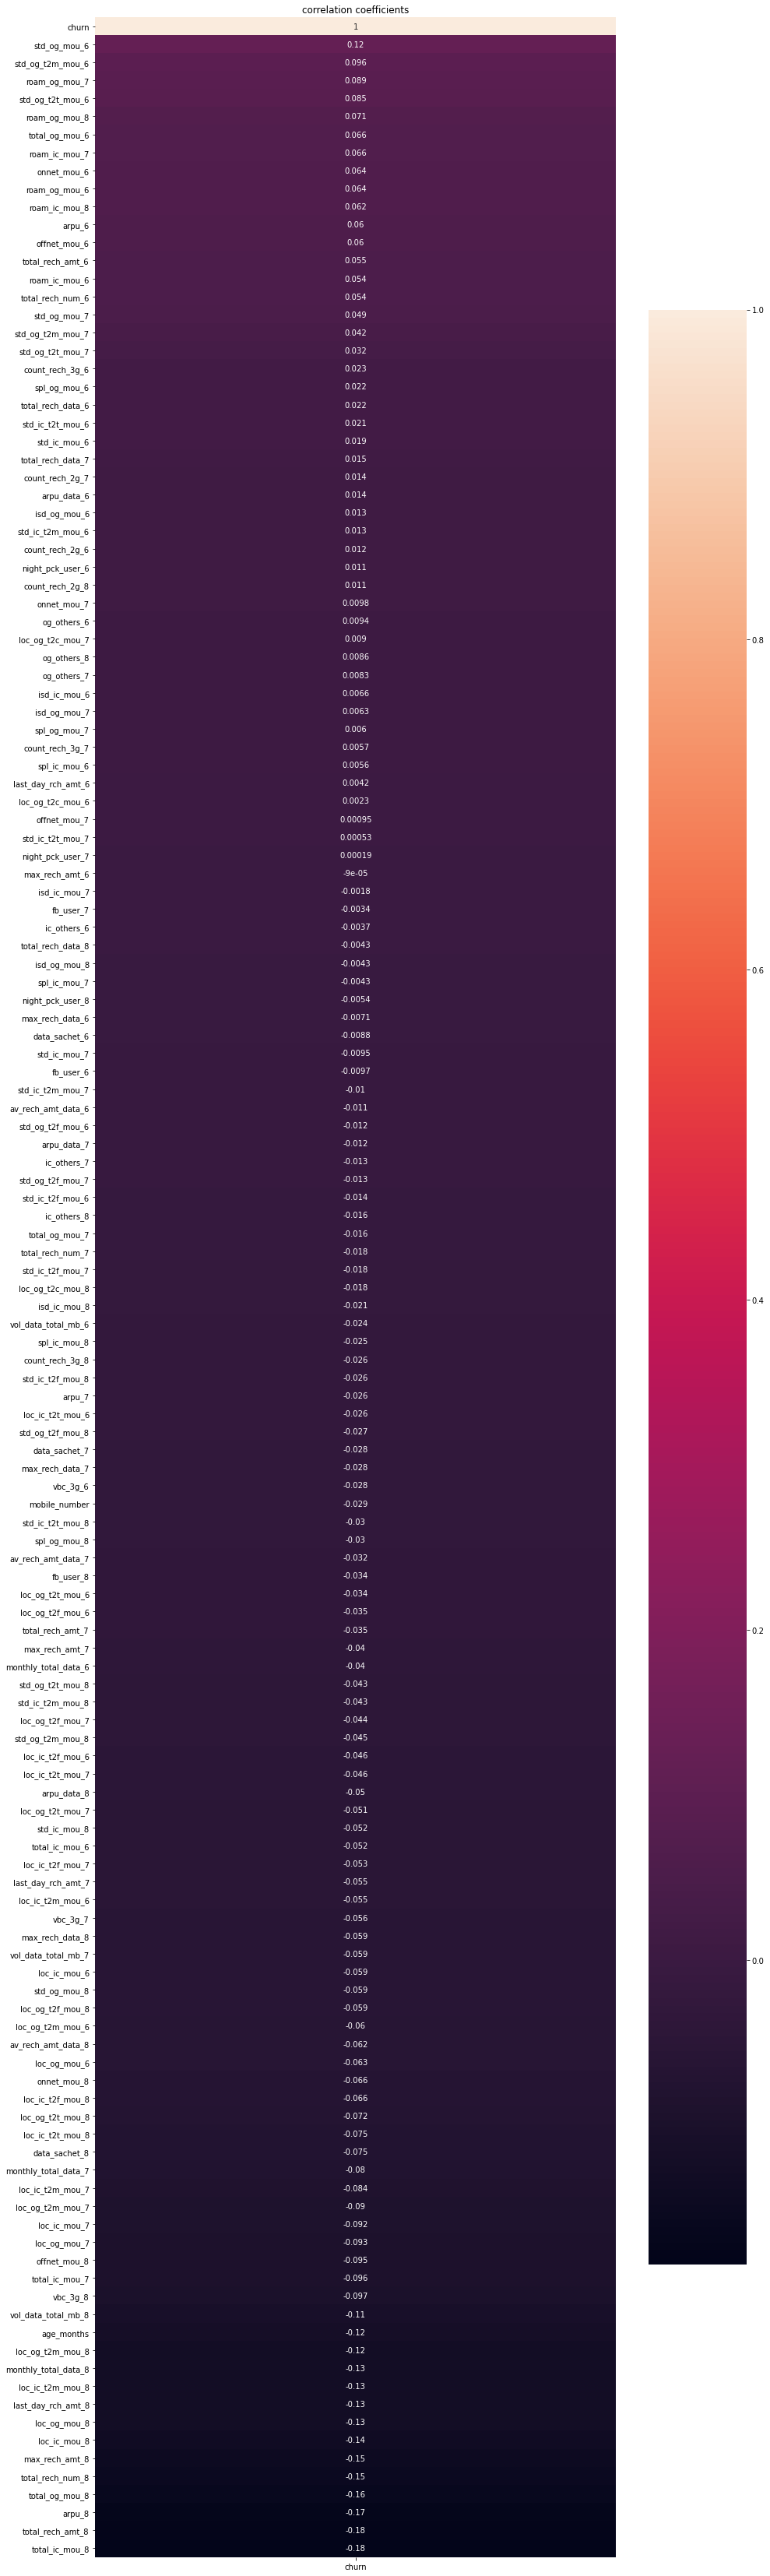

In [115]:
#plotting heatmap for the correlations between churn and columns we are left with after all operations

plt.figure(figsize=(15,60))
heat_map = sns.heatmap(X_knn2.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True)
heat_map.set_title('correlation coefficients', fontsize=12)

**We see above that the month of august is where the correlations go negative side the most. Also, the outgoing calls show positive correlations i.e. it's a important metric to be considered while modeling. -these are insights form the above exercise**

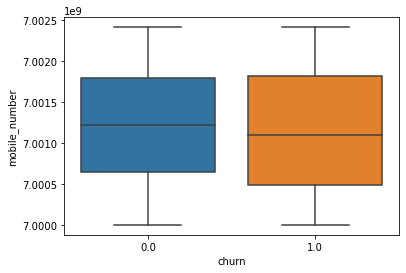

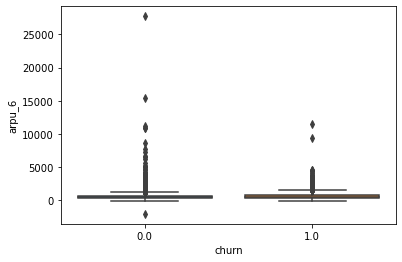

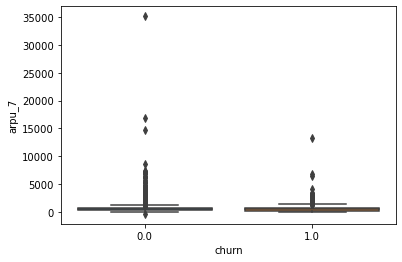

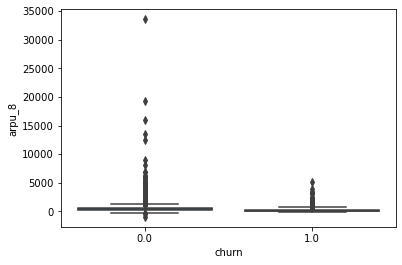

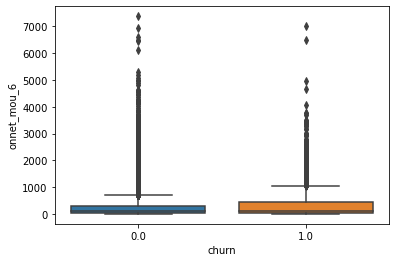

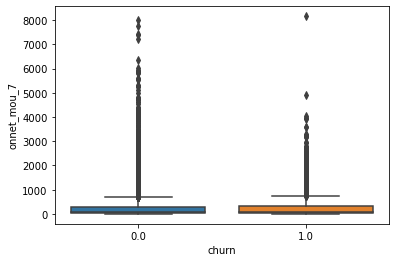

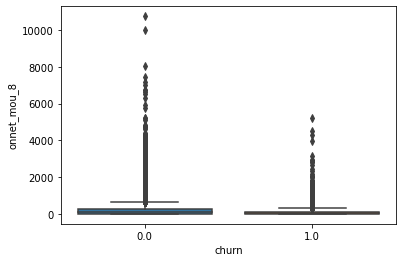

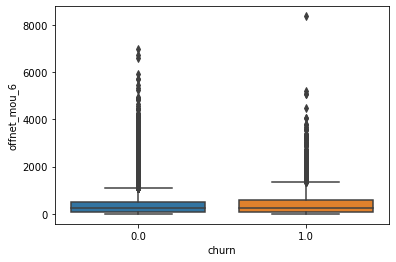

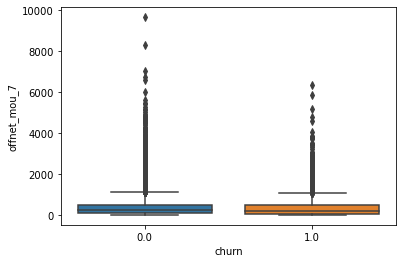

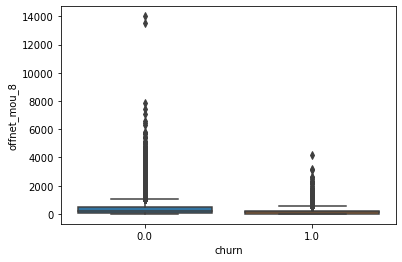

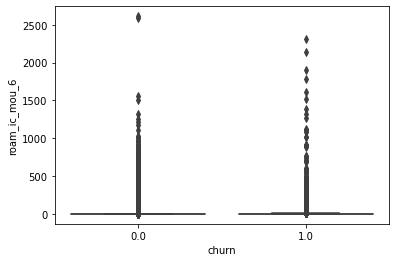

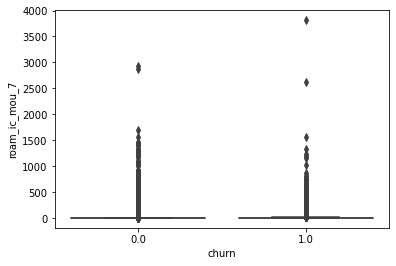

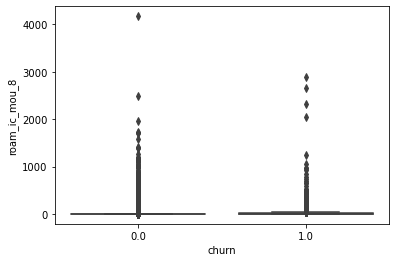

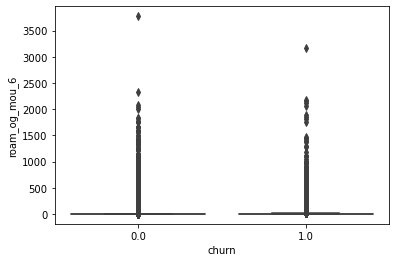

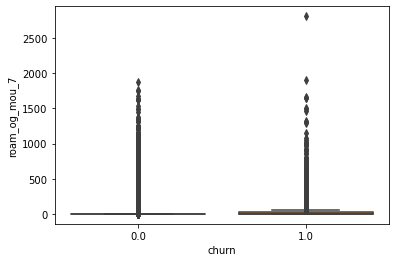

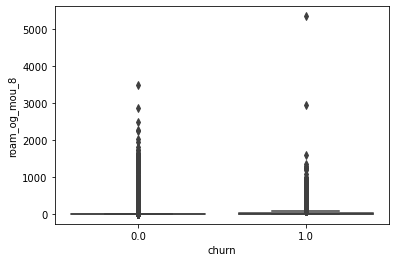

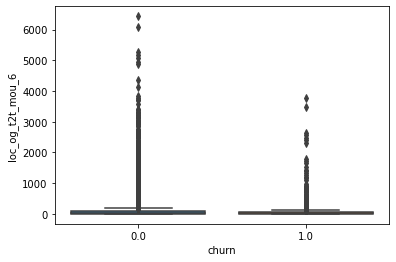

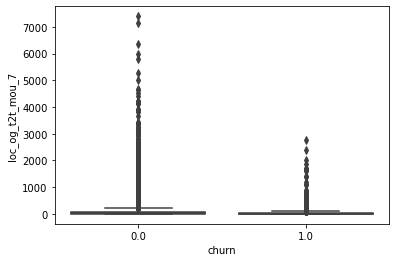

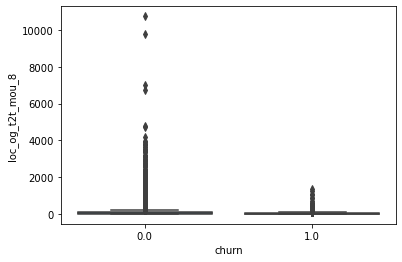

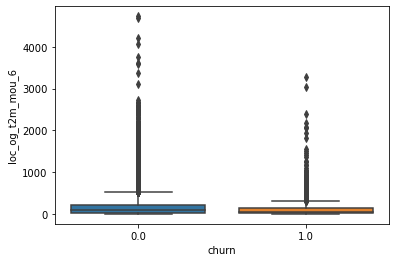

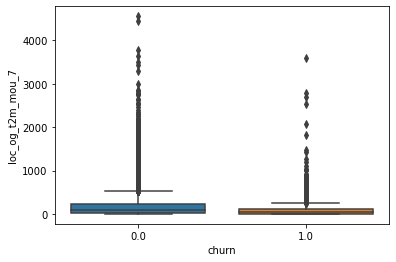

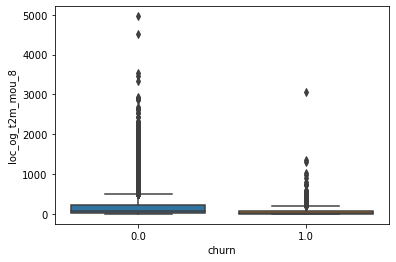

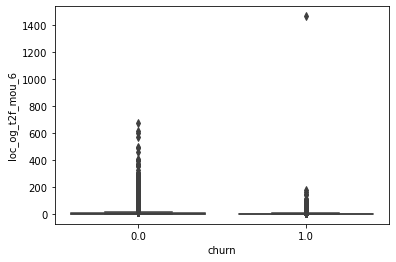

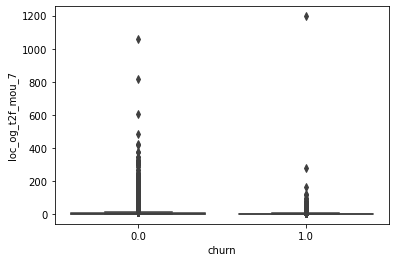

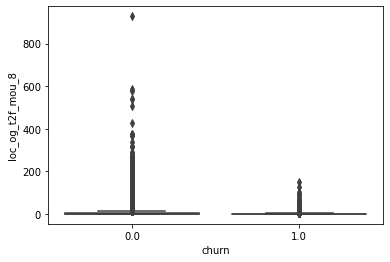

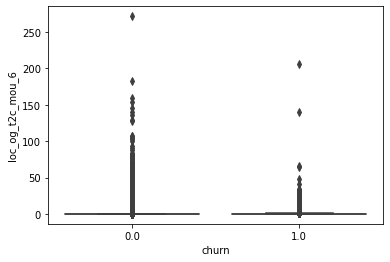

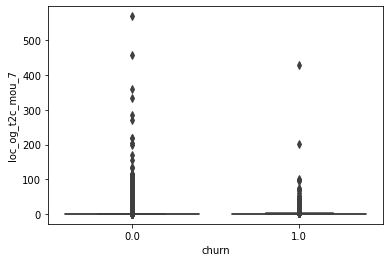

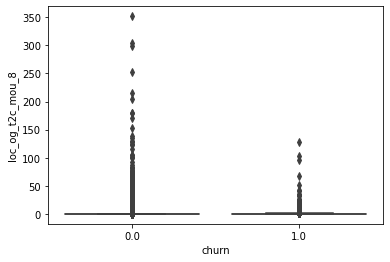

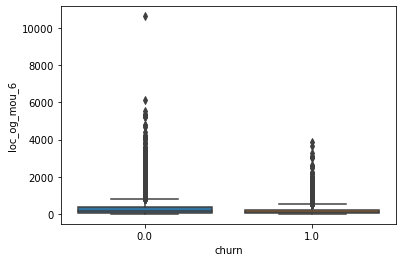

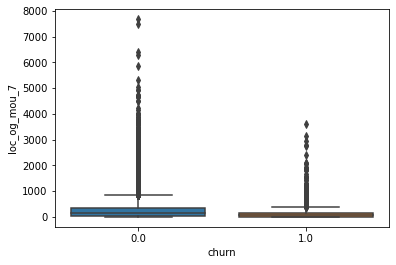

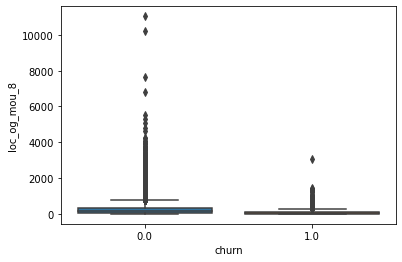

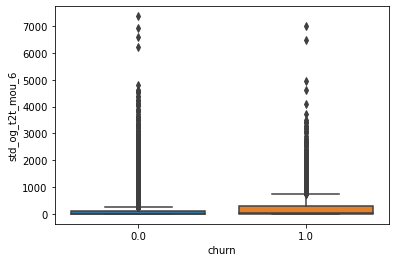

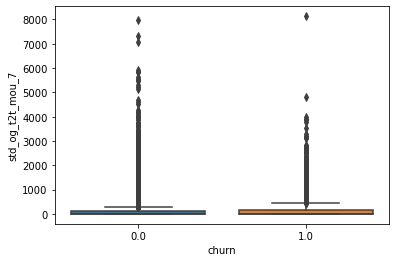

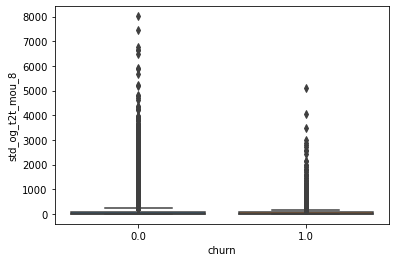

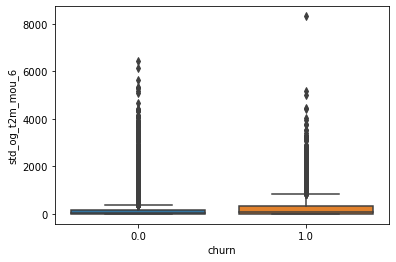

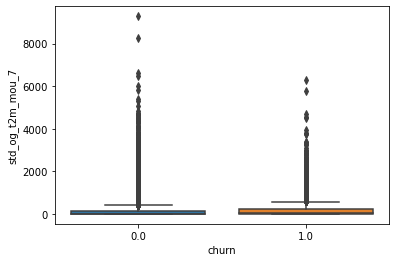

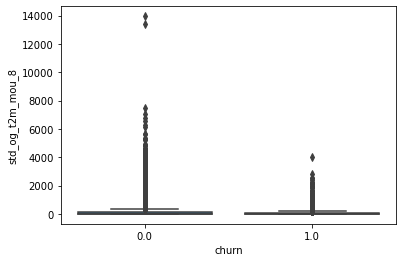

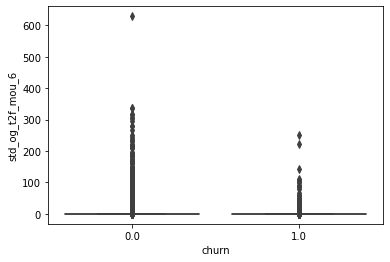

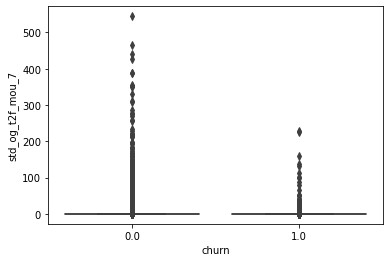

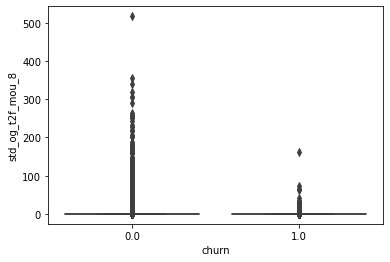

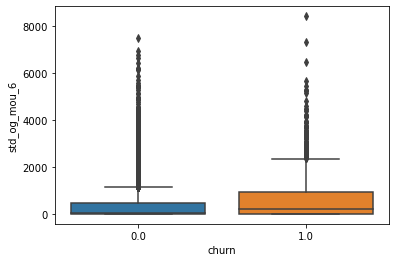

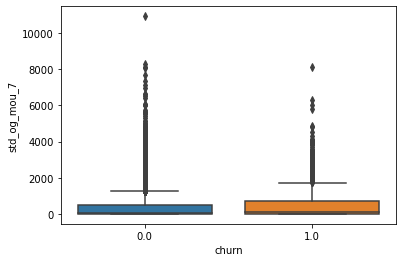

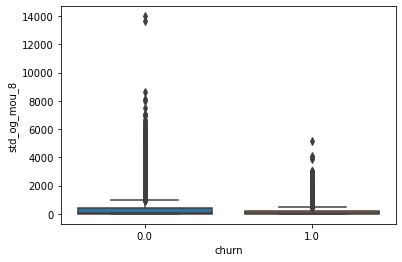

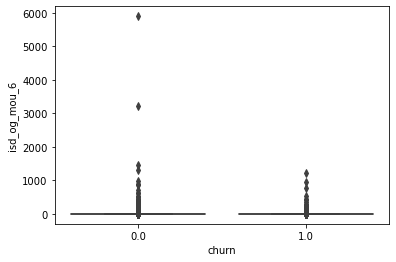

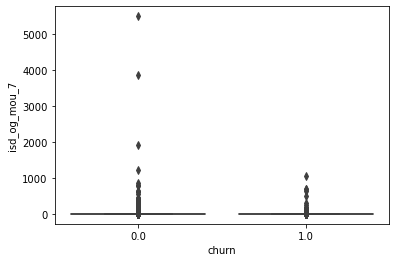

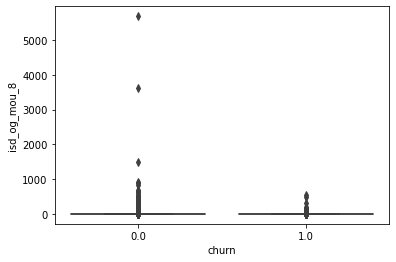

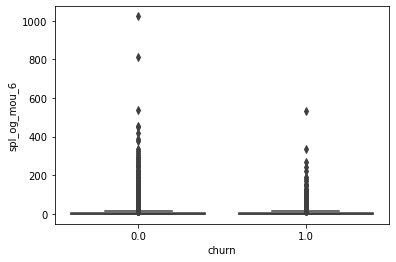

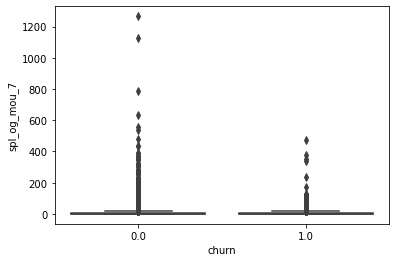

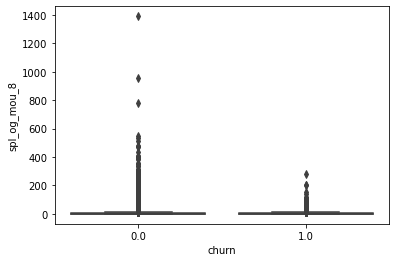

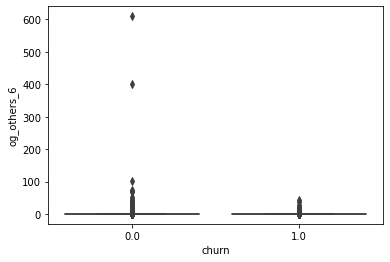

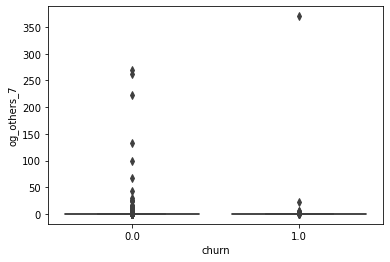

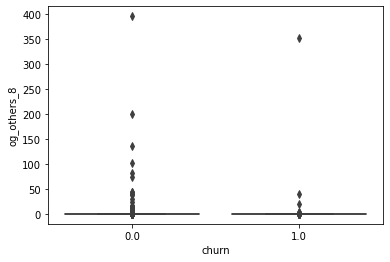

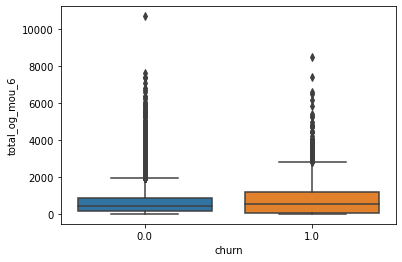

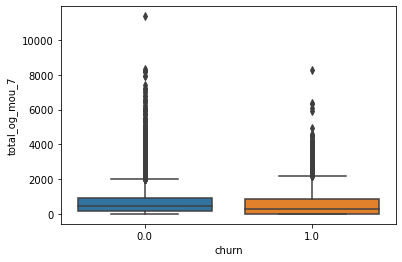

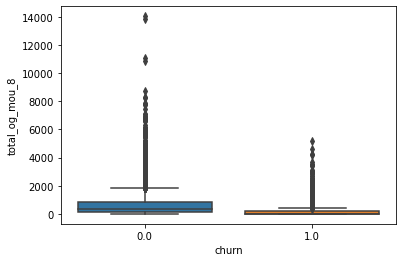

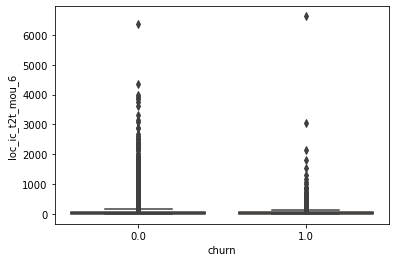

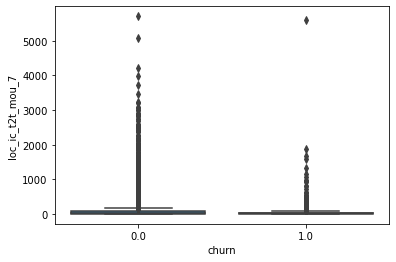

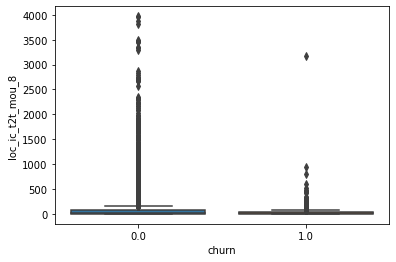

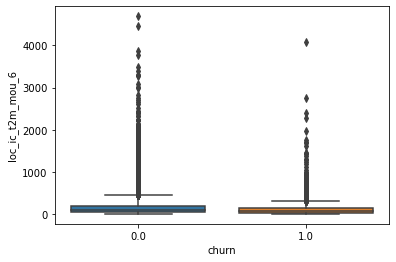

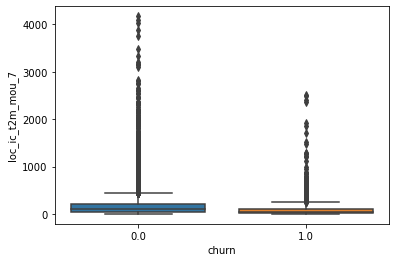

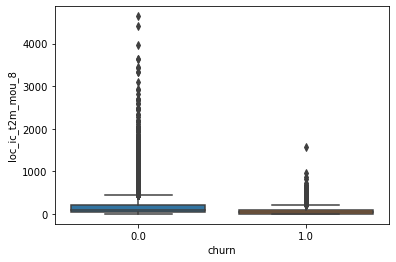

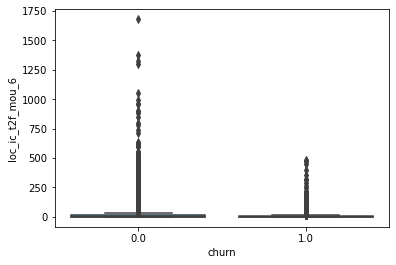

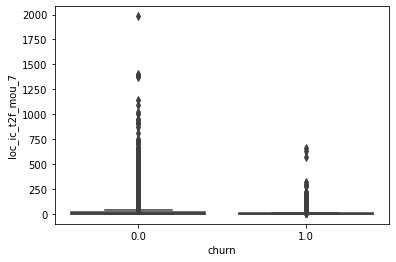

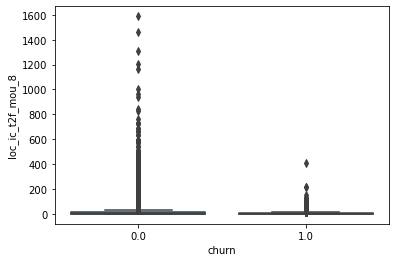

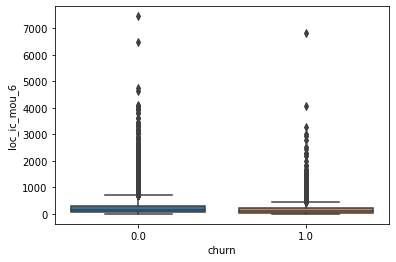

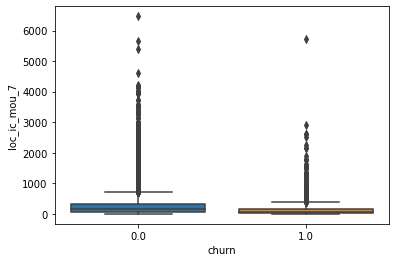

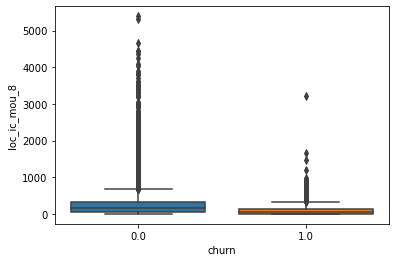

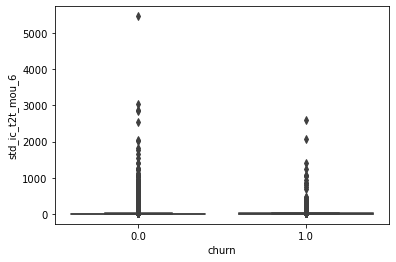

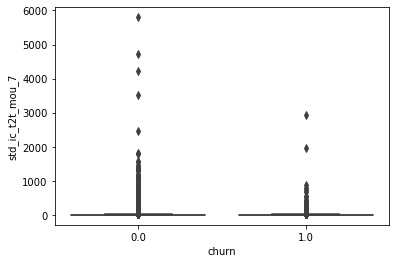

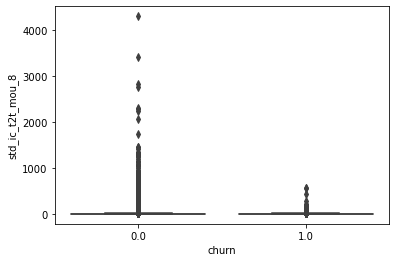

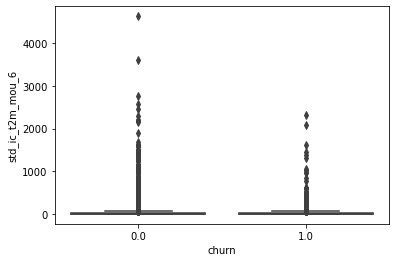

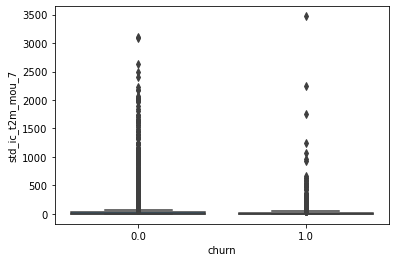

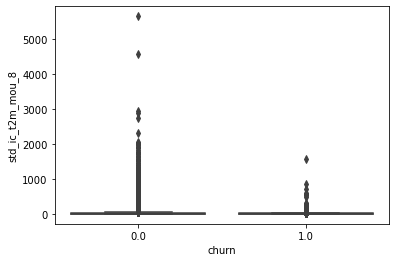

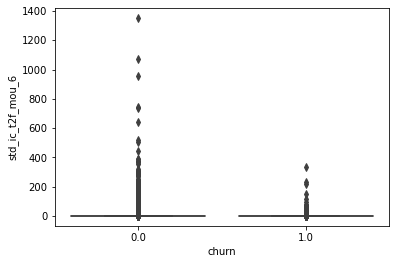

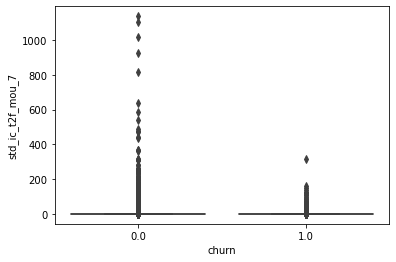

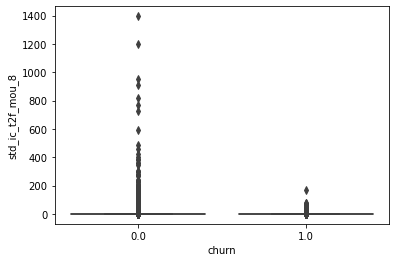

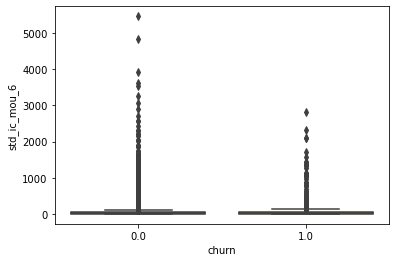

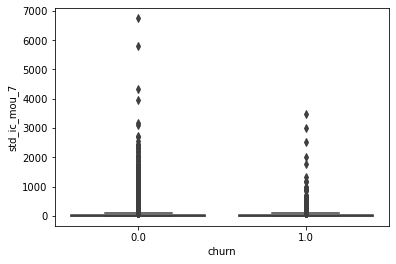

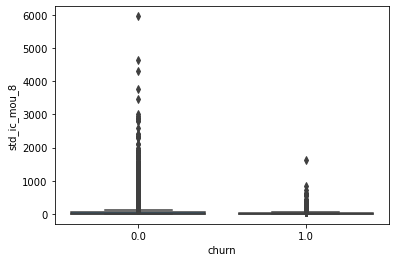

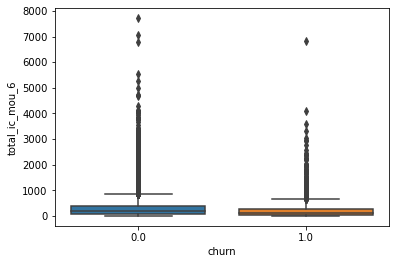

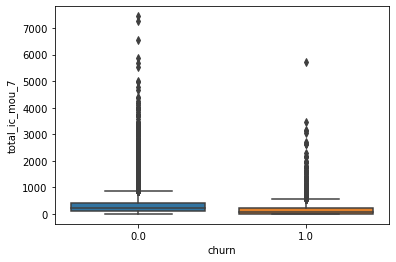

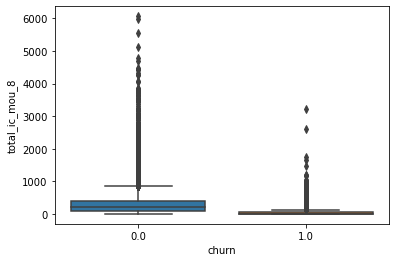

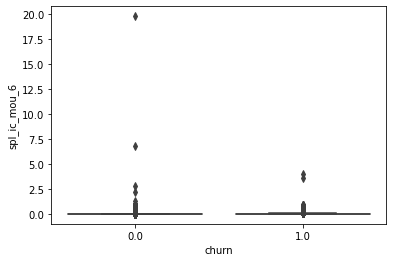

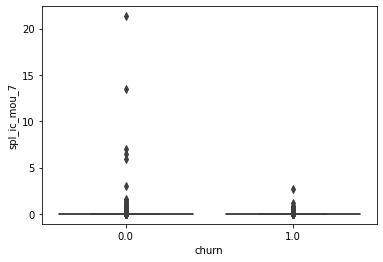

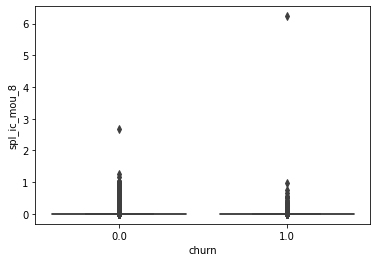

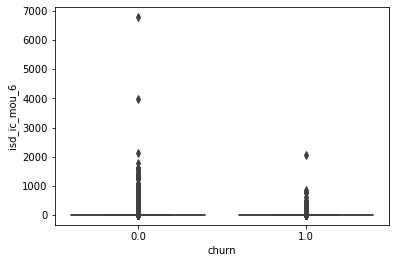

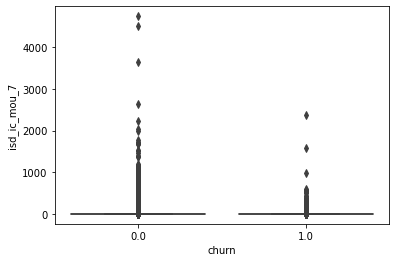

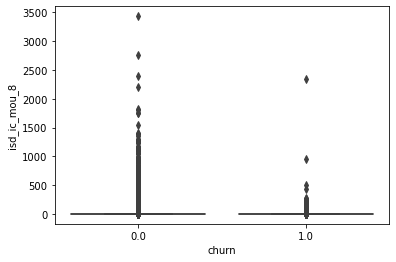

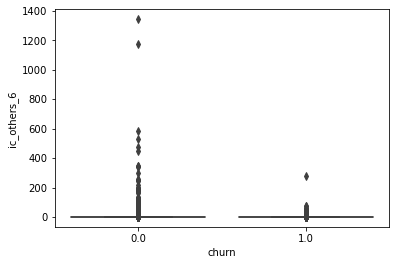

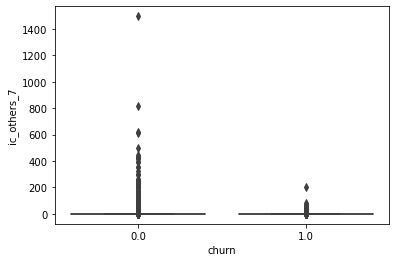

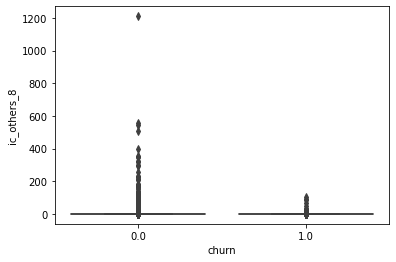

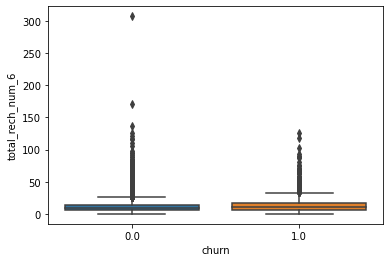

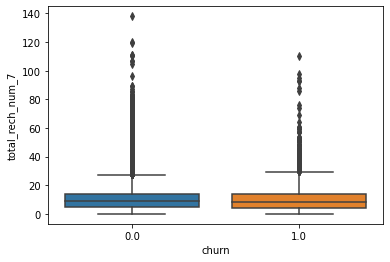

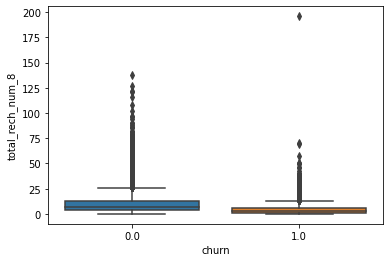

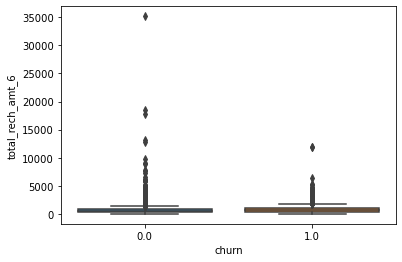

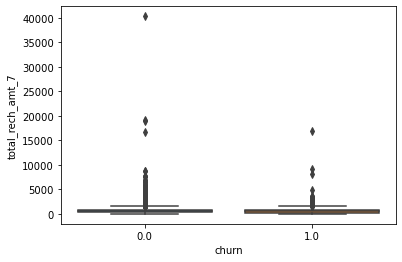

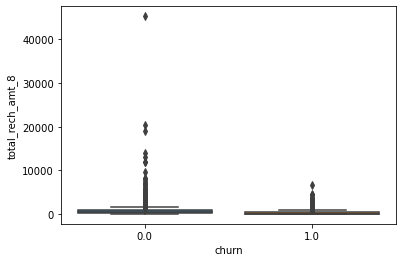

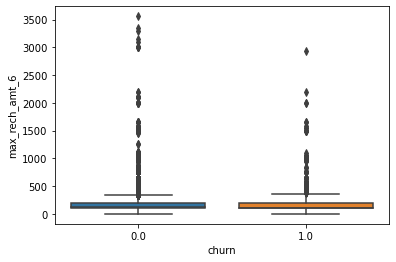

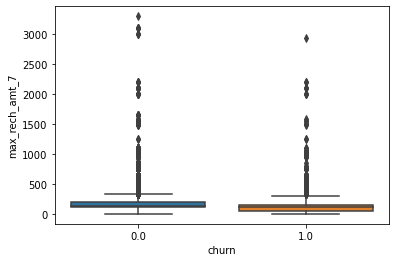

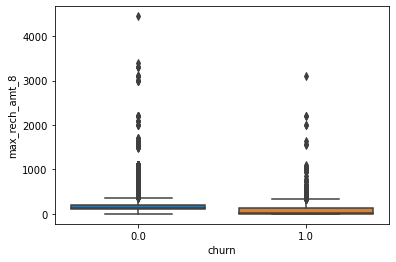

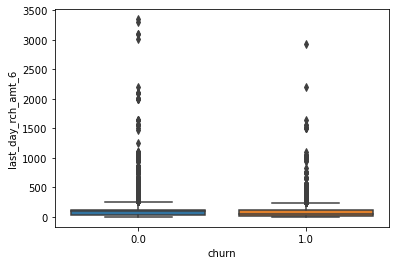

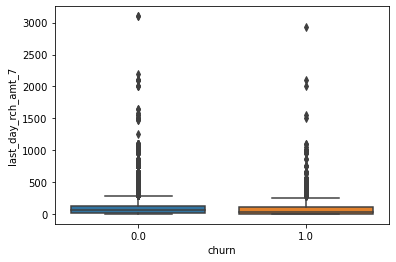

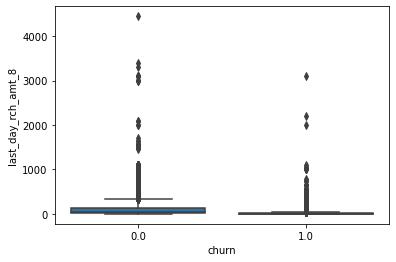

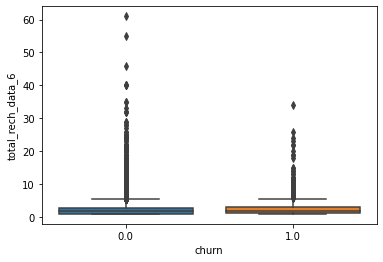

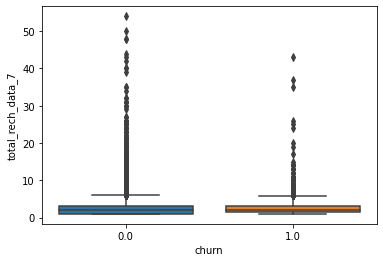

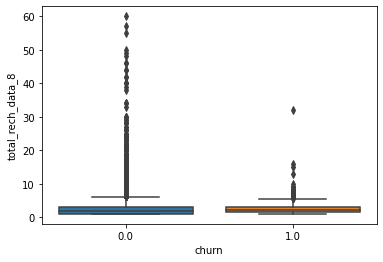

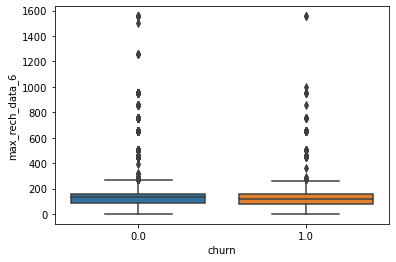

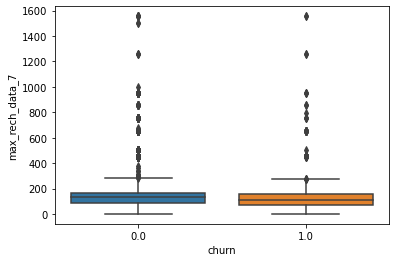

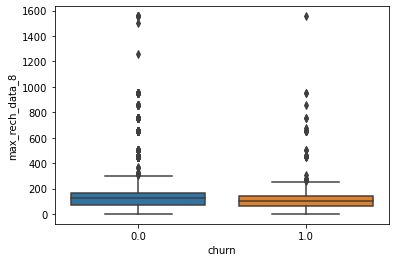

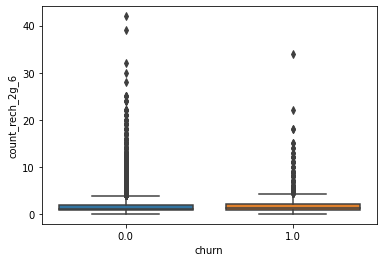

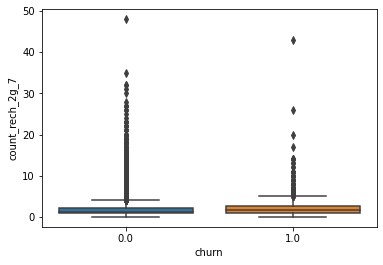

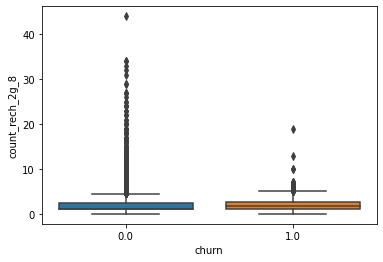

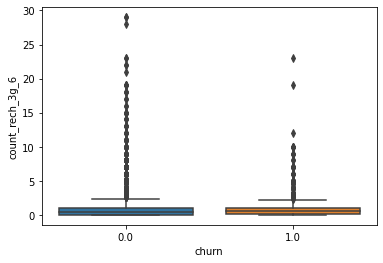

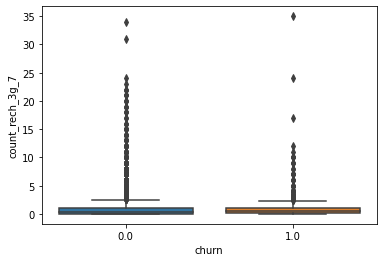

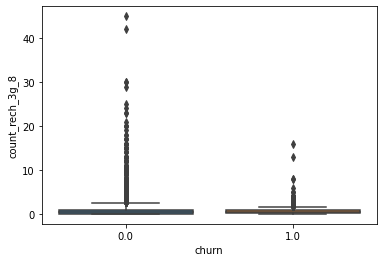

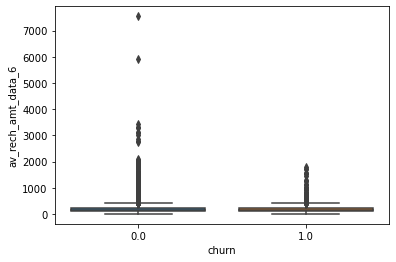

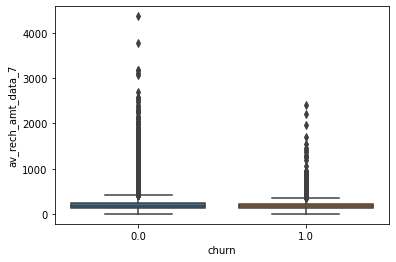

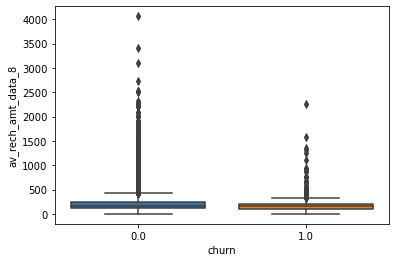

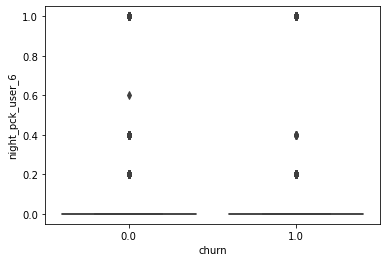

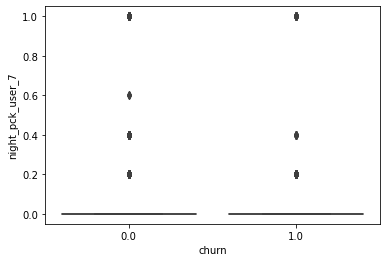

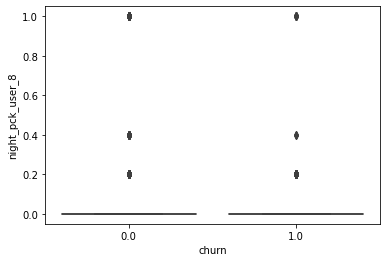

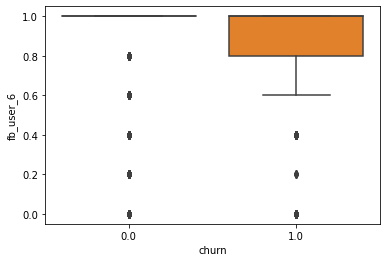

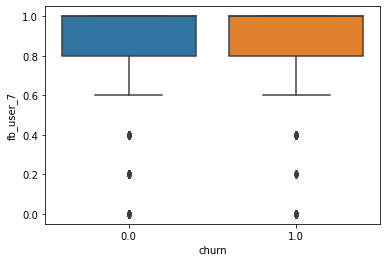

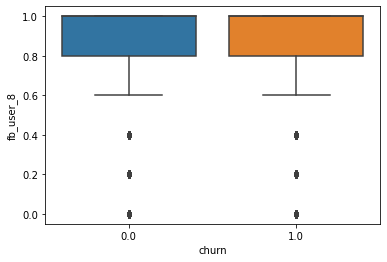

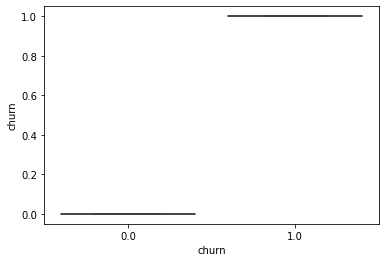

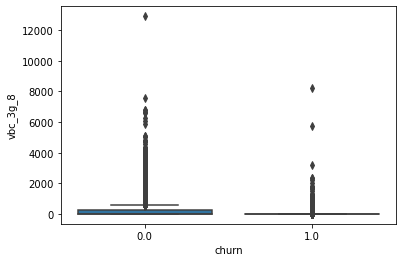

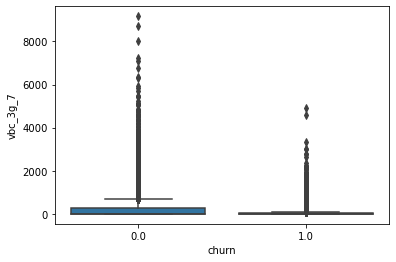

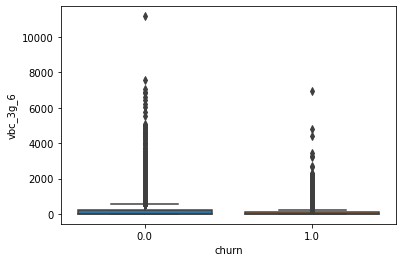

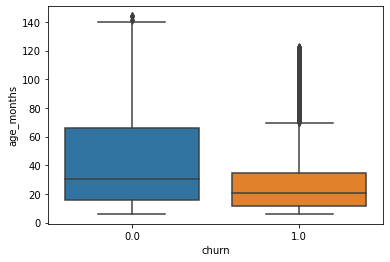

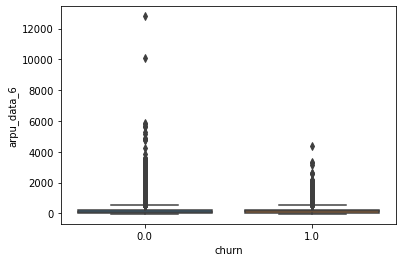

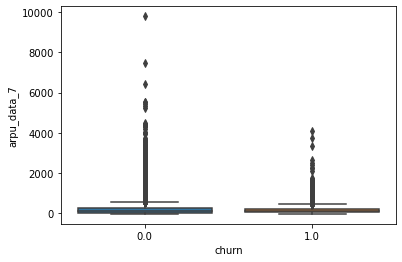

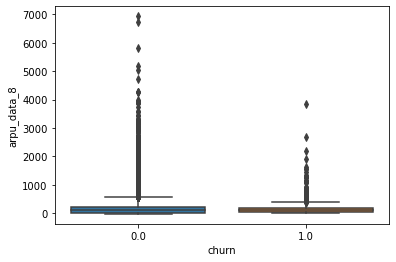

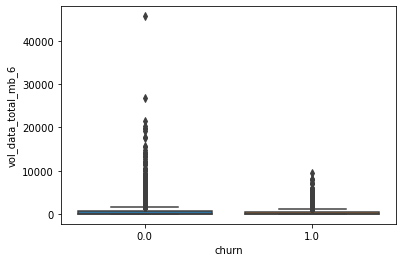

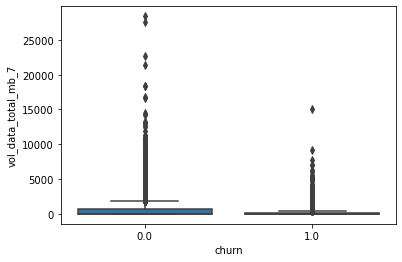

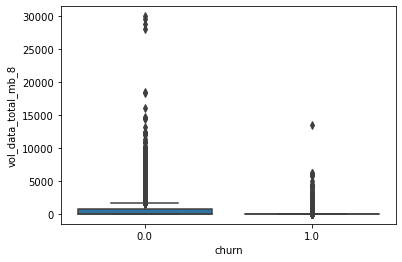

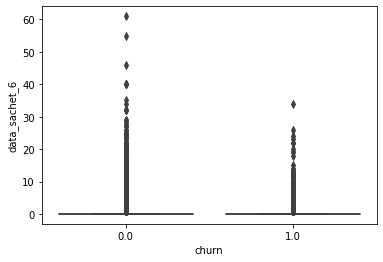

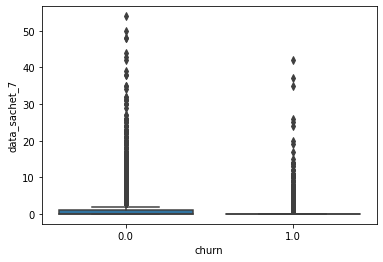

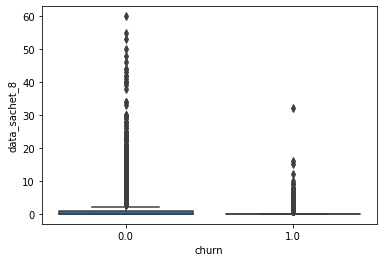

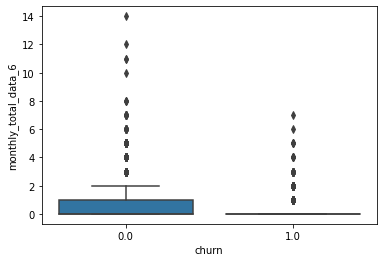

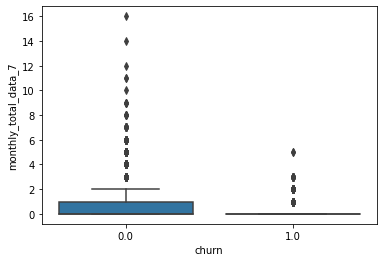

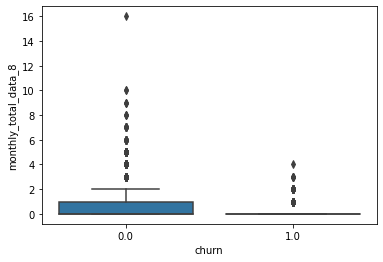

In [116]:
#checking for patterns in the data inferences mentioned in below markdown columns

for i in list(X_knn2.columns):
    sns.boxplot(x = X_knn2.churn, y = X_knn2[i])
    plt.show()

**As we see the Plots above there's something going on in the Month of august. Just beofre the customer is churning. i.e. it's a pahse when we cna know what probably goes wrong that makes the customer churn causing loss of revenue. There's a dip in usage of almost all types of calls and data usage variants also show considerable dip in the eighth month, for customers that are churning.**

**Age on network also shows a trend that the customers with high age in months are less likely to churn as comapred to people with less age in months on the netwrok. Also, we see that the customers who are likely to churn are less active on the network or in high likelyhood use multiple networks when comapred to loyal customers. Loyal customers use the service aggressively but, the ones that are likely to churn don't use that much when comapred to non churning customers.**

In [117]:
#checking column names in the remaining dataframe

list(X_knn2.columns)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [118]:
#month 6 columns 

list_6 = ['arpu_6',
 'onnet_mou_6', 
 'offnet_mou_6', 
 'roam_ic_mou_6', 
 'roam_og_mou_6', 
 'loc_og_t2t_mou_6', 
 'loc_og_t2m_mou_6', 
 'loc_og_t2f_mou_6', 
 'loc_og_t2c_mou_6', 
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6', 
 'std_og_t2f_mou_6', 
 'std_og_mou_6',
 'isd_og_mou_6', 
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'night_pck_user_6',
 'fb_user_6',
 'vbc_3g_6',
 'age_months',
 'arpu_data_6',
 'vol_data_total_mb_6',
 'data_sachet_6',
 'monthly_total_data_6'
]
print(len(list_6))

47


In [119]:
#month 7 columns

list_7 = ['arpu_7', 
 'onnet_mou_7', 
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'total_og_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7',
 'total_rech_num_7',
 'total_rech_amt_7',
 'max_rech_amt_7',
 'last_day_rch_amt_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7',
 'night_pck_user_7',
 'fb_user_7',
 'vbc_3g_7',
 'age_months',
          'vol_data_total_mb_7',
 'arpu_data_7',
 'data_sachet_7',
 'monthly_total_data_7']
print(len(list_7))

47


In [120]:
#month 8 columns

list_8 = ['arpu_8', 
 'onnet_mou_8',
 'offnet_mou_8',
'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'fb_user_8',
 'vbc_3g_8',
 'age_months',
 'arpu_data_8',
 'vol_data_total_mb_8',
 'data_sachet_8',
 'monthly_total_data_8']
print(len(list_8))

47


#### below 3 cells took long we executed them but learnings are not new

In [121]:
#X_knn2.to_csv('beforeModeling telecom churn.csv')

In [122]:
#plt.figure()
#sns.pairplot(X_knn2, vars=list_6, hue = "churn")
#plt.show()

In [123]:
#plt.figure()
#sns.pairplot(X_knn2, vars=list_7, hue = "churn")
#plt.show()

In [124]:
#plt.figure()
#sns.pairplot(X_knn2, vars=list_8, hue = "churn")
#plt.show()

In [125]:
#trying to subset the dataframe

#HERE WE FOUND SOMETHING STANGE OR MYSTERIOUS REGARDING THE FOLKS WHO USE IT VERY MUCH OR ARE KIND OF USING IT WITHOUT PAYING

#SO, WE DECIDED TO GO WITH A SUBSET OF DATA IN ORDER TO CONSIDER MODELING FOR COMMON FOLKS AND NOT OUTLIERS WHOES 

# USAGE CANNOT BE JUDGED WHETHER THEY'D CHURN OR NOT. MAYBE THEY ARE USING THE SERVICE FOR A SHORT PERIOD OF TIME ONLY.

#WE ARE SUBSETTING THE DTAAFRAME BASED ON THE ABOVE ASSUMPTION

X_knn2.describe(percentiles=[0.02,0.05, 0.1, 0.25,0.5,0.75,0.90,0.95,0.99, .9995])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count    3.000000e+04  30000.000000  30000.000000  30000.000000  30000.000000   
mean     7.001209e+09    568.644852    566.334161    512.857465    268.979567   
std      6.834018e+05    456.690063    478.558459    500.133858    460.814488   
min      7.000000e+09  -2041.228000   -369.945000   -945.808000      0.000000   
2%       7.000051e+09     35.434100     23.700000      0.000000      0.000000   
5%       7.000130e+09    125.423350    116.207600      3.693500      0.000000   
10%      7.000261e+09    188.865200    183.545800     83.688300      2.640000   
25%      7.000629e+09    330.711500    324.064750    240.855500     22.680000   
50%      7.001207e+09    492.088000    486.450500    434.376500     93.130000   
75%      7.001792e+09    704.738500    700.794000    664.192000    302.940000   
90%      7.002158e+09    995.610900    997.047500    978.505800    771.615000   
95%      7.002285e+09   1242.437600   1262.494750   1254.784500   1140.933000   
99%      7.002385e+09   1985.711760   1999.546910   1983.514250   2158.820000   
99.95%   7.002410e+09   5147.562342   5674.042126   5748.318020   4820.839335   
max      7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

         onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count   30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      273.103694    241.000451    384.780672    385.607846    345.392215   
std       480.308561    456.941049    479.126055    495.043432    476.663872   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
2%          0.000000      0.000000      0.000000      0.000000      0.000000   
5%          0.000000      0.000000      4.149500      3.479000      1.129000   
10%         2.210000      1.130000     21.060000     19.926000     12.058000   
25%        21.230000     16.980000     88.255000     83.967500     66.372000   
50%        89.290000     75.210000    237.510000    229.670000    197.120000   
75%       299.105000    250.765000    497.165000    498.042500    445.572500   
90%       788.280000    676.183000    904.931000    916.086000    827.011000   
95%      1187.807000   1076.761000   1259.616500   1271.153500   1167.092000   
99%      2213.351800   2152.548700   2325.293700   2395.911900   2189.151000   
99.95%   5531.748370   5193.663950   4859.425750   5020.412585   5184.195135   
max      8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

        roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count    30000.000000   30000.000000   30000.000000   30000.000000   
mean        16.649431      12.927940      13.064814      27.530749   
std         77.340274      76.224445      76.051850     117.113219   
min          0.000000       0.000000       0.000000       0.000000   
2%           0.000000       0.000000       0.000000       0.000000   
5%           0.000000       0.000000       0.000000       0.000000   
10%          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
90%         30.442000      15.691000      18.116000      54.213000   
95%         87.710000      57.062500      58.691900     150.804500   
99%        347.280100     276.801600     283.541700     537.604800   
99.95%    1216.680065    1315.692900    1242.240580    1771.527975   
max       2613.310000    3813.290000    4169.810000    3775.110000   

        roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count    30000.000000   30000.000000      30000.000000      30000.000000   
mean        20.512070      20.321149         87.640722         88.592787   
std         96.178029     104.204308        230.974195        243.698847   
min  

In [126]:
#subsetting the dataframe for above1% and below 99.95%

X_knn21 = X_knn2[(X_knn2['arpu_6']>=X_knn2['arpu_6'].quantile(0.01))&(X_knn2['arpu_6']<=X_knn2['arpu_6'].quantile(0.9995))]

In [127]:
#checking again if the outliers are still there.

#the outliers or ununderstandable behaviour customers are still there but, we'll go ahead with next steps keeping them

#in consideration

X_knn21.describe(percentiles=[0.02,0.05, 0.1, 0.25,0.5,0.75,0.90,0.95,0.99, .9995])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count    2.968500e+04  29685.000000  29685.000000  29685.000000  29685.000000   
mean     7.001210e+09    569.682609    562.355322    509.629801    270.938918   
std      6.828852e+05    382.913894    403.359217    417.675180    462.466971   
min      7.000000e+09      0.310000   -369.945000   -491.545000      0.000000   
2%       7.000051e+09     76.336520     25.181200      0.000000      0.000000   
5%       7.000132e+09    134.774400    117.961600      5.000000      0.000000   
10%      7.000262e+09    199.910000    184.859800     86.617200      2.934000   
25%      7.000632e+09    336.932000    325.488000    243.242000     23.240000   
50%      7.001209e+09    495.079000    486.601000    435.711000     94.590000   
75%      7.001792e+09    707.318000    698.995000    664.499000    306.090000   
90%      7.002159e+09    997.687800    993.541800    976.726000    777.440000   
95%      7.002285e+09   1242.446600   1257.298200   1251.826000   1146.470000   
99%      7.002385e+09   1970.682520   1986.309360   1963.837880   2166.798000   
99.95%   7.002410e+09   3896.600236   4331.658414   4324.790444   4830.079860   
max      7.002411e+09   5147.526000  13224.119000   6838.828000   7376.710000   

         onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count   29685.000000  29685.000000  29685.000000  29685.000000  29685.000000   
mean      273.579126    241.568858    386.881710    385.855134    345.406716   
std       479.621332    456.310062    478.535348    491.780817    471.388266   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
2%          0.000000      0.000000      0.000000      0.000000      0.000000   
5%          0.000000      0.000000      5.010000      3.860000      1.230000   
10%         2.410000      1.230000     22.730000     20.748000     12.444000   
25%        21.690000     17.360000     89.660000     84.910000     67.310000   
50%        90.410000     76.090000    239.630000    231.260000    199.080000   
75%       301.030000    252.660000    500.110000    499.240000    446.610000   
90%       788.186000    677.298000    907.608000    916.014000    827.166000   
95%      1181.144000   1076.490000   1264.682000   1266.976000   1165.046000   
99%      2204.754800   2140.604000   2325.349200   2355.738000   2144.589200   
99.95%   5534.384920   5194.908200   4848.632400   4963.045060   4968.528100   
max      8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

        roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count    29685.000000   29685.000000   29685.000000   29685.000000   
mean        16.712773      12.879902      13.030966      27.662282   
std         77.541353      76.253316      76.030253     117.427203   
min          0.000000       0.000000       0.000000       0.000000   
2%           0.000000       0.000000       0.000000       0.000000   
5%           0.000000       0.000000       0.000000       0.000000   
10%          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
90%         30.632000      15.636000      18.090000      54.651600   
95%         88.756000      56.922000      58.278400     153.024000   
99%        347.386000     275.887600     283.279600     542.171200   
99.95%    1223.000540    1316.606400    1245.573280    1777.190100   
max       2613.310000    3813.290000    4169.810000    3775.110000   

        roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count    29685.000000   29685.000000      29685.000000      29685.000000   
mean        20.420440      20.301459         88.315700         89.182735   
std         95.992996     104.245799        232.027524        244.665703   
min  

In [128]:
#checking shape of the new dataframe

X_knn21.shape

(29685, 141)

In [129]:
#we lost about 315 rows from our dataframe

X_knn2.shape

(30000, 141)

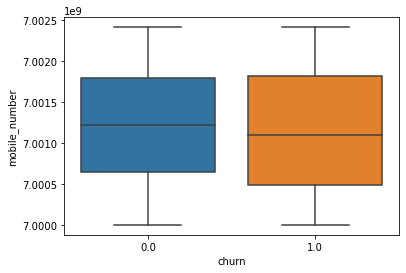

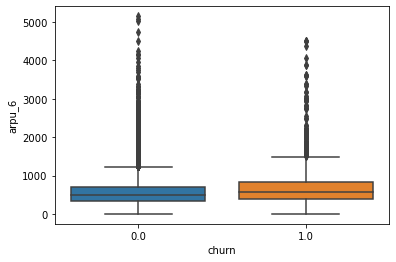

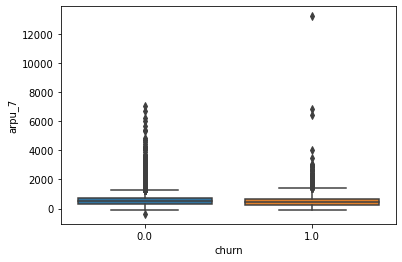

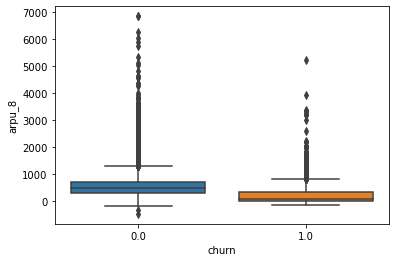

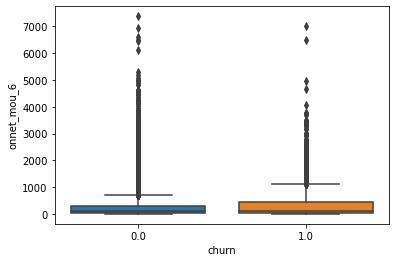

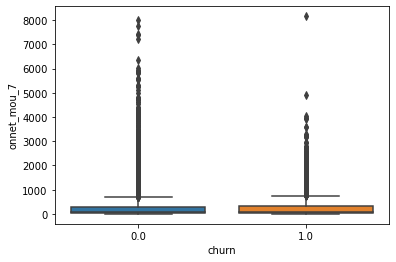

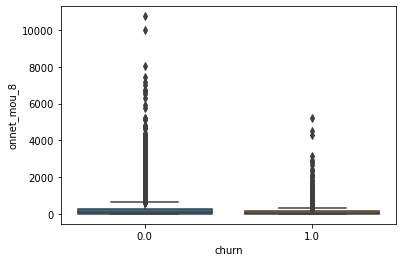

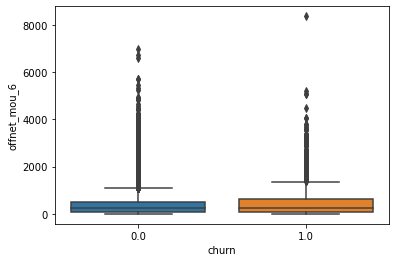

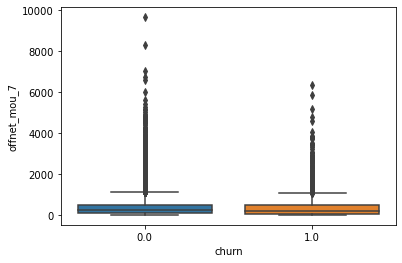

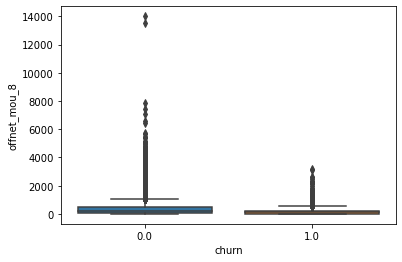

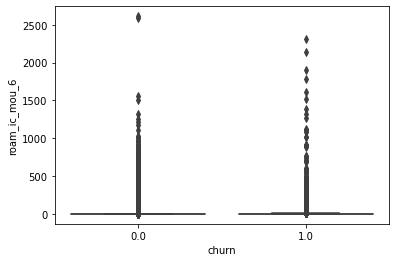

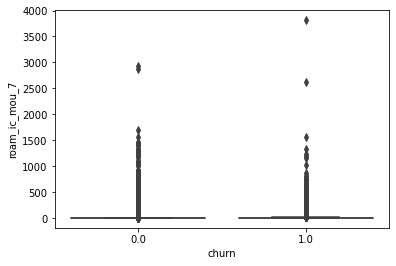

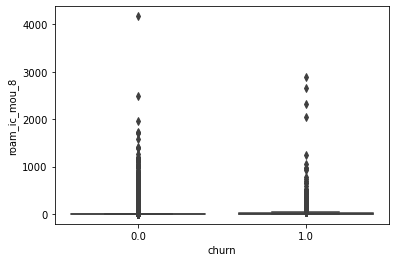

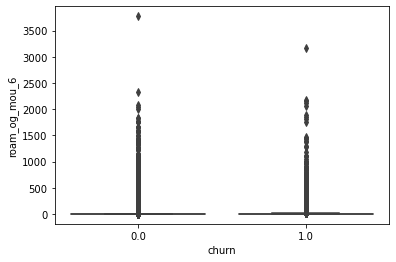

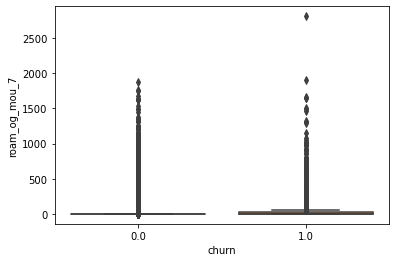

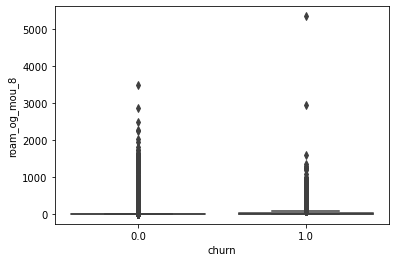

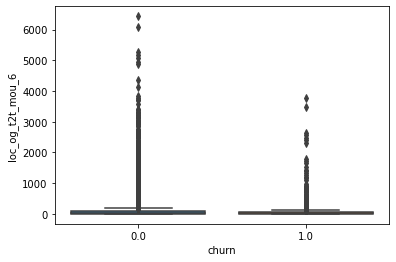

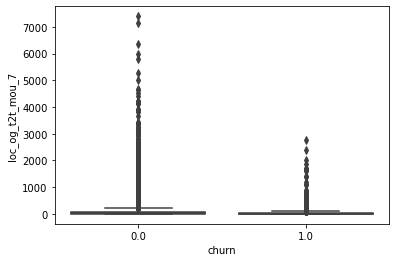

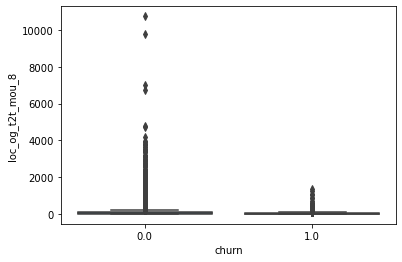

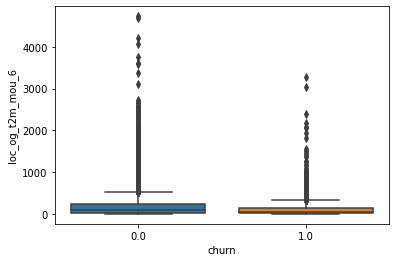

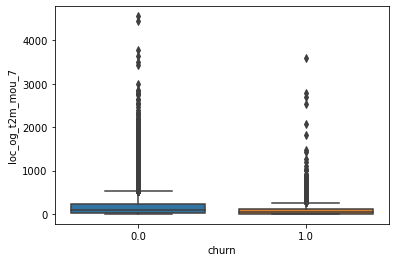

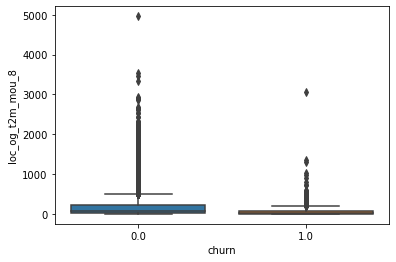

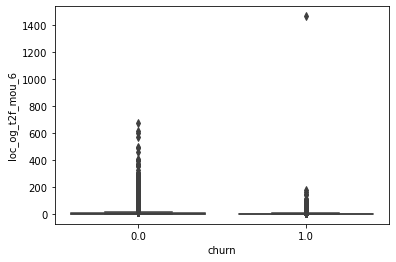

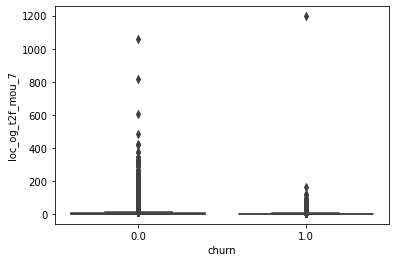

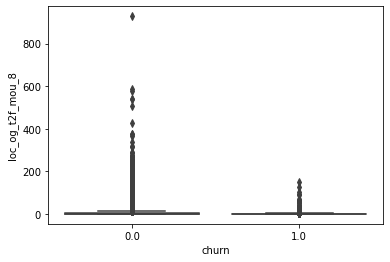

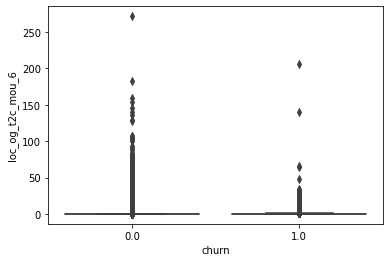

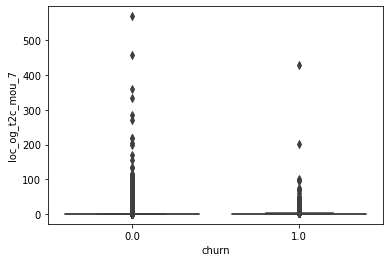

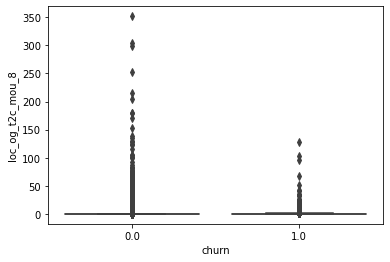

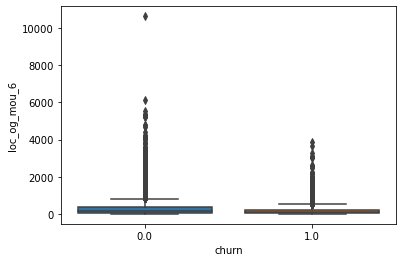

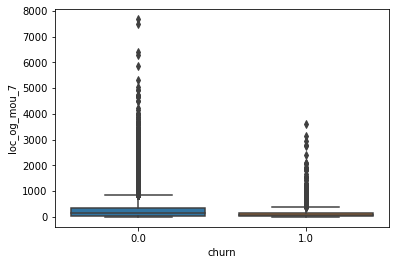

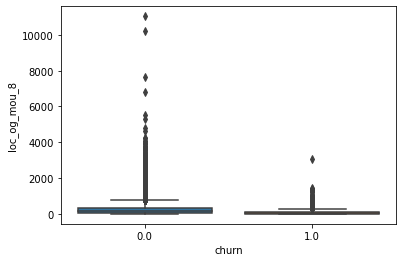

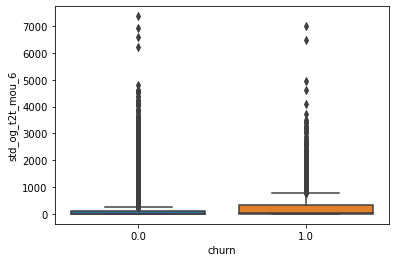

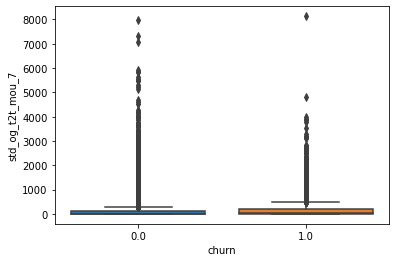

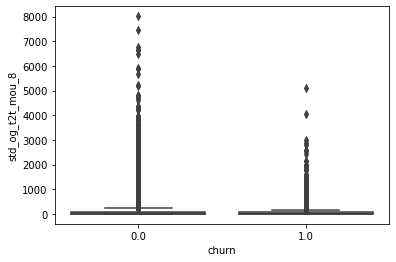

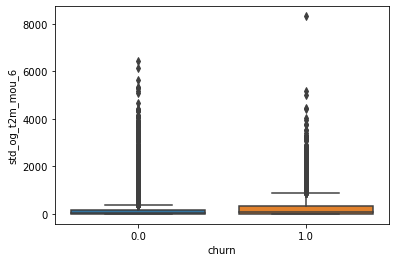

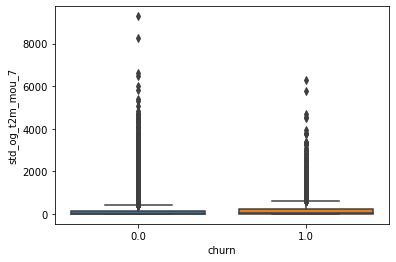

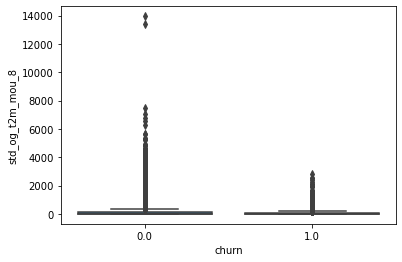

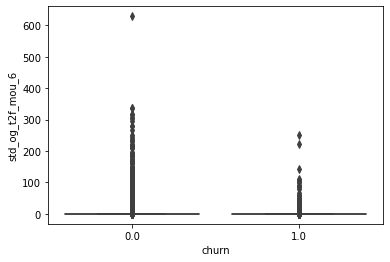

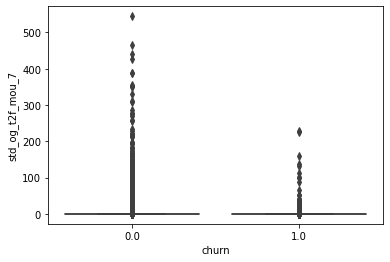

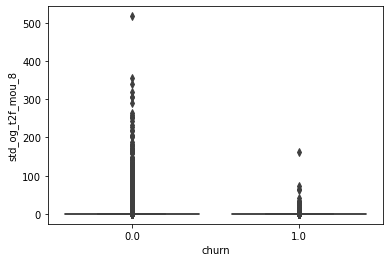

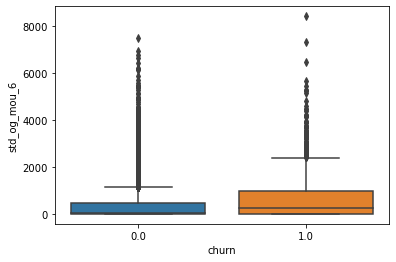

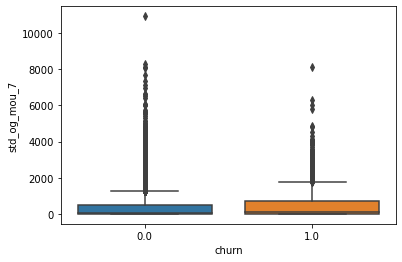

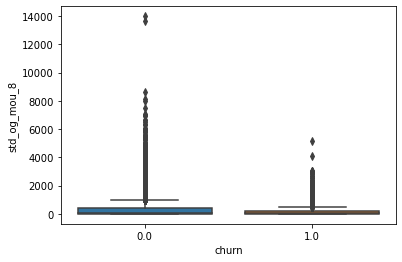

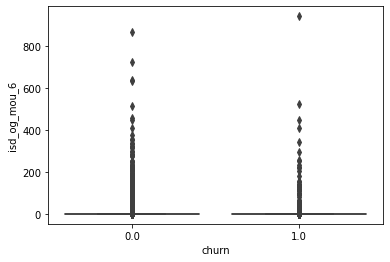

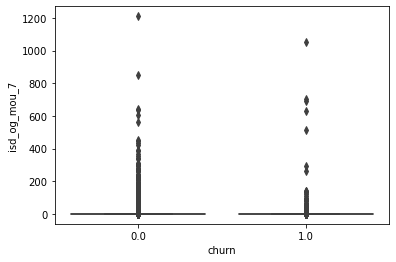

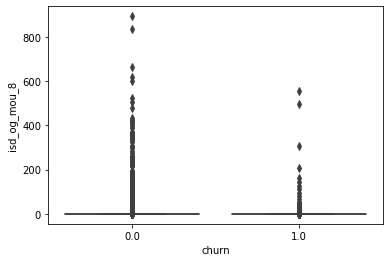

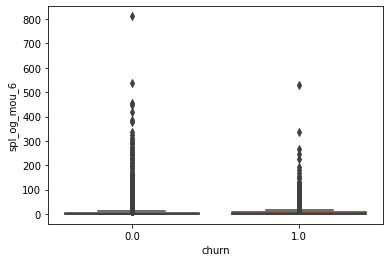

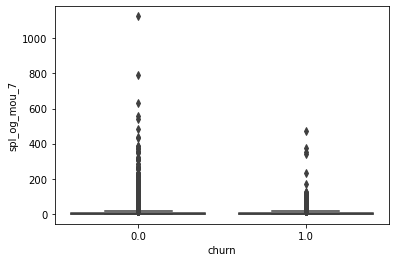

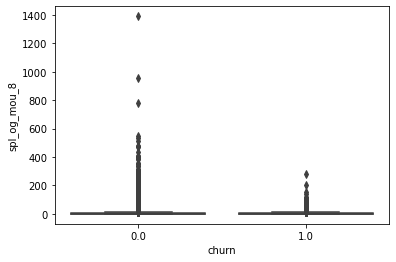

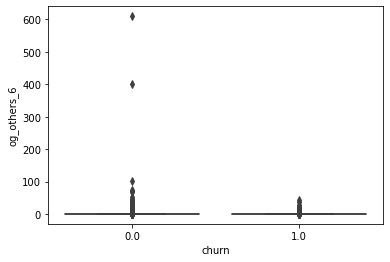

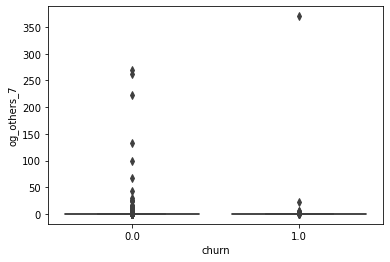

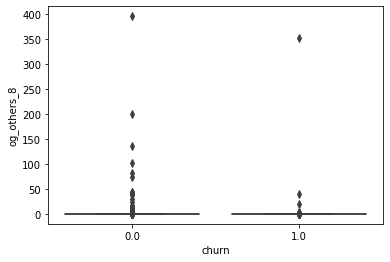

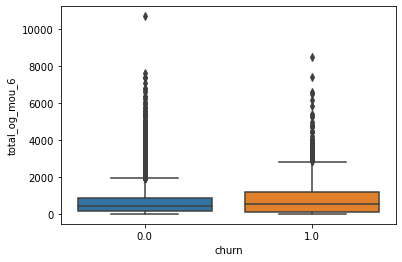

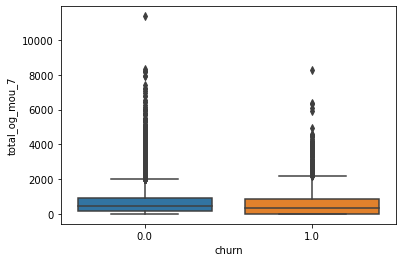

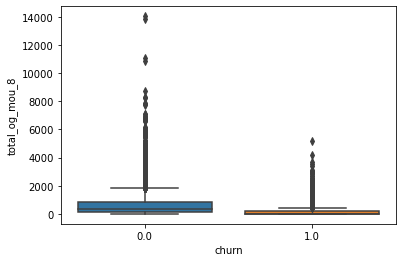

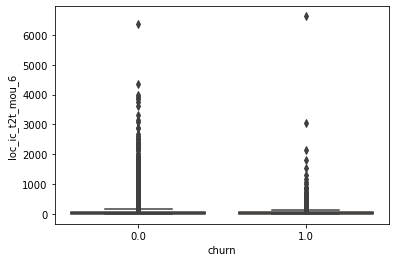

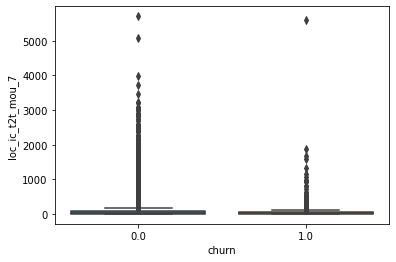

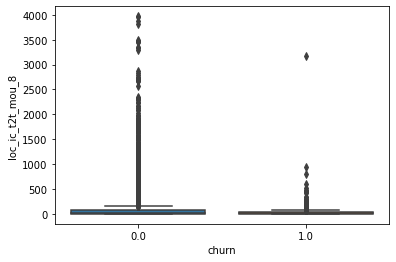

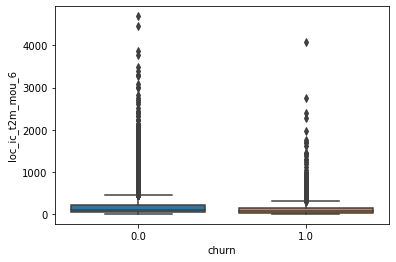

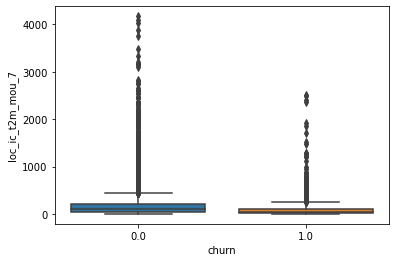

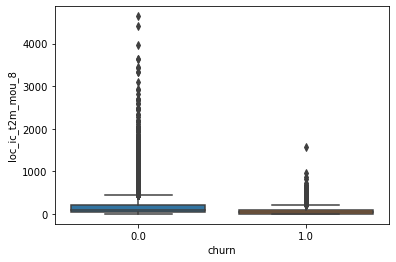

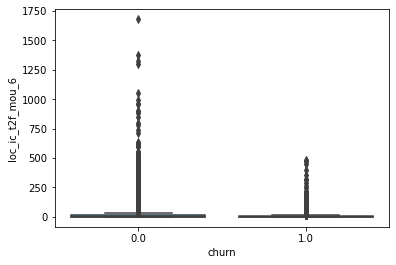

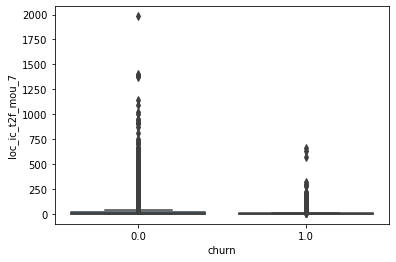

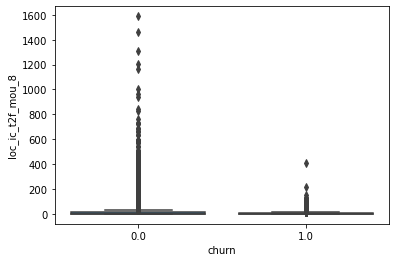

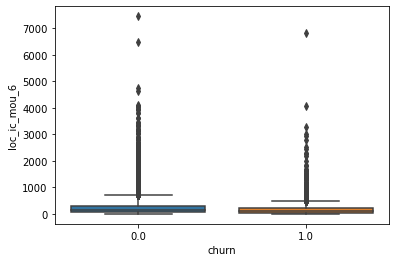

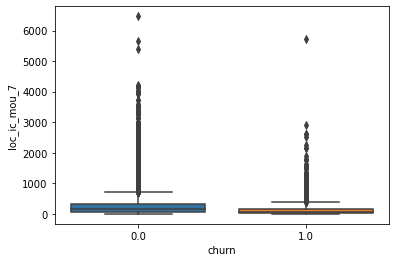

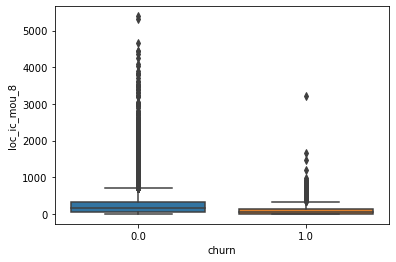

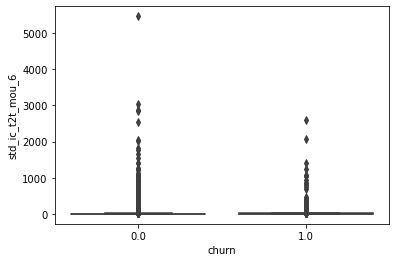

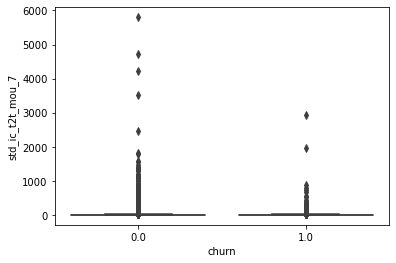

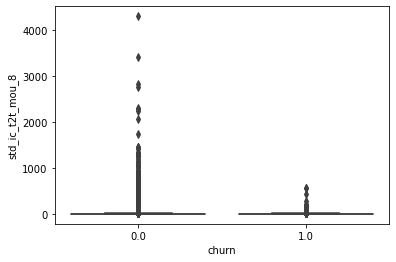

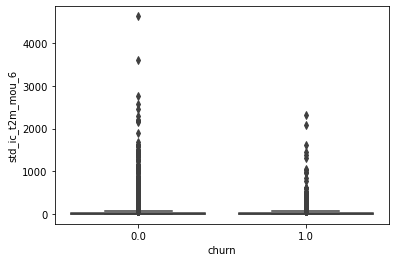

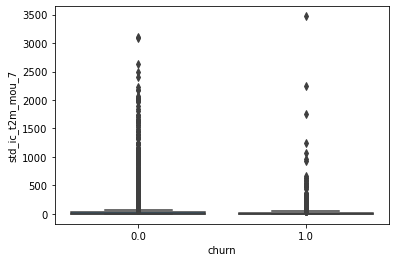

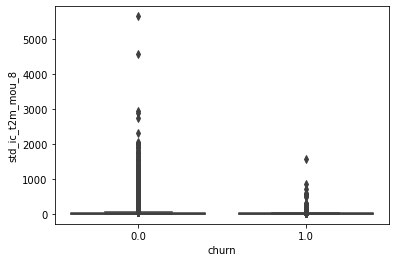

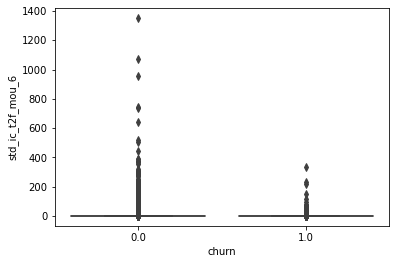

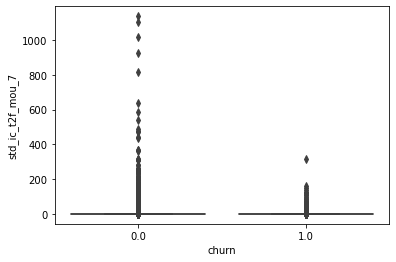

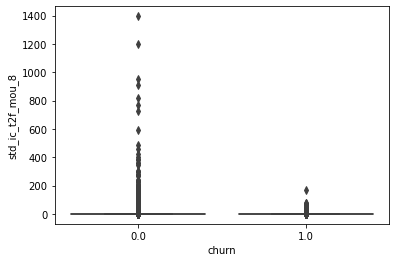

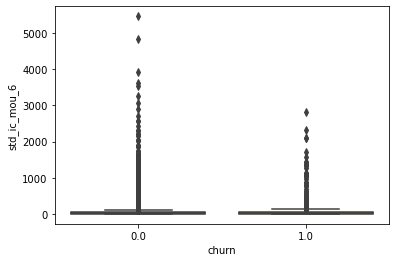

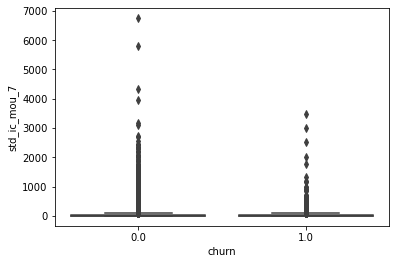

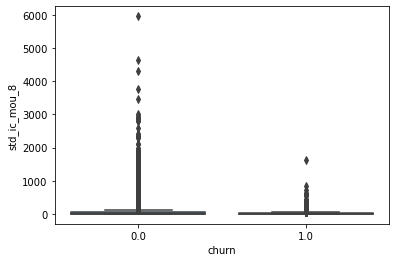

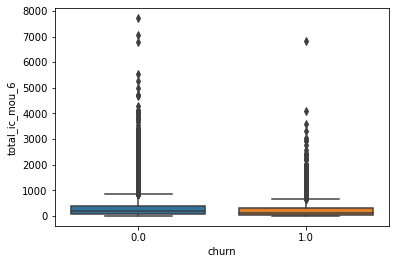

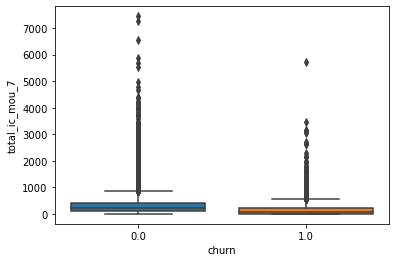

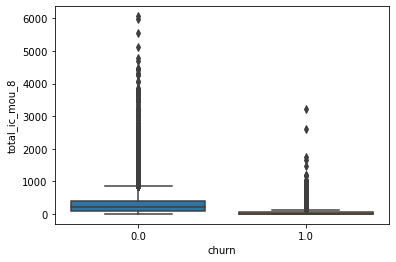

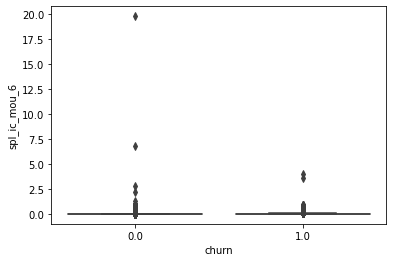

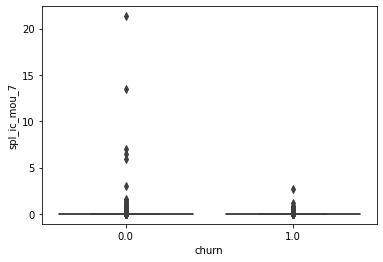

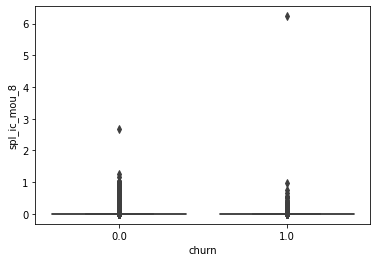

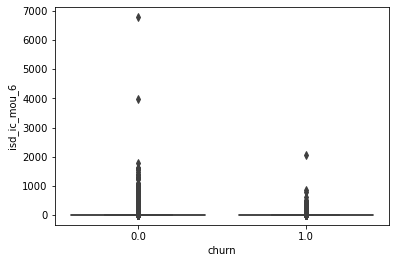

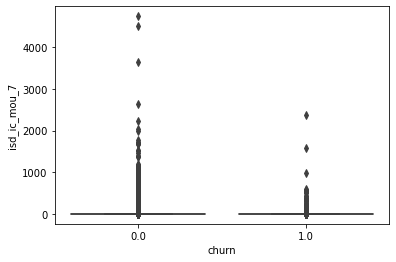

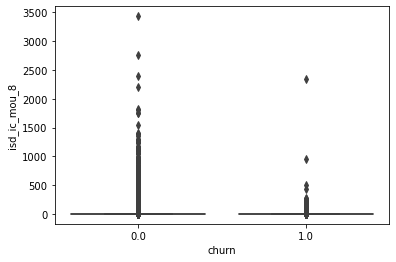

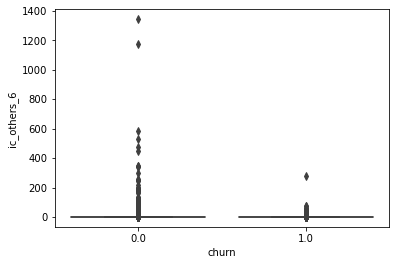

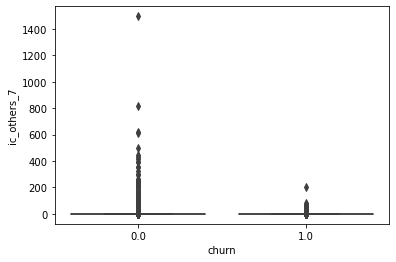

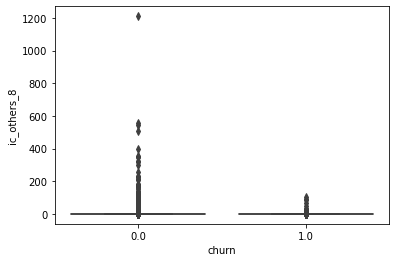

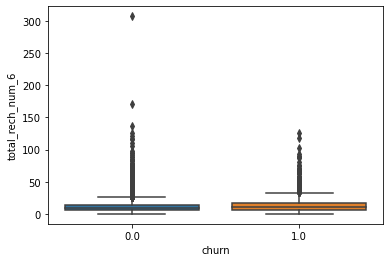

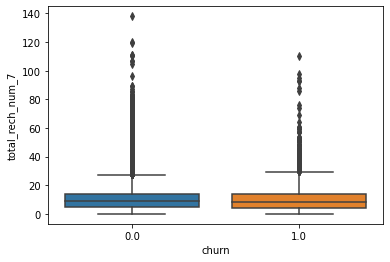

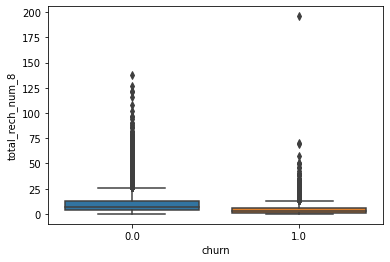

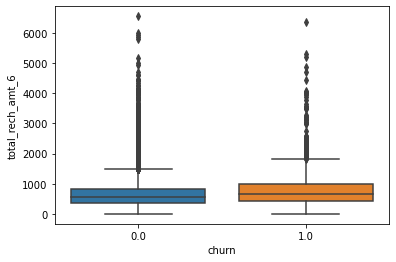

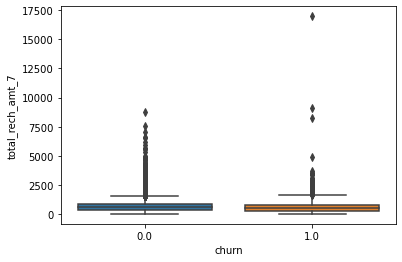

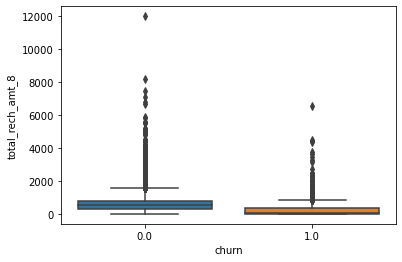

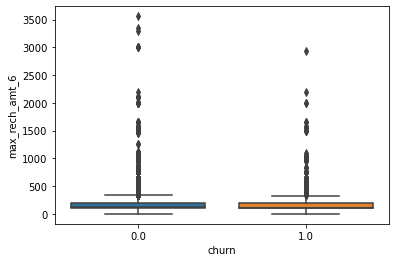

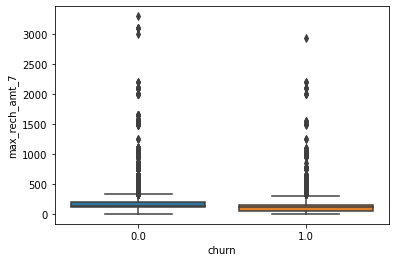

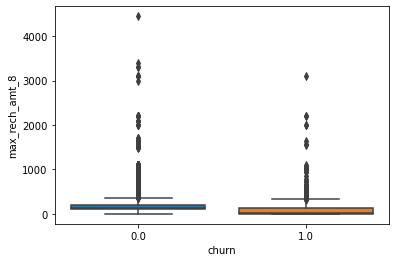

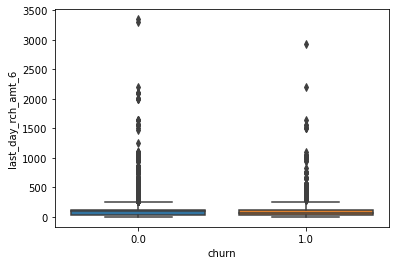

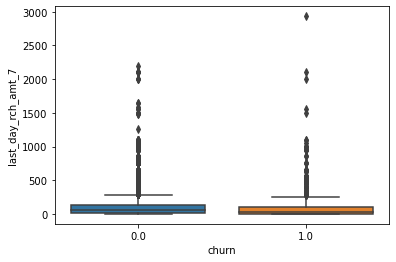

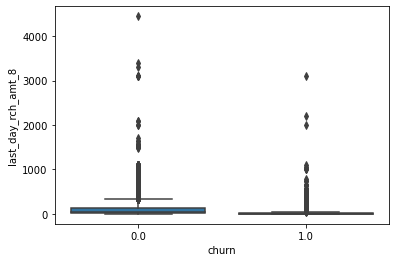

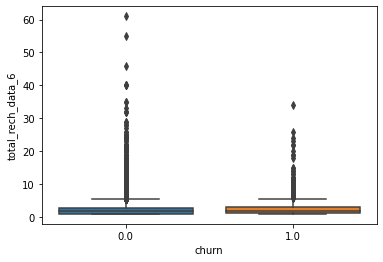

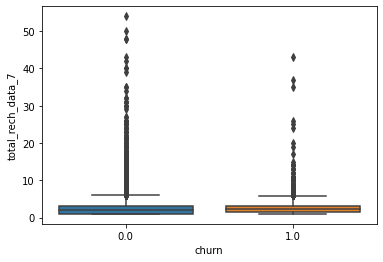

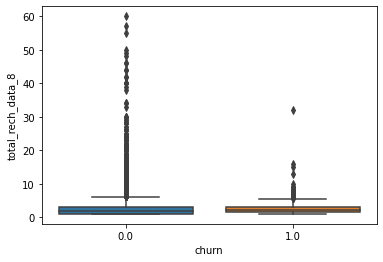

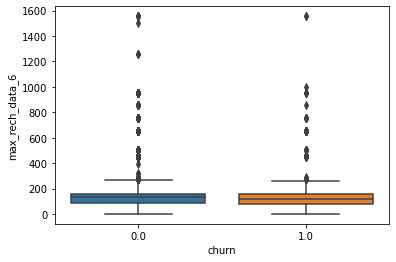

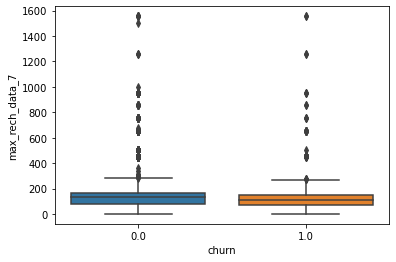

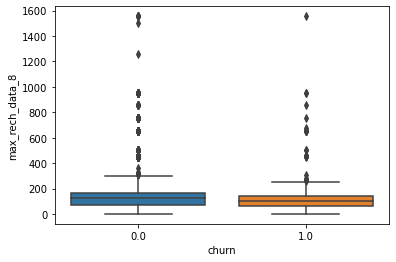

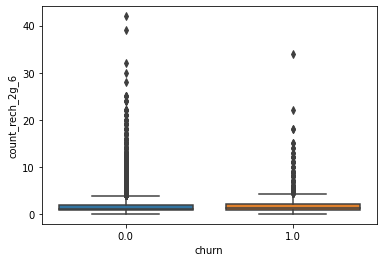

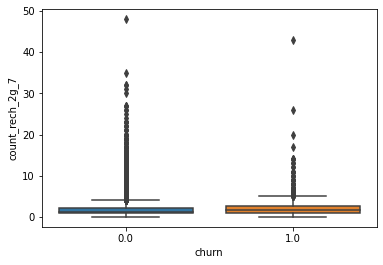

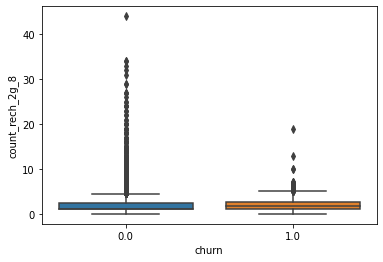

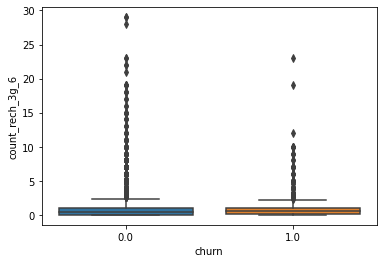

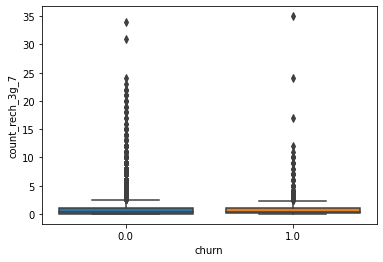

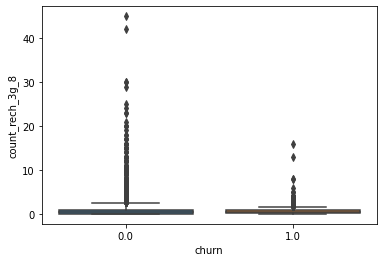

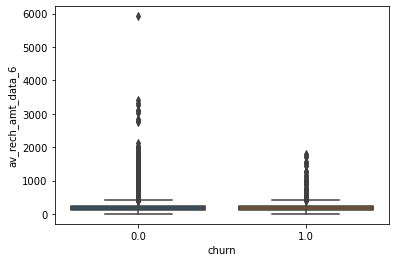

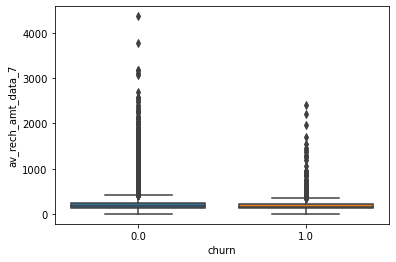

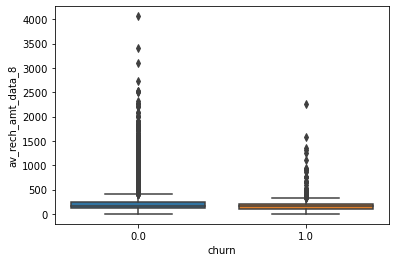

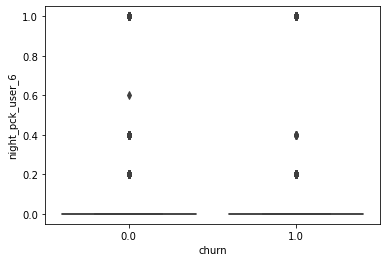

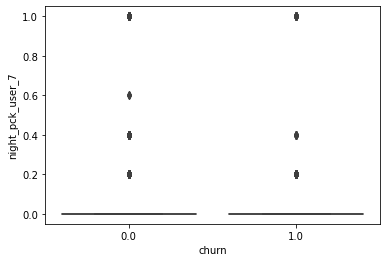

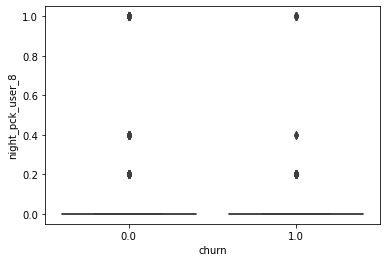

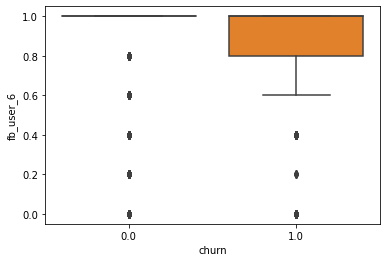

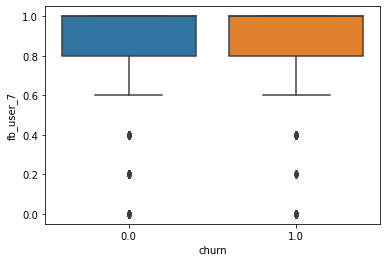

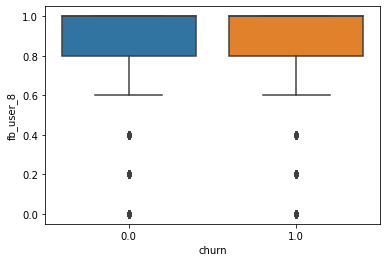

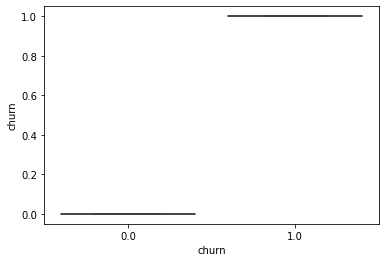

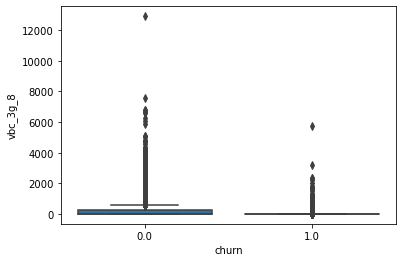

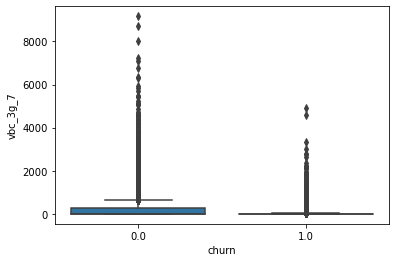

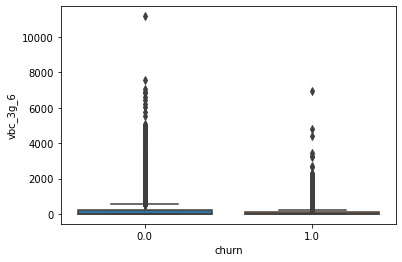

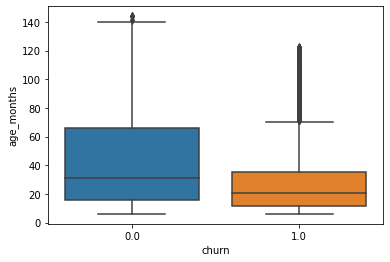

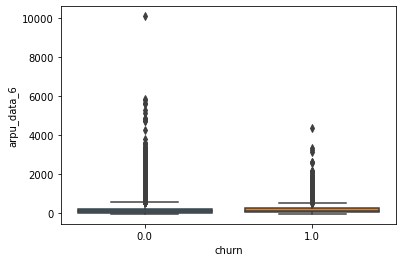

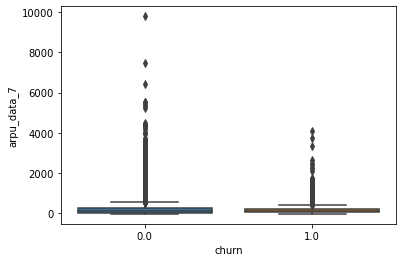

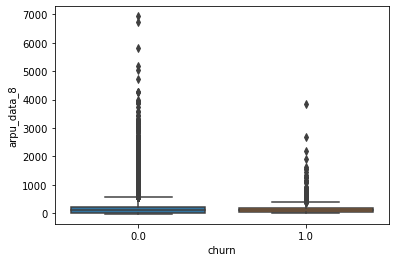

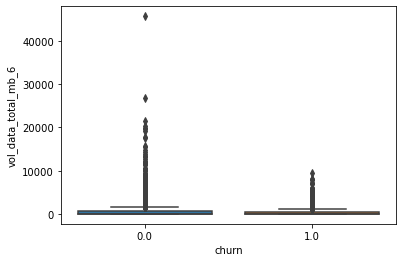

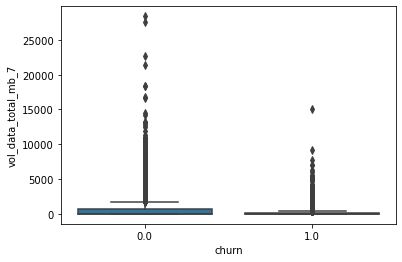

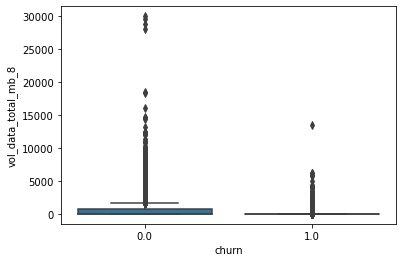

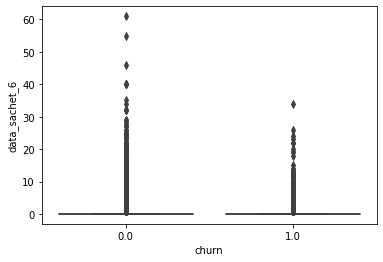

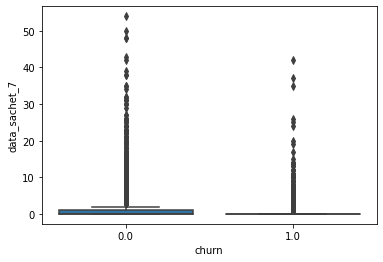

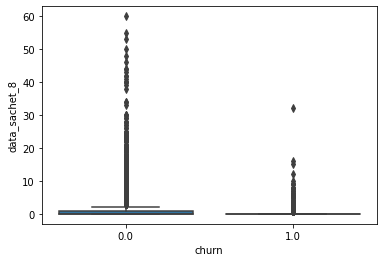

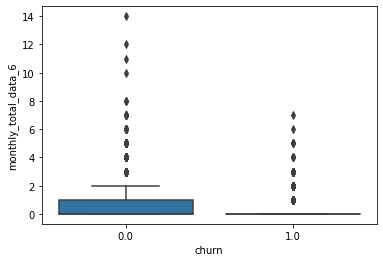

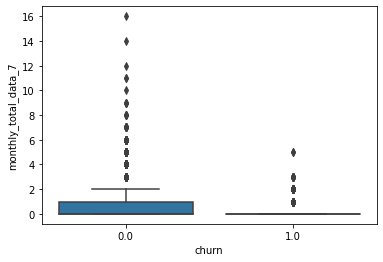

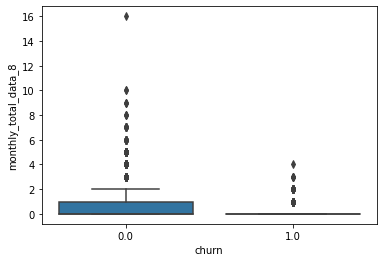

In [130]:
#plotting for EDA to check if previous inferences hold true still or not.

# they hold true ..


# the churning customers use less than the non churning customers. Also, in month 8th they use even lesser.

#we're right on track

for i in list(X_knn21.columns):
    sns.boxplot(x = X_knn21.churn, y = X_knn21[i])
    plt.show()

#Modeling 

In [131]:
#storing data in X variable

X = X_knn21.drop(['mobile_number', 'churn'],axis=1)

In [132]:
#storing target in y variable

y=X_knn21['churn']

In [133]:
#splitting te data into train test bags

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

In [134]:
#subsetting for if there might be any object columns to scale in teh next step

num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [135]:
#scaling the numeric columns

scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [136]:
#stats model 1 using all features

import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20779
Model:                            GLM   Df Residuals:                    20642
Model Family:                Binomial   Df Model:                          136
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3496.4
Date:                Tue, 03 May 2022   Deviance:                       6992.8
Time:                        18:11:12   Pearson chi2:                 4.37e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.0019      0.071    -56.440      0.000      -4.141      -3.863
arpu_6                   0.1814      0.095      1.905      0.057      -0.005       0.368
arpu_7                   0.1764      0.106      1.672      0.095      -0.030       0.383
arpu_8                   0.4058      0.154      2.643      0.008       0.105       0.707
onnet_mou_6             -2.3009      3.263     -0.705      0.481      -8.697       4.095
onnet_mou_7              2.5967      2.175      1.194      0.233      -1.666       6.860
onnet_mou_8             -1.8655      2.486     -0.750      0.453      -6.738       3.007
offnet_mou_6            -2.0871      3.380     -0.617      0.537      -8.713       4.539
offnet_mou_7             2.2080      2.247      0.982      0.326      -2.197       6.613
offnet_mou_8            -2.4651      2.644     -0.932      0.351      -7.647       2.716
roam_ic_mou_6            0.0593      0.034      1.724      0.085      -0.008       0.127
roam_ic_mou_7            0.0703      0.037      1.875      0.061      -0.003       0.144
roam_ic_mou_8           -0.0575      0.035     -1.626      0.104      -0.127       0.012
roam_og_mou_6            0.5624      0.850      0.662      0.508      -1.103       2.228
roam_og_mou_7           -0.3711      0.454     -0.817      0.414      -1.261       0.519
roam_og_mou_8            0.5755      0.604      0.953      0.340      -0.607       1.758
loc_og_t2t_mou_6      -205.3402   1331.267     -0.154      0.877   -2814.577    2403.896
loc_og_t2t_mou_7      -268.4986   1368.409     -0.196      0.844   -2950.530    2413.533
loc_og_t2t_mou_8      4383.1355   1467.860      2.986      0.003    1506.184    7260.088
loc_og_t2m_mou_6      -229.6925   1486.303     -0.155      0.877   -3142.793    2683.408
loc_og_t2m_mou_7      -281.7482   1437.222     -0.196      0.845   -3098.652    2535.156
loc_og_t2m_mou_8      4664.7892   1562.078      2.986      0.003    1603.173    7726.405
loc_og_t2f_mou_6       -21.0226    136.544     -0.154      0.878    -288.644     246.599
loc_og_t2f_mou_7       -26.1129    132.853     -0.197      0.844    -286.500     234.274
loc_og_t2f_mou_8       383.8204    128.565      2.985      0.003     131.837     635.804
loc_og_t2c_mou_6        -0.0510      0.038     -1.350      0.177      -0.125       0.023
loc_og_t2c_mou_7         0.0690      0.049      1.423      0.155      -0.026       0.164
loc_og_t2c_mou_8         0.0151      0.051      0.297      0.766      -0.084       0.114
loc_og_mou_6           348.3995   2236.883      0.156      0.876   -4035.810    4732.609
loc_og_mou_7           428.9113   2193.637      0.196      0.845   -3870.538    4728.361
loc_og_mou_8         -7141.8354   2392.433     -2.985      0.003   -1.18e+04   -2452.753
std_og_t2t_mou_6      3851.5900   2983.487      1.291    

#the above model desn't give many insights.

In [137]:
#running the LR model . model 2

from sklearn import metrics

logreg = LogisticRegression(class_weight= 'balanced')
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_train)
print("Recall: ", metrics.recall_score(y_train,y_pred))
print("Precision: ", metrics.precision_score(y_train,y_pred))
print("Confusion matrix :" , metrics.confusion_matrix(y_train, y_pred))
print("Accuracy Score : ", metrics.accuracy_score(y_train, y_pred))

Recall:  0.8396062536189924
Precision:  0.33044667274384687
Confusion matrix : [[16114  2938]
 [  277  1450]]
Accuracy Score :  0.8452764810626113


In [138]:
#creating data dictionary to store measurements of metric for each model

metrics_df = {}

In [139]:
#Model2 metrics will be stored in this

metrics_df['LR_Balanced_Train'] = []

In [140]:
#updating the LR_BALANCED for train data

metrics_df.update({'LR_Balanced_Train' : [0.845,0.839,0.330]})

In [141]:
#metrics for model 2 on test data

y_pred_test = logreg.predict(X_test)
print("Recall: ", metrics.recall_score(y_test,y_pred_test))
print("Precision: ", metrics.precision_score(y_test,y_pred_test))
print("Confusion matrix :" , metrics.confusion_matrix(y_test,y_pred_test))
print("Accuracy Score : ", metrics.accuracy_score(y_test,y_pred_test))

Recall:  0.556910569105691
Precision:  0.4957780458383595
Confusion matrix : [[7750  418]
 [ 327  411]]
Accuracy Score :  0.9163485290815181


In [142]:
#updating the lest data metrics

metrics_df.update({'LR_Balanced_Test':[0.916,0.5569, 0.4957]})

In [143]:
#RFE to subset the features to 30(randomly selected)

from sklearn.feature_selection import RFE
logreg = LogisticRegression(class_weight= 'balanced')


rfe = RFE(logreg, n_features_to_select=30, step=1)             
rfe = rfe.fit(X_train, y_train)

In [144]:
#checking the columns to be included in the next models

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 14),
 ('arpu_7', False, 56),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 19),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 13),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 20),
 ('roam_ic_mou_6', False, 36),
 ('roam_ic_mou_7', False, 72),
 ('roam_ic_mou_8', False, 93),
 ('roam_og_mou_6', False, 48),
 ('roam_og_mou_7', False, 23),
 ('roam_og_mou_8', False, 37),
 ('loc_og_t2t_mou_6', False, 39),
 ('loc_og_t2t_mou_7', False, 41),
 ('loc_og_t2t_mou_8', False, 80),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 24),
 ('loc_og_t2m_mou_8', False, 3),
 ('loc_og_t2f_mou_6', False, 40),
 ('loc_og_t2f_mou_7', False, 42),
 ('loc_og_t2f_mou_8', False, 55),
 ('loc_og_t2c_mou_6', False, 76),
 ('loc_og_t2c_mou_7', False, 110),
 ('loc_og_t2c_mou_8', False, 26),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', False, 38),
 ('loc_og_mou_8', False, 54),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_m

In [145]:
#subsetting the rfe supported columns

rfe_support_columns = X_train.columns[rfe.support_]
rfe_support_columns

Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'vbc_3g_8', 'vol_data_total_mb_7',
       'vol_data_total_mb_8', 'data_sachet_8', 'monthly_total_data_8'],
      dtype='object')

In [146]:
#30 we chose 30 it is and must be

print(len(rfe_support_columns))

30


In [147]:
#model3 general linear model stats model. perfoming well on p values

lg_model = sm.GLM(y_train,sm.add_constant(X_train[rfe_support_columns]), family = sm.families.Binomial())
r = lg_model.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20779
Model:                            GLM   Df Residuals:                    20748
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3647.0
Date:                Tue, 03 May 2022   Deviance:                       7294.1
Time:                        18:11:59   Pearson chi2:                 1.08e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.0047      0.070    -57.324      0.000      -4.142      -3.868
arpu_8                   0.3999      0.120      3.344      0.001       0.165       0.634
onnet_mou_7              0.8403      0.147      5.729      0.000       0.553       1.128
offnet_mou_6             0.5852      0.151      3.887      0.000       0.290       0.880
offnet_mou_7             0.5992      0.141      4.241      0.000       0.322       0.876
loc_og_t2m_mou_6        -0.5004      0.108     -4.623      0.000      -0.713      -0.288
loc_og_mou_6             0.4654      0.140      3.316      0.001       0.190       0.741
std_og_t2t_mou_6         0.4549      0.137      3.332      0.001       0.187       0.722
std_og_t2t_mou_7        -0.2901      0.132     -2.202      0.028      -0.548      -0.032
std_og_t2t_mou_8         0.6445      0.135      4.767      0.000       0.380       0.910
std_og_t2m_mou_8         0.4872      0.145      3.360      0.001       0.203       0.771
total_og_mou_6          -0.5960      0.215     -2.766      0.006      -1.018      -0.174
total_og_mou_7          -0.5424      0.196     -2.763      0.006      -0.927      -0.158
total_og_mou_8          -1.9006      0.223     -8.517      0.000      -2.338      -1.463
loc_ic_t2t_mou_8      6215.0895    884.458      7.027      0.000    4481.583    7948.596
loc_ic_t2m_mou_7         0.3422      0.075      4.561      0.000       0.195       0.489
loc_ic_t2m_mou_8      8451.7828   1202.920      7.026      0.000    6094.103    1.08e+04
loc_ic_t2f_mou_8      1834.2254    261.050      7.026      0.000    1322.577    2345.873
loc_ic_mou_8         -1.212e+04   1725.125     -7.024      0.000   -1.55e+04   -8736.827
std_ic_mou_8             2.1999      0.127     17.362      0.000       1.952       2.448
total_ic_mou_6           0.2687      0.051      5.226      0.000       0.168       0.369
total_ic_mou_8          -6.1582      0.271    -22.743      0.000      -6.689      -5.627
spl_ic_mou_8            -0.3368      0.060     -5.570      0.000      -0.455      -0.218
isd_ic_mou_8             1.2660      0.066     19.199      0.000       1.137       1.395
total_rech_amt_8        -0.3471      0.129     -2.689      0.007      -0.600      -0.094
last_day_rch_amt_8      -0.4523      0.067     -6.760      0.000      -0.583      -0.321
vbc_3g_8                -0.2609      0.083     -3.135      0.002      -0.424      -0.098
vol_data_total_mb_7      0.1635      0.049      3.355      0.001       0.068       0.259
vol_data_total_mb_8     -0.4180      0.125     -3.342      0.001      -0.663      -0.173
data_sachet_8           -0.4417      0.073     -6.025      0.000      -0.585      -0.298
monthly_total_data_8    -0.7413      0.095     -7.825      0.000      -0.927      -0.556
=========================================================

In [148]:
#importing VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
#checking VIF for 30 selected features

#it's very high so the model doesn't help much.

#lets proceed

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_columns].values, i) for i in range(X_train[rfe_support_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
17          loc_ic_mou_8  2.392493e+09
15      loc_ic_t2m_mou_8  1.163214e+09
13      loc_ic_t2t_mou_8  6.288595e+08
16      loc_ic_t2f_mou_8  5.477913e+07
20        total_ic_mou_8  8.604000e+01
10        total_og_mou_6  8.245000e+01
11        total_og_mou_7  6.034000e+01
2           offnet_mou_6  4.019000e+01
6       std_og_t2t_mou_6  3.374000e+01
3           offnet_mou_7  3.117000e+01
5           loc_og_mou_6  3.061000e+01
1            onnet_mou_7  2.954000e+01
4       loc_og_t2m_mou_6  1.504000e+01
18          std_ic_mou_8  1.468000e+01
7       std_og_t2t_mou_7  1.355000e+01
12        total_og_mou_8  1.301000e+01
23      total_rech_amt_8  1.019000e+01
0                 arpu_8  9.850000e+00
8       std_og_t2t_mou_8  6.830000e+00
9       std_og_t2m_mou_8  5.640000e+00
22          isd_ic_mou_8  4.740000e+00
14      loc_ic_t2m_mou_7  3.680000e+00
27   vol_data_total_mb_8  3.470000e+00
19        total_ic_mou_6  2.620000e+00
26   vol_data_total_mb_7  2.170000e+00
29  monthly_total_data_8  2.130000e+00
25              vbc_3g_8  1.640000e+00
24    last_day_rch_amt_8  1.420000e+00
28         data_sachet_8  1.200000e+00
21          spl_ic_mou_8  1.030000e+00

In [150]:
#finding optimal cut off

In [151]:
#model gauging finding optimal cuyt off probability

X_train_sm = sm.add_constant(X_train[rfe_support_columns])
y_train_pred = r.predict(X_train_sm)

In [152]:
y_train_pred.head(25)

23853    0.008240
27398    0.056407
14595    0.012549
4474     0.012124
21768    0.002575
24587    0.014249
4097     0.007094
16612    0.074755
1676     0.038033
28832    0.002397
16744    0.095472
19230    0.500301
11433    0.805656
21544    0.001096
13110    0.031638
15113    0.014435
28001    0.635962
3102     0.005643
22096    0.005642
14230    0.006726
11196    0.001191
17647    0.021242
17364    0.022208
9732     0.087373
10973    0.011451
dtype: float64

In [153]:
#creating dataframe from predicted data series

y_final_pred = pd.DataFrame({'index':y_train_pred.index, 'probability':y_train_pred.values})

In [154]:
#checking head of the dataframe created above

y_final_pred.head()

index  probability
0  23853     0.008240
1  27398     0.056407
2  14595     0.012549
3   4474     0.012124
4  21768     0.002575

In [155]:
#checking y 's head

y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

In [156]:
#checking y's head

y.shape

(29685,)

In [157]:
#checking y_train's shape

y_train.shape

(20779,)

In [158]:
#mapping probabailty above 0.5 to 1

y_final_pred['Predicted'] = y_final_pred.probability.map(lambda x: 1 if x > 0.50 else 0)

In [159]:
#checking the resultant dataframe

y_final_pred.head()

index  probability  Predicted
0  23853     0.008240          0
1  27398     0.056407          0
2  14595     0.012549          0
3   4474     0.012124          0
4  21768     0.002575          0

In [160]:
#changing index so as to enable merging later on

y_final_pred.set_index('index')

probability  Predicted
index                        
23853     0.008240          0
27398     0.056407          0
14595     0.012549          0
4474      0.012124          0
21768     0.002575          0
...            ...        ...
21814     0.546993          1
5452      0.373830          0
872       0.066983          0
15977     0.006021          0
23909     0.016477          0

[20779 rows x 2 columns]

In [161]:
#checking y_train's head

y_train.head()

23853    0.0
27398    0.0
14595    0.0
4474     0.0
21768    0.0
Name: churn, dtype: float64

In [162]:
#creating dataframe from y_train

y_train_actual = pd.DataFrame({'index':y_train.index, 'churn':y_train.values})

In [163]:
#cheecking head of y_train_actual

y_train_actual.head()

index  churn
0  23853    0.0
1  27398    0.0
2  14595    0.0
3   4474    0.0
4  21768    0.0

In [164]:
#changing index of it too

y_train_actual.set_index('index')

churn
index       
23853    0.0
27398    0.0
14595    0.0
4474     0.0
21768    0.0
...      ...
21814    1.0
5452     1.0
872      0.0
15977    0.0
23909    0.0

[20779 rows x 1 columns]

In [165]:
#df to be merged with y_train_actual

y_final_pred.shape

(20779, 3)

In [166]:
#merging the two to get a complete pciture

abc = pd.merge(y_final_pred,y_train, left_index=True, right_index=True)
abc.head()

index  probability  Predicted  churn
0  23853     0.008240          0    1.0
1  27398     0.056407          0    1.0
2  14595     0.012549          0    0.0
4  21768     0.002575          0    0.0
5  24587     0.014249          0    0.0

In [167]:
#checking new dataframes head

abc.head()

index  probability  Predicted  churn
0  23853     0.008240          0    1.0
1  27398     0.056407          0    1.0
2  14595     0.012549          0    0.0
4  21768     0.002575          0    0.0
5  24587     0.014249          0    0.0

In [168]:
#calculating metrics for the cut off = 0.5

print("Recall: ", metrics.recall_score(abc.churn, abc.Predicted))
print("Precision: ", metrics.precision_score(abc.churn, abc.Predicted))
print("Confusion matrix :" , metrics.confusion_matrix(abc.churn, abc.Predicted))
print("Accuracy Score glm with 0.5 cut off : ", metrics.accuracy_score(abc.churn, abc.Predicted))

Recall:  0.04060913705583756
Precision:  0.07933884297520662
Confusion matrix : [[12659   557]
 [ 1134    48]]
Accuracy Score glm with 0.5 cut off :  0.8825531323794972


In [169]:
#accuracy score also calculated above

print('Accuracy glm :', metrics.accuracy_score(abc.churn, abc.Predicted))

Accuracy glm : 0.8825531323794972


In [170]:
#updating the metrics dictionary 

metrics_df.update({'Generalised Model Train with 0.5 cutoff':[0.8825,0.04060,0.079338]})

In [171]:
#checking for different cut-off and gauging the performance of the model

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    abc[i]=abc.probability.map(lambda x: 1 if x > i else 0)
abc.head()

index  probability  Predicted  churn  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0  23853     0.008240          0    1.0    1    0    0    0    0    0    0   
1  27398     0.056407          0    1.0    1    0    0    0    0    0    0   
2  14595     0.012549          0    0.0    1    0    0    0    0    0    0   
4  21768     0.002575          0    0.0    1    0    0    0    0    0    0   
5  24587     0.014249          0    0.0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
4    0    0    0  
5    0    0    0

In [172]:
#creating a dataframe for different cut offs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

In [173]:
#looping over different cut-offs and storing later to be used to check the metrics if at all we will be using this model 

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(abc.churn, abc[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

In [174]:
#accuracy scores are good but sensitivity is not. we'll not use this mdoel

print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.1          0.1  0.753785     0.205584     0.802815
0.2          0.2  0.821850     0.119289     0.884685
0.3          0.3  0.850257     0.084602     0.918735
0.4          0.4  0.870676     0.060068     0.943175
0.5          0.5  0.882553     0.040609     0.957854
0.6          0.6  0.890401     0.028765     0.967464
0.7          0.7  0.898041     0.020305     0.976544
0.8          0.8  0.904014     0.013536     0.983656
0.9          0.9  0.910543     0.005922     0.991450


In [175]:
!pip install -U imbalanced-learn

In [176]:
#using smote technique to oversample and balance the imbalance 

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [177]:
#checeking shape after smote

X_train_smote.shape

(38104, 139)

In [178]:
#checking shape after smote
y_train_smote.shape

(38104,)

In [179]:
#checking for number of columns after smote. redundant step

len(X_train_smote.columns.to_list())

139

In [180]:
#model 4 with smote oversampling

logreg = LogisticRegression(class_weight= 'balanced')
logreg.fit(X_train_smote,y_train_smote)

y_pred = logreg.predict(X_train_smote)
print("Recall: ", metrics.recall_score(y_train_smote,y_pred))
print("Precision: ", metrics.precision_score(y_train_smote,y_pred))
print("Confusion matrix :" , metrics.confusion_matrix(y_train_smote, y_pred))
print("Accuracy Score : ", metrics.accuracy_score(y_train_smote, y_pred))

Recall:  0.8613793827419693
Precision:  0.8622845733501471
Confusion matrix : [[16431  2621]
 [ 2641 16411]]
Accuracy Score :  0.8619042620197355


In [181]:
#updating the metric dictionary

metrics_df.update({'LR_SMOTE_train_balancedLR' : [0.8619, 0.8613, 0.8622]})

In [182]:
#generalised model with rfe number used here is arrived at from PCA done in next steps

from sklearn.feature_selection import RFE
logreg = LogisticRegression(class_weight= 'balanced')


rfe = RFE(logreg, n_features_to_select=56, step=1)             
rfe = rfe.fit(X_train_smote,y_train_smote)

In [183]:
#checking the most useful columns

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 55),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 74),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', False, 11),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 44),
 ('roam_ic_mou_7', False, 18),
 ('roam_ic_mou_8', False, 49),
 ('roam_og_mou_6', False, 5),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 8),
 ('loc_og_t2t_mou_7', False, 76),
 ('loc_og_t2t_mou_8', False, 27),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 9),
 ('loc_og_t2f_mou_7', False, 42),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 26),
 ('loc_og_t2c_mou_7', False, 50),
 ('loc_og_t2c_mou_8', False, 12),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', False, 30),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 (

In [184]:
#subsetting the columns

rfe_support_columns = X_train.columns[rfe.support_]
rfe_support_columns

Index(['arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_mou_6', 'std_og_mou_8', 'og_others_6', 'total_og_mou_6',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_7', 'ic_others_8',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_3g_7', 'av_rech_amt_data_8', 'vbc_3g_8',
       'age_m

In [185]:
#subsetted the columns

len(rfe_support_columns)

56

In [186]:
#genral linear mdoel 5

lg_model = sm.GLM(y_train_smote,sm.add_constant(X_train_smote[rfe_support_columns]), family = sm.families.Binomial())
r = lg_model.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38104
Model:                            GLM   Df Residuals:                    38047
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12971.
Date:                Tue, 03 May 2022   Deviance:                       25942.
Time:                        18:13:15   Pearson chi2:                 4.66e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.9205      0.030    -65.077      0.000      -1.978      -1.863
arpu_7                   0.1740      0.060      2.920      0.004       0.057       0.291
arpu_8                   0.8658      0.079     10.946      0.000       0.711       1.021
onnet_mou_7              0.6224      0.095      6.519      0.000       0.435       0.810
onnet_mou_8              1.9652      0.580      3.390      0.001       0.829       3.101
offnet_mou_6             0.5504      0.111      4.977      0.000       0.334       0.767
offnet_mou_8             1.5283      0.583      2.621      0.009       0.385       2.671
roam_og_mou_7            0.1477      0.022      6.747      0.000       0.105       0.191
roam_og_mou_8           -0.4233      0.133     -3.186      0.001      -0.684      -0.163
loc_og_t2m_mou_6        -0.6182      0.077     -7.981      0.000      -0.770      -0.466
loc_og_t2m_mou_7         0.1738      0.051      3.435      0.001       0.075       0.273
loc_og_t2m_mou_8         0.4345      0.143      3.035      0.002       0.154       0.715
loc_og_t2f_mou_8        -0.2189      0.044     -4.955      0.000      -0.306      -0.132
loc_og_mou_6             0.8984      0.165      5.435      0.000       0.574       1.222
loc_og_mou_8            -0.2543      0.406     -0.627      0.531      -1.049       0.541
std_og_t2t_mou_6         0.4062      0.101      4.005      0.000       0.207       0.605
std_og_t2t_mou_7        -0.4740      0.089     -5.331      0.000      -0.648      -0.300
std_og_t2t_mou_8         1.4393      1.050      1.371      0.170      -0.618       3.497
std_og_t2m_mou_7         0.1980      0.038      5.163      0.000       0.123       0.273
std_og_t2m_mou_8         1.7177      1.091      1.575      0.115      -0.420       3.855
std_og_mou_6             0.7629      0.277      2.756      0.006       0.220       1.305
std_og_mou_8            -1.3859      1.700     -0.815      0.415      -4.719       1.947
og_others_6             -0.1447      0.031     -4.677      0.000      -0.205      -0.084
total_og_mou_6          -1.3346      0.293     -4.554      0.000      -1.909      -0.760
total_og_mou_8          -4.6526      0.464    -10.018      0.000      -5.563      -3.742
loc_ic_t2t_mou_8      6110.3414    442.277     13.816      0.000    5243.495    6977.188
loc_ic_t2m_mou_7         0.5621      0.050     11.308      0.000       0.465       0.659
loc_ic_t2m_mou_8      8309.4135    601.519     13.814      0.000    7130.458    9488.369
loc_ic_t2f_mou_8      1803.3820    130.536     13.815      0.000    1547.535    2059.229
loc_ic_mou_8         -1.191e+04    862.657    -13.809      0.000   -1.36e+04   -1.02e+04
std_ic_t2t_mou_7         0.1854      0.039      4.711      0.000       0.108       0.262
std_ic_t2t_mou_8         0.2199      0.244      0.901    

In [187]:
#oversamlpling the test data

smote = SMOTE(random_state=0)
X_test_smote,y_test_smote = smote.fit_resample(X_test,y_test)

In [188]:
#checking the x_test

X_test_smote.shape

(16336, 139)

In [189]:
#subsetting it to 56 columns/features

X_test_smote = X_test_smote[rfe_support_columns]

In [190]:
#checking is done correctly

X_test_smote.shape

(16336, 56)

In [191]:
#checking supported columns

X_test_smote.columns.to_list()

['arpu_7',
 'arpu_8',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_8',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_mou_6',
 'std_og_mou_8',
 'og_others_6',
 'total_og_mou_6',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_8',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'max_rech_data_8',
 'count_rech_3g_7',
 'av_rech_amt_data_8',
 'vbc_3g_8',
 'age_months',
 'arpu_data_8',
 'vol_data_total_mb_7',
 'vol_

In [192]:
#checking y_test_smote shaep

y_test_smote.shape

(16336,)

In [193]:
#model 6

logreg = LogisticRegression(class_weight= 'balanced')
logreg.fit(X_train_smote[rfe_support_columns],y_train_smote)

y_pred_RFE_smote = logreg.predict(X_test_smote)
print("Recall: ", metrics.recall_score(y_test_smote,y_pred_RFE_smote))
print("Precision: ", metrics.precision_score(y_test_smote,y_pred_RFE_smote))
print("Confusion matrix :" , metrics.confusion_matrix(y_test_smote,y_pred_RFE_smote))
print("Accuracy Score : ", metrics.accuracy_score(y_test_smote, y_pred_RFE_smote))

Recall:  0.6186336924583742
Precision:  0.9347021827598964
Confusion matrix : [[7815  353]
 [3115 5053]]
Accuracy Score :  0.7877081292850147


In [194]:
#updating the metric dictionary

metrics_df.update({'Test_LR_SMOTE_balanced':[0.7877,0.61863,0.9347]})

# PCA

In [195]:
#checking shapes

X_train.shape

(20779, 139)

In [196]:
#improting PCA creating an instance and fitting the model

from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [197]:
#checking the resulting components 

pca.components_

array([[ 1.21286851e-01,  1.31263877e-01,  1.17217792e-01, ...,
        -1.20987273e-01, -1.17877060e-01, -1.10665761e-01],
       [ 1.07034325e-01,  1.19182513e-01,  1.31234793e-01, ...,
         1.00071880e-01,  1.07363855e-01,  1.14386865e-01],
       [ 1.20931535e-01,  1.50459919e-01,  1.40777477e-01, ...,
         1.01469191e-01,  1.11812891e-01,  1.06430305e-01],
       ...,
       [ 1.50486063e-16,  9.28446254e-17,  1.02610038e-16, ...,
         6.16197979e-17, -9.77911450e-17,  3.17575530e-18],
       [-0.00000000e+00,  1.02125138e-16, -6.23859727e-17, ...,
        -1.79169726e-17,  1.78868542e-17, -6.50516750e-17],
       [ 0.00000000e+00,  1.55924191e-17, -3.12632828e-17, ...,
         6.05732965e-17, -1.10205207e-16,  1.33170675e-17]])

In [198]:
#checking variance explained cumulatively

var_cumu = np.cumsum(pca.explained_variance_ratio_)

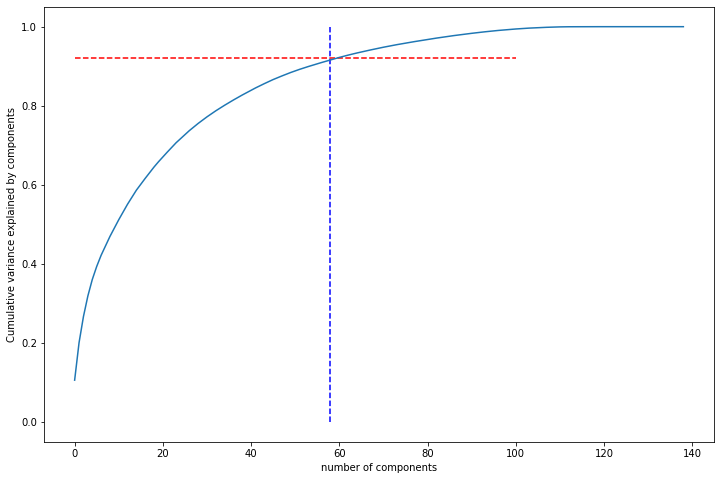

In [199]:
#plotting the variance explained and arriving at the figure of 56 features we used in creating teh above model

fig = plt.figure(figsize=[12,8])
plt.vlines(x=58, ymax=1, ymin=0, colors="b", linestyles="--")
plt.hlines(y=0.92, xmax=100, xmin=0, colors="r", linestyles="--")
plt.plot(var_cumu)
plt.xlabel("number of components")
plt.ylabel("Cumulative variance explained by components")
plt.show()

In [200]:
#using 56 features as it'll expain about 92-94 % variance

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=56)

In [201]:
#fitting the model

train_pca = pca_final.fit_transform(X_train)

In [202]:
#checking shape it's 56 so correclty operated

train_pca.shape

(20779, 56)

In [203]:
#creating correlation matrix to be used for heatmap in the next step

corrmat = np.corrcoef(train_pca.transpose())

<AxesSubplot:>

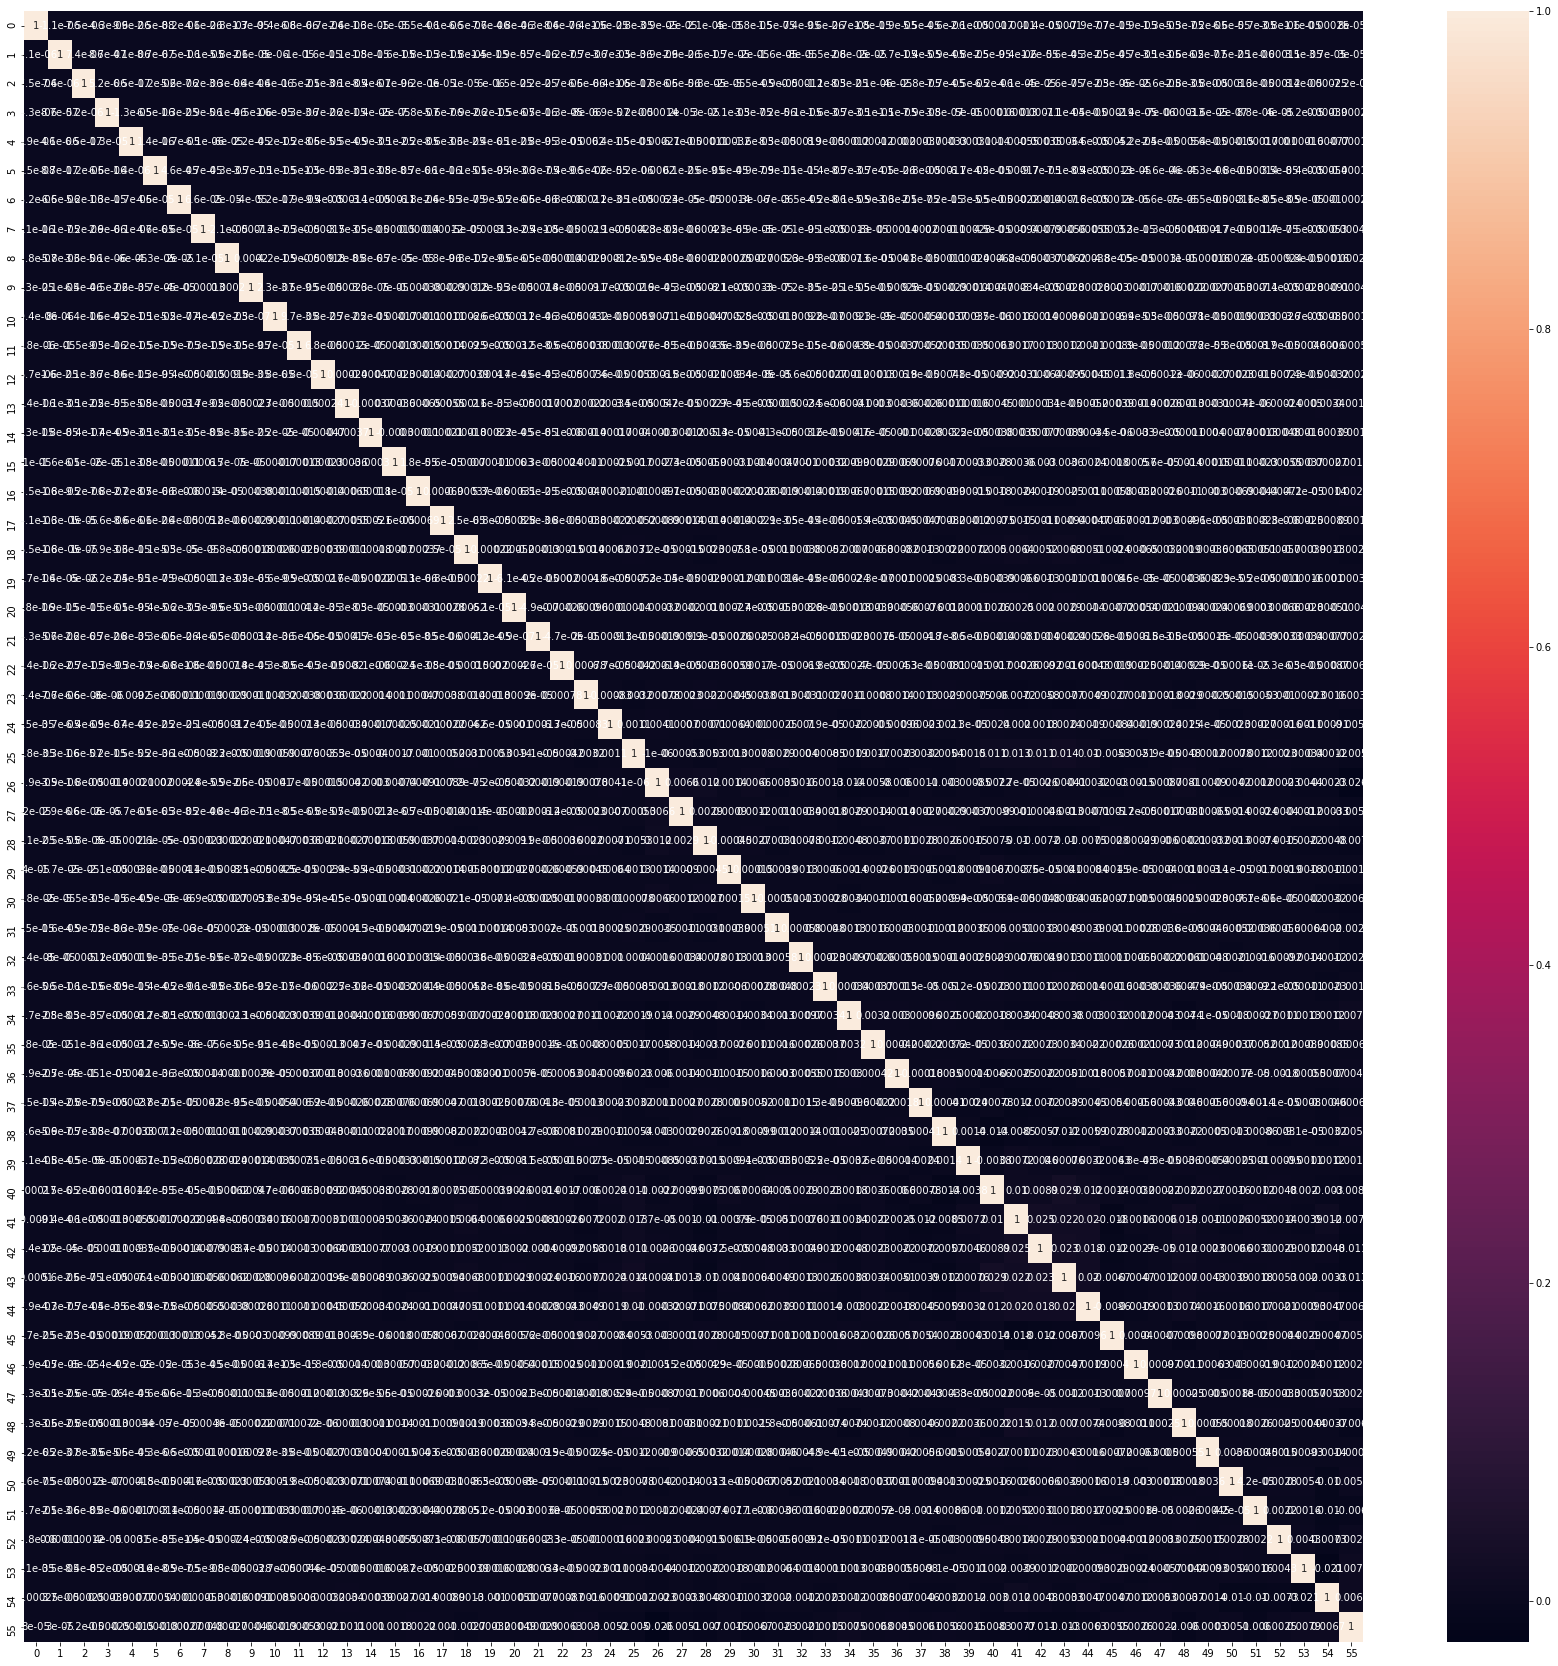

In [204]:
#plotting heatmap and we find correlations are indeed low

plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)

In [205]:
#transforming the X_test 

test_pca = pca_final.transform(X_test)
test_pca.shape

(8906, 56)

In [206]:
#mdoel 7 logistic regression on top of PCA

classifier = LogisticRegression(random_state = 42)

#fitting the model
classifier.fit(train_pca, y_train)

LogisticRegression(random_state=42)

In [207]:
#predicting teh test values

y_pred_pca_lr = classifier.predict(test_pca)

In [208]:
#checking metrics of the model

print("Recall: ", metrics.recall_score(y_test,y_pred_pca_lr))
print("Precision: ", metrics.precision_score(y_test,y_pred_pca_lr))
print("Confusion matrix :" , metrics.confusion_matrix(y_test,y_pred_pca_lr))
print("Accuracy Score : ", metrics.accuracy_score(y_test, y_pred_pca_lr))

Recall:  0.6869918699186992
Precision:  0.42039800995024873
Confusion matrix : [[7469  699]
 [ 231  507]]
Accuracy Score :  0.8955760161688749


In [209]:
#updating the metrics dictionary

metrics_df.update({'PCA_TEST_LR':[0.89557, 0.68699,0.42039]})

# Decision Tree model

In [210]:
#splitting the data again to avoid any overlaps

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [211]:
#checking hspaes of train and test features

X_train.shape, X_test.shape

((20779, 139), (8906, 139))

In [212]:
#impotring Decisiontreeclassifier

from sklearn.tree import DecisionTreeClassifier

In [213]:
#creating an instance

dt = DecisionTreeClassifier(random_state=42, max_depth=5)

In [214]:
#fitting the model 8

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [215]:
#predicting train and test tragets

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [216]:
#checking metrics of the decision tree classifier model for train data

print("Recall: ", metrics.recall_score(y_train,y_train_pred))
print("Precision: ", metrics.precision_score(y_train,y_train_pred))
print("Confusion matrix :" , metrics.confusion_matrix(y_train,y_train_pred))
print("Accuracy Score : ", metrics.accuracy_score(y_train,y_train_pred))

Recall:  0.5245522819179665
Precision:  0.7579298831385642
Confusion matrix : [[18758   290]
 [  823   908]]
Accuracy Score :  0.94643630588575


In [217]:
#updating the metrics dictionary

metrics_df.update({'DT_train':[0.9464,0.52455,0.757929]})

In [218]:
#checking metrics of the decision tree classifier model for test data

print("Recall: ", metrics.recall_score(y_test,y_test_pred))
print("Precision: ", metrics.precision_score(y_test,y_test_pred))
print("Confusion matrix :" , metrics.confusion_matrix(y_test,y_test_pred))
print("Accuracy Score : ", metrics.accuracy_score(y_test,y_test_pred))

Recall:  0.49591280653950953
Precision:  0.7398373983739838
Confusion matrix : [[8044  128]
 [ 370  364]]
Accuracy Score :  0.9440826409162363


In [219]:
#updating test data metrics

metrics_df.update({'DT_test':[ 0.94408, 0.4959,0.73983]})

In [220]:
#importin the classification report feature to ease the study of model evaluation metrics

from sklearn.metrics import classification_report

In [221]:
#printing test classification report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      8172
         1.0       0.74      0.50      0.59       734

    accuracy                           0.94      8906
   macro avg       0.85      0.74      0.78      8906
weighted avg       0.94      0.94      0.94      8906



In [222]:
#importing roc_curve rathe than doing ti manually

from sklearn.metrics import plot_roc_curve

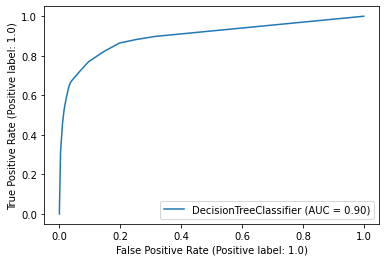

In [223]:
#plotting the roc curve

plot_roc_curve(dt, X_train, y_train, drop_intermediate=False)
plt.show()

# Gridsearch on top of decision tree classifier

In [224]:
#importing gridsearch

from sklearn.model_selection import GridSearchCV

In [225]:
#model 9 creating the instance

dt1 = DecisionTreeClassifier(random_state=42)

In [226]:
#prams dictionary to be fed to the grid search model

params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [227]:
#instanciating the gridsearch

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [228]:
#fitting the model

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [229]:
#best accuracy

grid_search.best_score_

0.9412386043272704

In [230]:
#best estimator from grid search

best_dt = grid_search.best_estimator_
best_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

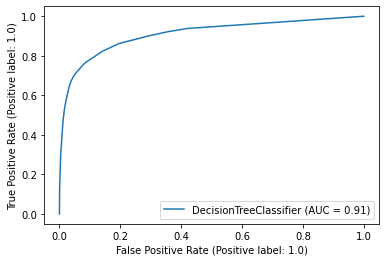

In [231]:
#marginally better than previous model

plot_roc_curve(best_dt, X_train, y_train)
plt.show()

In [232]:
#predicting on test dtaframe only

y_test_pred_dt = grid_search.predict(X_test)

In [233]:
#test metrics for DTC fro grid search

print("Recall: ", metrics.recall_score(y_test,y_test_pred_dt))
print("Precision: ", metrics.precision_score(y_test,y_test_pred_dt))
print("Confusion matrix :" , metrics.confusion_matrix(y_test,y_test_pred_dt))
print("Accuracy Score : ", metrics.accuracy_score(y_test, y_test_pred_dt))

Recall:  0.5177111716621253
Precision:  0.7569721115537849
Confusion matrix : [[8050  122]
 [ 354  380]]
Accuracy Score :  0.946552885695037


In [234]:
#updating the dictionary of metrics

metrics_df.update({'GRID_DT_TEST':[ 0.94655,0.51771, 0.756972]})

# Random Forest

In [235]:
#instanciating the rf model 10

rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [236]:
%%time
rf.fit(X_train, y_train)
#fitting teh model

Wall time: 357 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [237]:
#out of bag score is decent

rf.oob_score_

0.9231916839116415

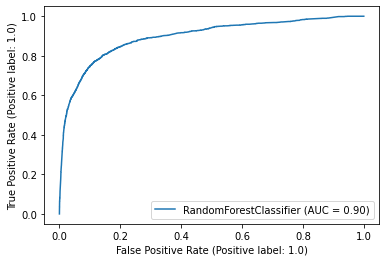

In [238]:
#auc is almost same lets later chekc for otehr metrcis

plot_roc_curve(rf, X_train, y_train)
plt.show()

In [239]:
#finding the nest model instanciating teh rf model 11

rf1 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [240]:
#params grid

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [241]:
#grid search instanciated

grid_search = GridSearchCV(estimator=rf1,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [242]:
%%time
grid_search.fit(X_train, y_train)

#fitting the model

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 9min 9s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [243]:
#better best score 

grid_search.best_score_

0.9422011979469908

In [244]:
#best estimator to be sued when we use startified cross validation later

best_rf = grid_search.best_estimator_
best_rf

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [245]:
#predicting the test values

y_test_pred_rf = grid_search.predict(X_test)

In [246]:
#metrics for test set

print("Recall: ", metrics.recall_score(y_test,y_test_pred_rf))
print("Precision: ", metrics.precision_score(y_test,y_test_pred_rf))
print("Confusion matrix :" , metrics.confusion_matrix(y_test,y_test_pred_rf))
print("Accuracy Score : ", metrics.accuracy_score(y_test, y_test_pred_rf))

Recall:  0.47411444141689374
Precision:  0.8
Confusion matrix : [[8085   87]
 [ 386  348]]
Accuracy Score :  0.9468897372557826


In [247]:
#updating teh metrics dictionary

metrics_df.update({'RF_TEST_GRID_SEARCH':[ 0.946889,0.47411, 0.8]})

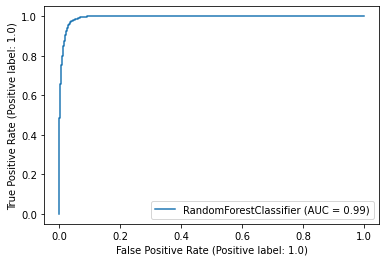

In [248]:
#way better than decision tree and rf wihtout grid search

plot_roc_curve(best_rf, X_train, y_train)
plt.show()

In [249]:
#featrue importances

best_rf.feature_importances_

array([6.06924116e-03, 8.17150051e-03, 5.38518846e-02, 5.14563009e-03,
       5.85633501e-03, 5.97638111e-03, 5.50308569e-03, 6.11011981e-03,
       8.68750882e-03, 2.05198387e-03, 4.52270779e-03, 3.39627610e-02,
       2.23617807e-03, 6.44373877e-03, 2.60392513e-02, 5.26942517e-03,
       5.21379555e-03, 7.51646869e-03, 3.73547160e-03, 4.86990593e-03,
       1.14514606e-02, 2.39875896e-03, 2.54085607e-03, 3.68773010e-03,
       1.29302793e-03, 2.21708503e-03, 5.03528760e-03, 4.84767810e-03,
       6.04059953e-03, 1.59754483e-02, 4.82013008e-03, 4.51384921e-03,
       4.95897336e-03, 4.63298459e-03, 4.72212089e-03, 6.27533453e-03,
       4.75014027e-04, 4.60640643e-04, 5.48131038e-04, 5.46644105e-03,
       6.27542563e-03, 6.09675926e-03, 1.09609083e-03, 9.74548538e-04,
       8.25191039e-04, 2.81207757e-03, 3.99415802e-03, 5.11186531e-03,
       2.15770763e-03, 5.68238692e-06, 3.13643468e-06, 4.63574260e-03,
       8.09889186e-03, 5.85666116e-02, 3.94758004e-03, 4.60493606e-03,
      

In [250]:
#creating a dataframe of feature sand their weights 

predictor_importance = pd.DataFrame({
    "Predictor Name": X_train.columns,
    "Importance": best_rf.feature_importances_
})

In [251]:
#sorting base dupon the vlaues in the imporatnces

predictor_importance.sort_values(by="Importance", ascending=False)

Predictor Name  Importance
80         total_ic_mou_8    0.117659
53         total_og_mou_8    0.058567
95       total_rech_amt_8    0.056567
2                  arpu_8    0.053852
11          roam_ic_mou_8    0.033963
98         max_rech_amt_8    0.032493
14          roam_og_mou_8    0.026039
92       total_rech_num_8    0.021713
101    last_day_rch_amt_8    0.021252
59       loc_ic_t2m_mou_8    0.019312
65           loc_ic_mou_8    0.018228
132   vol_data_total_mb_8    0.016175
29           loc_og_mou_8    0.015975
20       loc_og_t2m_mou_8    0.011451
79         total_ic_mou_7    0.011048
56       loc_ic_t2t_mou_8    0.009568
8            offnet_mou_8    0.008688
94       total_rech_amt_7    0.008676
91       total_rech_num_7    0.008513
78         total_ic_mou_6    0.008258
1                  arpu_7    0.008172
52         total_og_mou_7    0.008099
77           std_ic_mou_8    0.007620
17       loc_og_t2t_mou_8    0.007516
131   vol_data_total_mb_7    0.007361
93       total_rech_amt_6    0.006894
128           arpu_data_7    0.006832
106       max_rech_data_7    0.006810
129           arpu_data_8    0.006587
64           loc_ic_mou_7    0.006585
126            age_months    0.006577
58       loc_ic_t2m_mou_7    0.006538
13          roam_og_mou_7    0.006444
90       total_rech_num_6    0.006339
40           std_og_mou_7    0.006275
35       std_og_t2m_mou_8    0.006275
7            offnet_mou_7    0.006110
41           std_og_mou_8    0.006097
0                  arpu_6    0.006069
97         max_rech_amt_7    0.006049
28           loc_og_mou_7    0.006041
5             onnet_mou_8    0.005976
115    av_rech_amt_data_7    0.005884
4             onnet_mou_7    0.005856
6            offnet_mou_6    0.005503
39           std_og_mou_6    0.005466
71       std_ic_t2m_mou_8    0.005458
57       loc_ic_t2m_mou_6    0.005312
15       loc_og_t2t_mou_6    0.005269
105       max_rech_data_6    0.005234
16       loc_og_t2t_mou_7    0.005214
75           std_ic_mou_6    0.005175
3             onnet_mou_6    0.005146
47           spl_og_mou_8    0.005112
116    av_rech_amt_data_8    0.005089
26       loc_og_t2c_mou_8    0.005035
32       std_og_t2t_mou_8    0.004959
63           loc_ic_mou_6    0.004913
19       loc_og_t2m_mou_7    0.004870
107       max_rech_data_8    0.004862
27           loc_og_mou_6    0.004848
123              vbc_3g_8    0.004832
30       std_og_t2t_mou_6    0.004820
76           std_ic_mou_7    0.004756
34       std_og_t2m_mou_7    0.004722
51         total_og_mou_6    0.004636
33       std_og_t2m_mou_6    0.004633
55       loc_ic_t2t_mou_7    0.004605
10          roam_ic_mou_7    0.004523
31       std_og_t2t_mou_7    0.004514
127           arpu_data_6    0.004483
62       loc_ic_t2f_mou_8    0.004472
60       loc_ic_t2f_mou_6    0.004468
110       count_rech_2g_8    0.004384
104     total_rech_data_8    0.004234
114    av_rech_amt_data_6    0.004228
69       std_ic_t2m_mou_6    0.004149
103     total_rech_data_7    0.004118
46           spl_og_mou_7    0.003994
54       loc_ic_t2t_mou_6    0.003948
100    last_day_rch_amt_7    0.003901
68       std_ic_t2t_mou_8    0.003872
70       std_ic_t2m_mou_7    0.003853
18       loc_og_t2m_mou_6    0.003735
102     total_rech_data_6    0.003690
23       loc_og_t2f_mou_8    0.003688
108       count_rech_2g_6    0.003671
61       loc_ic_t2f_mou_7    0.003543
67       std_ic_t2t_mou_7    0.003498
66       std_ic_t2t_mou_6    0.003478
125              vbc_3g_6    0.003245
109       count_rech_2g_7    0.003230
124              vbc_3g_7    0.003198
130   vol_data_total_mb_6    0.002994
96         max_rech_amt_6    0.002979
99     last_day_rch_amt_6    0.002874
45           spl_og_mou_6    0.002812
22       loc_og_t2f_mou_7    0.002541
21       loc_og_t2f_mou_6    0.002399
113       count_rech_3g_8    0.002394
85           isd_ic_mou_7    0.002280
111       count_rech_3g_6    0.002261
112       count_rech_3g_7    0.002242
12          roam_og_mou_6    0.002236
25       loc_og_t2c_m

In [252]:
from numpy import mean

#importing mean

In [253]:
#importing cross validatin score and stratified k folds to be sued in our last model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [254]:
#here we're using the best estimator from above grid search fitting it using the cross valdiation and class balanced also

rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
#metrics evaluation
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.923


In [255]:
#fitting the model

rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [256]:
#predicting the test values

y_stratified_rf = rfc.predict(X_test)

In [257]:
#gauging the metrics on only test set

print("Recall: ", metrics.recall_score(y_test,y_stratified_rf))
print("Precision: ", metrics.precision_score(y_test,y_stratified_rf))
print("Confusion matrix :" , metrics.confusion_matrix(y_test,y_stratified_rf))
print("Accuracy Score : ", metrics.accuracy_score(y_test, y_stratified_rf))

Recall:  0.6185286103542235
Precision:  0.6878787878787879
Confusion matrix : [[7966  206]
 [ 280  454]]
Accuracy Score :  0.9454300471592185


In [258]:
#updating the metrics dictionary

metrics_df.update({"RF_STARTIFIED_TEST":[ 0.94543,0.618528, 0.687878]})

In [259]:
#feature importances

rfc.feature_importances_

array([5.18926303e-03, 9.76752989e-03, 5.36453516e-02, 4.13688461e-03,
       4.78341669e-03, 5.16979141e-03, 5.24016711e-03, 4.92029699e-03,
       9.17124526e-03, 1.81997761e-03, 2.28329224e-03, 5.70641532e-02,
       1.57696691e-03, 5.24359043e-03, 5.06460210e-02, 3.97063900e-03,
       5.67738077e-03, 5.60719409e-03, 4.51716541e-03, 5.46637521e-03,
       1.26928241e-02, 1.89250576e-03, 2.95281761e-03, 6.89177281e-03,
       1.38987199e-03, 1.99744352e-03, 1.83983134e-03, 4.05524464e-03,
       4.67059125e-03, 2.04314032e-02, 3.11121987e-03, 3.31997450e-03,
       3.13766593e-03, 3.64085504e-03, 4.81783235e-03, 4.08135259e-03,
       8.14032885e-04, 7.32226160e-04, 1.00193681e-03, 4.70434212e-03,
       6.59792201e-03, 5.12191320e-03, 1.40316574e-03, 1.31655272e-03,
       8.31690062e-04, 3.40172440e-03, 4.31114650e-03, 4.17959688e-03,
       1.16306197e-03, 1.43747399e-05, 4.27291431e-05, 6.06683736e-03,
       8.87334985e-03, 6.93780537e-02, 4.08494431e-03, 5.07778932e-03,
      

In [260]:
#creating teh dataframe of features and their importances

predictor_importance_final = pd.DataFrame({
    "Predictor Name Best RF": X_train.columns,
    "Importance of Predictor": rfc.feature_importances_
})

In [261]:
#sorting the vleus based on importances

predictor_importance_final.sort_values(by="Importance of Predictor", ascending=False)

Predictor Name Best RF  Importance of Predictor
80          total_ic_mou_8                 0.084394
53          total_og_mou_8                 0.069378
11           roam_ic_mou_8                 0.057064
2                   arpu_8                 0.053645
14           roam_og_mou_8                 0.050646
95        total_rech_amt_8                 0.041057
101     last_day_rch_amt_8                 0.039093
98          max_rech_amt_8                 0.029441
132    vol_data_total_mb_8                 0.027501
65            loc_ic_mou_8                 0.021620
29            loc_og_mou_8                 0.020431
59        loc_ic_t2m_mou_8                 0.018813
92        total_rech_num_8                 0.014774
56        loc_ic_t2t_mou_8                 0.013461
79          total_ic_mou_7                 0.013429
20        loc_og_t2m_mou_8                 0.012693
1                   arpu_7                 0.009768
123               vbc_3g_8                 0.009533
8             offnet_mou_8                 0.009171
52          total_og_mou_7                 0.008873
78          total_ic_mou_6                 0.008303
58        loc_ic_t2m_mou_7                 0.007436
94        total_rech_amt_7                 0.007172
126             age_months                 0.007158
138   monthly_total_data_8                 0.007043
23        loc_og_t2f_mou_8                 0.006892
40            std_og_mou_7                 0.006598
62        loc_ic_t2f_mou_8                 0.006471
64            loc_ic_mou_7                 0.006414
51          total_og_mou_6                 0.006067
97          max_rech_amt_7                 0.005996
77            std_ic_mou_8                 0.005915
16        loc_og_t2t_mou_7                 0.005677
17        loc_og_t2t_mou_8                 0.005607
91        total_rech_num_7                 0.005578
71        std_ic_t2m_mou_8                 0.005562
19        loc_og_t2m_mou_7                 0.005466
63            loc_ic_mou_6                 0.005310
13           roam_og_mou_7                 0.005244
6             offnet_mou_6                 0.005240
57        loc_ic_t2m_mou_6                 0.005225
0                   arpu_6                 0.005189
5              onnet_mou_8                 0.005170
41            std_og_mou_8                 0.005122
55        loc_ic_t2t_mou_7                 0.005078
106        max_rech_data_7                 0.005078
7             offnet_mou_7                 0.004920
34        std_og_t2m_mou_7                 0.004818
129            arpu_data_8                 0.004787
4              onnet_mou_7                 0.004783
39            std_og_mou_6                 0.004704
93        total_rech_amt_6                 0.004690
107        max_rech_data_8                 0.004674
28            loc_og_mou_7                 0.004671
116     av_rech_amt_data_8                 0.004651
115     av_rech_amt_data_7                 0.004600
131    vol_data_total_mb_7                 0.004553
128            arpu_data_7                 0.004534
18        loc_og_t2m_mou_6                 0.004517
127            arpu_data_6                 0.004341
46            spl_og_mou_7                 0.004311
47            spl_og_mou_8                 0.004180
105        max_rech_data_6                 0.004154
90        total_rech_num_6                 0.004141
3              onnet_mou_6                 0.004137
54        loc_ic_t2t_mou_6                 0.004085
35        std_og_t2m_mou_8                 0.004081
27            loc_og_mou_6                 0.004055
60        loc_ic_t2f_mou_6                 0.003991
15        loc_og_t2t_mou_6                 0.003971
114     av_rech_amt_data_6                 0.003812
76            std_ic_mou_7                 0.003679
33        std_og_t2m_mou_6                 0.003641
75            std_ic_mou_6                 0.003531
45            spl_og_mou_6                 0.003402
31        std_og_t2t_mou_7                 0.003320


In [262]:
#checking updated dictinary containing the metrics of accuracy, recall and precision for all the model

#especially for test sets

metrics_df

{'LR_Balanced_Train': [0.845, 0.839, 0.33],
 'LR_Balanced_Test': [0.916, 0.5569, 0.4957],
 'Generalised Model Train with 0.5 cutoff': [0.8825, 0.0406, 0.079338],
 'LR_SMOTE_train_balancedLR': [0.8619, 0.8613, 0.8622],
 'Test_LR_SMOTE_balanced': [0.7877, 0.61863, 0.9347],
 'PCA_TEST_LR': [0.89557, 0.68699, 0.42039],
 'DT_train': [0.9464, 0.52455, 0.757929],
 'DT_test': [0.94408, 0.4959, 0.73983],
 'GRID_DT_TEST': [0.94655, 0.51771, 0.756972],
 'RF_TEST_GRID_SEARCH': [0.946889, 0.47411, 0.8],
 'RF_STARTIFIED_TEST': [0.94543, 0.618528, 0.687878]}

In [263]:
#creating dataframe from dictrionary

metric_df = pd.DataFrame(metrics_df)

In [264]:
#printing the dataframe

metric_df

LR_Balanced_Train  LR_Balanced_Test  \
0              0.845            0.9160   
1              0.839            0.5569   
2              0.330            0.4957   

   Generalised Model Train with 0.5 cutoff  LR_SMOTE_train_balancedLR  \
0                                 0.882500                     0.8619   
1                                 0.040600                     0.8613   
2                                 0.079338                     0.8622   

   Test_LR_SMOTE_balanced  PCA_TEST_LR  DT_train  DT_test  GRID_DT_TEST  \
0                 0.78770      0.89557  0.946400  0.94408      0.946550   
1                 0.61863      0.68699  0.524550  0.49590      0.517710   
2                 0.93470      0.42039  0.757929  0.73983      0.756972   

   RF_TEST_GRID_SEARCH  RF_STARTIFIED_TEST  
0             0.946889            0.945430  
1             0.474110            0.618528  
2             0.800000            0.687878

In [265]:
#transposing the dtaframe for readability

df_of_metrics = pd.DataFrame(metric_df).T

In [266]:
#fixing the column names respectively

df_of_metrics.columns = ['Accuracy', 'Recall', 'Precision']

In [267]:
df_of_metrics

#final dataframe of various metrics for almost all the promising models

Accuracy    Recall  Precision
LR_Balanced_Train                        0.845000  0.839000   0.330000
LR_Balanced_Test                         0.916000  0.556900   0.495700
Generalised Model Train with 0.5 cutoff  0.882500  0.040600   0.079338
LR_SMOTE_train_balancedLR                0.861900  0.861300   0.862200
Test_LR_SMOTE_balanced                   0.787700  0.618630   0.934700
PCA_TEST_LR                              0.895570  0.686990   0.420390
DT_train                                 0.946400  0.524550   0.757929
DT_test                                  0.944080  0.495900   0.739830
GRID_DT_TEST                             0.946550  0.517710   0.756972
RF_TEST_GRID_SEARCH                      0.946889  0.474110   0.800000
RF_STARTIFIED_TEST                       0.945430  0.618528   0.687878

## Inference:
1. Based on the definition of accuracy, precision and recall we arrive at the fact that for our business case we do not want our existing customers to churn. So, both precision and recall metrics along with decent accuracy will do the job for us.


2. Logistic regression with balanced class weights and smote oversampling does a decent job for our use case even on the test dataset along with very good performance on train set.



3. Test_LR_SMOTE_balanced	(ACCURACY =0.7877, Recall=0.6186, Precision =0.9347)


4. Most important features form our final model are the ones which will be determinant in the churn of a customer or retention of them.

#### Most important features are given below

1. total_ic_mou_8-------0.084394
2. total_og_mou_8-------0.069378
3. roam_ic_mou_8--------0.057064
4. arpu_8---------------0.053645
5. roam_og_mou_8--------0.050646
6. total_rech_amt_8-----0.041057
7. last_day_rch_amt_8---0.039093
8. max_rech_amt_8-------0.029441
9. vol_data_total_mb_8--0.027501
10. loc_ic_mou_8---------0.021620

### Since all churning customers are showing low usage of services as inferred from EDA we must keep them engaged and help them with offers. So that they use the services of the network more, which can potentially prevent their churn. Also, the netwrok operator must make sure that they must launch the offers at the begining of the month 8 or at the end of month 7 to prevent churn in future for customers using the services less and are younger.